# New Section

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import os                       # for working with files
import numpy as np              # for numerical computationss
import pandas as pd             # for working with dataframes
import torch                    # Pytorch module
import matplotlib.pyplot as plt # for plotting informations on graph and images using tensors
import torch.nn as nn           # for creating  neural networks
from torch.utils.data import DataLoader # for dataloaders
from PIL import Image           # for checking images
import torch.nn.functional as F # for functions for calculating loss
import torchvision.transforms as transforms   # for transforming images into tensors
from torchvision.utils import make_grid       # for data checking
from torchvision.datasets import ImageFolder  # for working with classes and images
from torchsummary import summary              # for getting the summary of our model

%matplotlib inline

In [10]:
!pip uninstall tensorflow -y
!pip install tensorflow==2.15


Found existing installation: tensorflow 2.17.0
Uninstalling tensorflow-2.17.0:
  Successfully uninstalled tensorflow-2.17.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 76.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 51.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 110.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 37.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 8.0 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.16.0
    Uninstalling wrapt-1.16.0:
      Successfully uninstalled wrapt-1.16.0
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstallin

In [ ]:
import os
import numpy as np

# Directory containing the prediction files
directory = '/content/drive/MyDrive/testPredictions/'

# Iterate over all files in the directory
for filename in os.listdir(directory):
    # Construct the full file path
    file_path = os.path.join(directory, filename)

    try:
        # Load the prediction vector
        data = np.load(file_path)

        # Print the shape of the loaded prediction vector
        print(f"Shape of {filename}: {data.shape}")

    except Exception as e:
        print(f"Could not load {filename}: {e}")


Shape of test_labels.npy: (8081,)
Shape of densenet121.npy: (8081, 35)
Shape of densenet169.npy: (8081, 35)
Shape of densenet201.npy: (8081, 35)
Shape of ResNet50.npy: (8081, 35)
Shape of resnet101.npy: (8081, 35)
Shape of resnet152.npy: (8081, 35)
Shape of EfficientNetB3.npy: (8081, 35)
Shape of EfficientNetB4.npy: (8081, 35)
Shape of vit.npy: (8081, 35)
Shape of finetunedvit.npy: (8081, 35)


In [ ]:
import os
import numpy as np

# Directory containing the prediction files
directory = '/content/drive/MyDrive/Predictions/'

# Iterate over all files in the directory
for filename in os.listdir(directory):
    # Construct the full file path
    file_path = os.path.join(directory, filename)

    try:
        # Load the prediction vector
        data = np.load(file_path)

        # Print the shape of the loaded prediction vector
        print(f"Shape of {filename}: {data.shape}")

    except Exception as e:
        print(f"Could not load {filename}: {e}")


Shape of val_labels.npy: (8084,)
Shape of EfficientNetB3.npy: (8084, 35)
Shape of EfficientNetB4.npy: (8084, 35)
Shape of ResNet50.npy: (8084, 35)
Shape of resnet101.npy: (8084, 35)
Shape of resnet152.npy: (8084, 35)
Shape of vit.npy: (8084, 35)
Shape of finetunedvit.npy: (8084, 35)
Shape of densenet201.npy: (8084, 35)
Shape of densenet121.npy: (8084, 35)
Shape of densenet169.npy: (8084, 35)


In [ ]:
import os
import numpy as np

# Directory containing the prediction files
directory = '/content/drive/MyDrive/trainPredictions/'

# Iterate over all files in the directory
for filename in os.listdir(directory):
    # Construct the full file path
    file_path = os.path.join(directory, filename)

    try:
        # Load the prediction vector
        data = np.load(file_path)

        # Print the shape of the loaded prediction vector
        print(f"Shape of {filename}: {data.shape}")

    except Exception as e:
        print(f"Could not load {filename}: {e}")


Shape of densenet121.npy: (64498, 35)
Shape of densenet169.npy: (64498, 35)
Shape of densenet201.npy: (64498, 35)
Shape of EfficientNetB3.npy: (64498, 35)
Shape of EfficientNetB4.npy: (64498, 35)
Shape of resnet101.npy: (64498, 35)
Shape of ResNet50.npy: (64498, 35)
Shape of resnet152.npy: (64498, 35)
Shape of finetunedvit.npy: (64498, 35)
Shape of vit.npy: (64498, 35)


In [ ]:
import os
import tensorflow as tf

# Define the directory where the model is saved
save_dir = '/content/drive/MyDrive/SavedModels/'  # Adjust this path as necessary
model_name = 'densenet121'

# Load the DenseNet121 model from the .keras file
def load_densenet121_model():
    model_path = os.path.join(save_dir, f'{model_name}.keras')  # Path to the saved model
    try:
        model = tf.keras.models.load_model(model_path)  # Load the model
        print(f"Model '{model_name}' loaded successfully.")
        return model
    except Exception as e:
        print(f"Error loading model '{model_name}': {e}")
        return None

# Load the model
model = load_densenet121_model()


Model 'densenet121' loaded successfully.


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 734 variables whereas the saved optimizer has 738 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
train_dir = local_train_dir
val_dir = local_val_dir
test_dir = local_test_dir

In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Path to the validation dataset directory
output_path = '/content/drive/MyDrive/Predictions/val_labels.npy'

# Initialize the ImageDataGenerator
datagen = ImageDataGenerator()

# Create a generator for the validation dataset
val_generator = datagen.flow_from_directory(
    val_dir,
    target_size=(256, 256),  # Adjust the target size based on your model's input size
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Do not shuffle so that the order of images is preserved
)

# Extract the class indices
class_indices = val_generator.class_indices
print("Class indices:", class_indices)

# Extract labels for the entire dataset
val_generator.reset()
labels = []
for i in range(len(val_generator)):
    _, label_batch = val_generator.next()
    labels.extend(np.argmax(label_batch, axis=1))

# Convert labels to a numpy array
labels = np.array(labels)
print("Labels shape:", labels.shape)

# Save the labels array to a .npy file
np.save(output_path, labels)
print(f"Labels saved to {output_path}")


Found 8084 images belonging to 35 classes.
Class indices: {'Apple___Apple_scab': 0, 'Apple___Black_rot': 1, 'Apple___Cedar_apple_rust': 2, 'Apple___healthy': 3, 'Cherry_(including_sour)___Powdery_mildew': 4, 'Cherry_(including_sour)___healthy': 5, 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 6, 'Corn_(maize)___Common_rust_': 7, 'Corn_(maize)___Northern_Leaf_Blight': 8, 'Corn_(maize)___healthy': 9, 'Grape___Black_rot': 10, 'Grape___Esca_(Black_Measles)': 11, 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 12, 'Grape___healthy': 13, 'Peach___Bacterial_spot': 14, 'Peach___healthy': 15, 'Pepper,_bell___Bacterial_spot': 16, 'Pepper,_bell___healthy': 17, 'Potato___Early_blight': 18, 'Potato___Late_blight': 19, 'Potato___healthy': 20, 'Soybean__caterpillar': 21, 'Soybean__healthy': 22, 'Strawberry___Leaf_scorch': 23, 'Strawberry___healthy': 24, 'Tomato___Bacterial_spot': 25, 'Tomato___Early_blight': 26, 'Tomato___Late_blight': 27, 'Tomato___Leaf_Mold': 28, 'Tomato___Septoria_leaf_spot'

In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Path to the validation dataset directory
output_path = '/content/drive/MyDrive/testPredictions/test_labels.npy'

# Initialize the ImageDataGenerator
datagen = ImageDataGenerator()

# Create a generator for the validation dataset
test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=(256, 256),  # Adjust the target size based on your model's input size
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Do not shuffle so that the order of images is preserved
)

# Extract the class indices
class_indices = test_generator.class_indices
print("Class indices:", class_indices)

# Extract labels for the entire dataset
test_generator.reset()
labels = []
for i in range(len(test_generator)):
    _, label_batch = test_generator.next()
    labels.extend(np.argmax(label_batch, axis=1))

# Convert labels to a numpy array
labels = np.array(labels)
print("Labels shape:", labels.shape)

# Save the labels array to a .npy file
np.save(output_path, labels)
print(f"Labels saved to {output_path}")


Found 8081 images belonging to 35 classes.
Class indices: {'Apple___Apple_scab': 0, 'Apple___Black_rot': 1, 'Apple___Cedar_apple_rust': 2, 'Apple___healthy': 3, 'Cherry_(including_sour)___Powdery_mildew': 4, 'Cherry_(including_sour)___healthy': 5, 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 6, 'Corn_(maize)___Common_rust_': 7, 'Corn_(maize)___Northern_Leaf_Blight': 8, 'Corn_(maize)___healthy': 9, 'Grape___Black_rot': 10, 'Grape___Esca_(Black_Measles)': 11, 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 12, 'Grape___healthy': 13, 'Peach___Bacterial_spot': 14, 'Peach___healthy': 15, 'Pepper,_bell___Bacterial_spot': 16, 'Pepper,_bell___healthy': 17, 'Potato___Early_blight': 18, 'Potato___Late_blight': 19, 'Potato___healthy': 20, 'Soybean__caterpillar': 21, 'Soybean__healthy': 22, 'Strawberry___Leaf_scorch': 23, 'Strawberry___healthy': 24, 'Tomato___Bacterial_spot': 25, 'Tomato___Early_blight': 26, 'Tomato___Late_blight': 27, 'Tomato___Leaf_Mold': 28, 'Tomato___Septoria_leaf_spot'

Found 64498 images belonging to 35 classes.
Found 8084 images belonging to 35 classes.
Epoch 1/10
2016/2016 [==============================] - ETA: 0s - loss: 0.4945 - accuracy: 0.8555

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2016/2016 [==============================] - 4453s 2s/step - loss: 0.4945 - accuracy: 0.8555 - val_loss: 0.1365 - val_accuracy: 0.9535 - lr: 1.0000e-04
Epoch 2/10
2016/2016 [==============================] - 4438s 2s/step - loss: 0.1414 - accuracy: 0.9552 - val_loss: 0.1015 - val_accuracy: 0.9644 - lr: 1.0000e-04
Epoch 3/10
2016/2016 [==============================] - 4394s 2s/step - loss: 0.0946 - accuracy: 0.9695 - val_loss: 0.0905 - val_accuracy: 0.9697 - lr: 1.0000e-04
Epoch 4/10
2016/2016 [==============================] - 4498s 2s/step - loss: 0.0739 - accuracy: 0.9759 - val_loss: 0.0837 - val_accuracy: 0.9729 - lr: 1.0000e-04
Epoch 5/10
2016/2016 [==============================] - 4388s 2s/step - loss: 0.0581 - accuracy: 0.9816 - val_loss: 0.0556 - val_accuracy: 0.9813 - lr: 1.0000e-04
Epoch 6/10
1619/2016 [=======================>......] - ETA: 13:44 - loss: 0.0489 - accuracy: 0.9836

In [ ]:
import shutil
import os

# Define the paths
local_train_dir = '/content/train'
local_val_dir = '/content/val'
local_test_dir = '/content/test'

# Copy the data from Google Drive to local storage
if not os.path.exists(local_train_dir):
    shutil.copytree('/content/drive/MyDrive/Data/train', local_train_dir)
if not os.path.exists(local_val_dir):
    shutil.copytree('/content/drive/MyDrive/Data/val', local_val_dir)
if not os.path.exists(local_test_dir):
    shutil.copytree('/content/drive/MyDrive/Data/test', local_test_dir)


In [ ]:
import numpy as np
import tensorflow as tf
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive', force_remount=True)

# Set up directories
save_dir = '/content/drive/MyDrive/SavedModels/'
test_image_dir = '/content/drive/MyDrive/Data/test'  # Directory containing test images in subfolders by label
wrong_predictions_dir = '/content/drive/MyDrive/TestImages/'  # Directory to save wrong predictions
os.makedirs(wrong_predictions_dir, exist_ok=True)

# List of model names
model_names = ['ResNet50', 'EfficientNetB3', 'finetunedvit']

# Define class labels for 35 classes
class_labels = ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy',
                'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy',
                'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_',
                'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot',
                'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy',
                'Peach___Bacterial_spot', 'Peach___healthy',
                'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight',
                'Potato___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew',
                'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight',
                'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot',
                'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
                'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']

# Function to create ImageDataGenerator and target size based on model type
def create_test_datagen(model_name):
    if 'vit' in model_name:
        return ImageDataGenerator(rescale=1./255), (224, 224)
    else:
        return ImageDataGenerator(preprocessing_function=tf.keras.applications.efficientnet.preprocess_input), (256, 256)

# Load models only once at the start
def load_models():
    models = {}
    for model_name in model_names:
        model_path = os.path.join(save_dir, f'{model_name}.h5')
        try:
            if 'vit' in model_name:
                # Ensure ViT custom layers are registered
                with tf.keras.utils.custom_object_scope({'ClassToken': vit.layers.ClassToken,
                                                         'AddPositionEmbs': vit.layers.AddPositionEmbs,
                                                         'TransformerBlock': vit.layers.TransformerBlock}):
                    models[model_name] = tf.keras.models.load_model(model_path)
            else:
                models[model_name] = tf.keras.models.load_model(model_path)
            print(f"Successfully loaded {model_name}")
        except Exception as e:
            print(f"Error loading model {model_name}: {e}")
    return models

# Function to load and predict using preloaded models
def load_and_predict(model_name, model, img_array):
    try:
        predictions = model.predict(img_array, verbose=0)
        return class_labels[np.argmax(predictions)]
    except Exception as e:
        print(f"Error making prediction with model {model_name}: {e}")
        return None

# Load models once
models = load_models()

# Loop through each label folder in the test dataset
for label in class_labels:
    label_dir = os.path.join(test_image_dir, label)
    if not os.path.isdir(label_dir):
        print(f"Warning: Directory {label_dir} does not exist.")
        continue

    # Loop through the images in the current label folder
    for image_name in os.listdir(label_dir):
        image_path = os.path.join(label_dir, image_name)
        ground_truth_label = label

        wrong_predictions = []

        # Process each model
        for model_name, model in models.items():
            # Create the test data generator and target size based on the model
            test_datagen, target_size = create_test_datagen(model_name)

            # Preprocess the image for the current model
            img = load_img(image_path, target_size=target_size)
            img_array = img_to_array(img)
            img_array = np.expand_dims(img_array, axis=0)
            img_array = test_datagen.standardize(img_array)

            # Predict using the current model
            predicted_label = load_and_predict(model_name, model, img_array)

            # If the model gives a wrong prediction, add to wrong predictions list
            if predicted_label != ground_truth_label:
                wrong_predictions.append(model_name)

        # If both models give wrong predictions, save the image
        if len(wrong_predictions) == 2:
            save_path = os.path.join(wrong_predictions_dir, f"{label}_{image_name}_wrong.png")
            img.save(save_path)
            print(f"Saved wrong prediction: {image_name} (Both Models wrong: {wrong_predictions}, True: {ground_truth_label})")


Mounted at /content/drive
1/1 [==============================] - 4s 4s/step


1/1 [==============================] - 4s 4s/step
Error loading model vit: name 'vit' is not defined
Ground truth: 'Potato___Early_blight', Prediction: 'Potato___Early_blight'
Predictions for Potato___Early_blight.JPG (✓):
Potato___Early_blight: 0.4370
Tomato___Septoria_leaf_spot: 0.2291
Strawberry___Leaf_scorch: 0.0002
Tomato___Early_blight: 0.0001
Apple___Apple_scab: 0.0001


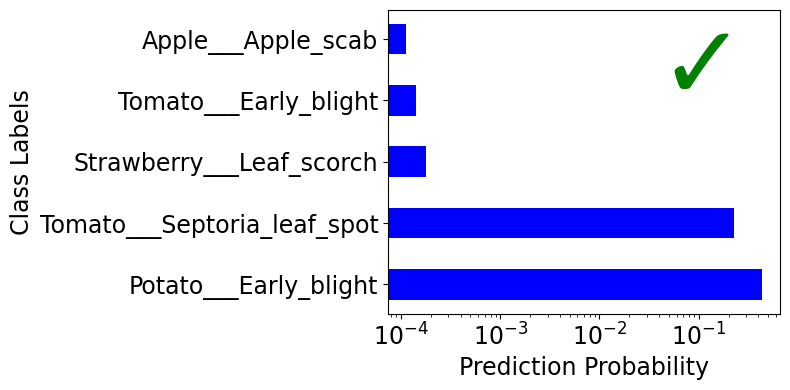

1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 2s 2s/step
Error loading model vit: name 'vit' is not defined
Ground truth: 'Apple___Apple_scab', Prediction: 'Apple___Apple_scab'
Predictions for Apple___Apple_scab.JPG (✓):
Apple___Apple_scab: 0.4370
Apple___Cedar_apple_rust: 0.1195
Tomato___Leaf_Mold: 0.0225
Tomato___Septoria_leaf_spot: 0.0111
Apple___Black_rot: 0.0087


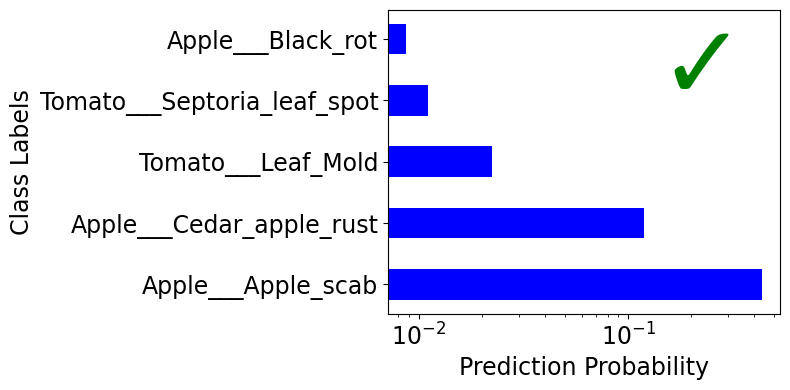

1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 2s 2s/step
Error loading model vit: name 'vit' is not defined
Ground truth: 'Tomato___Septoria_leaf_spot', Prediction: 'Tomato___Septoria_leaf_spot'
Predictions for Tomato___Septoria_leaf_spot.JPG (✓):
Tomato___Septoria_leaf_spot: 0.3337
Tomato___Late_blight: 0.3310
Tomato___Leaf_Mold: 0.0020
Tomato___Bacterial_spot: 0.0000
Corn_(maize)___Northern_Leaf_Blight: 0.0000


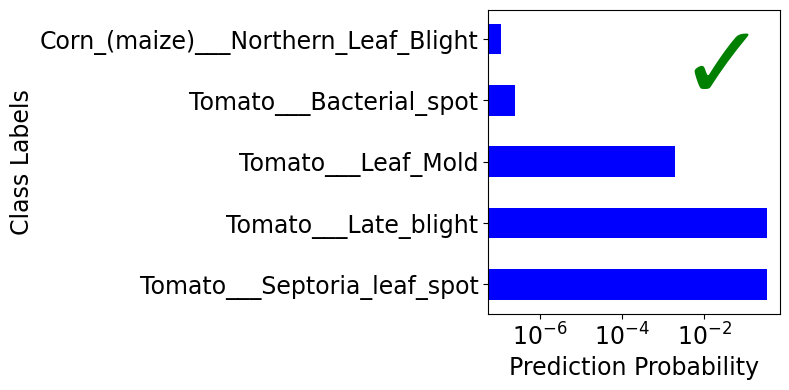

1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 2s 2s/step
Error loading model vit: name 'vit' is not defined
Ground truth: 'Tomato___Target_Spot', Prediction: 'Tomato___Septoria_leaf_spot'
Predictions for Tomato___Target_Spot.JPG (✗):
Tomato___Septoria_leaf_spot: 0.5328
Tomato___Target_Spot: 0.0699
Strawberry___Leaf_scorch: 0.0605
Potato___Early_blight: 0.0031
Tomato___Early_blight: 0.0001


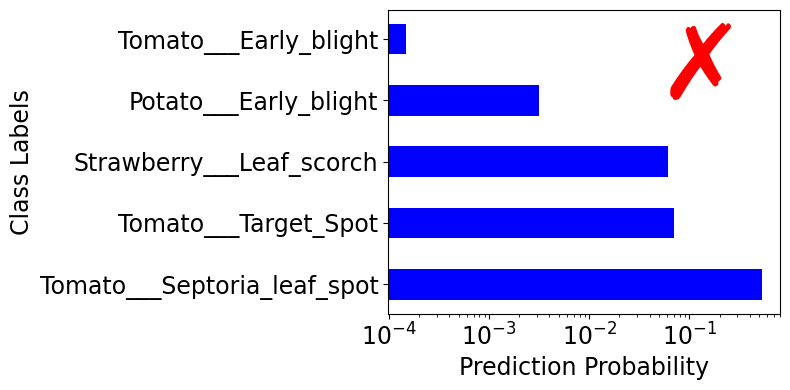

In [ ]:
import numpy as np
import tensorflow as tf
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from google.colab import drive
from keras.utils import custom_object_scope

# Mount Google Drive
drive.mount('/content/drive', force_remount=True)

# Define the models to test
models = ['densenet169', 'densenet121', 'EfficientNetB3', 'EfficientNetB4', 'densenet201', 'ResNet50', 'resnet101', 'resnet152', 'vit', 'finetunedvit']
ensembles = {
    '268': [models[2],models[6],models[8]],
}

save_dir = '/content/drive/MyDrive/SavedModels/'
test_images_dir = '/content/drive/MyDrive/TestImages/'  # Directory containing test images

# Define class labels for 38 classes
class_labels = [
    'Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy',
    'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy',
    'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_',
    'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot',
    'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy',
    'Peach___Bacterial_spot', 'Peach___healthy',
    'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight',
    'Potato___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew',
    'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight',
    'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot',
    'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
    'Tomato___Tomato_mosaic_virus', 'Tomato___healthy'
]

# Function to create ImageDataGenerator and target size based on model type
def create_test_datagen(model_name):
    if 'vit' in model_name:
        return ImageDataGenerator(rescale=1./255), (224, 224)
    else:
        return ImageDataGenerator(preprocessing_function=tf.keras.applications.efficientnet.preprocess_input), (256, 256)

# Function to load model predictions
def load_and_predict(model_name, image_path):
    model_path = os.path.join(save_dir, f'{model_name}.h5')
    try:
        if 'vit' in model_name:
            # Ensure ViT custom layers are registered
            with custom_object_scope({'ClassToken': vit.layers.ClassToken,
                                      'AddPositionEmbs': vit.layers.AddPositionEmbs,
                                      'TransformerBlock': vit.layers.TransformerBlock}):
                model = tf.keras.models.load_model(model_path)
        else:
            model = tf.keras.models.load_model(model_path)

    except Exception as e:
        print(f"Error loading model {model_name}: {e}")
        return None, None

    test_datagen, target_size = create_test_datagen(model_name)

    # Load and preprocess the image
    img = load_img(image_path, target_size=target_size)
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = test_datagen.standardize(img_array)

    predictions = model.predict(img_array, verbose=1)
    return predictions, img

# Loop through each image in the test directory and get predictions
for img_name in os.listdir(test_images_dir):
    test_image_path = os.path.join(test_images_dir, img_name)

    combined_predictions = None

    # Loop through each model in the ensemble
    for model_name in ensembles['268']:
        predictions, img = load_and_predict(model_name, test_image_path)

        if predictions is None:
            continue

        if combined_predictions is None:
            combined_predictions = predictions
        else:
            combined_predictions += predictions

    if combined_predictions is not None:
        # Calculate the average predictions for the combined ensemble
        combined_predictions /= len(ensembles['268'])

        # Get the top 5 predictions
        top_5_indices = np.argsort(combined_predictions[0])[-5:][::-1]
        top_5_probs = combined_predictions[0][top_5_indices]
        top_5_labels = [class_labels[i] for i in top_5_indices]

        # Extract ground truth label by removing the file extension
        ground_truth_label = os.path.splitext(img_name)[0]

        # Debug: Print the ground truth and top prediction
        print(f"Ground truth: '{ground_truth_label}', Prediction: '{top_5_labels[0]}'")

        # Ensure both are stripped of any leading/trailing whitespace
        ground_truth_label = ground_truth_label.strip()
        top_prediction = top_5_labels[0].strip()

        # Determine if the top prediction matches the ground truth label
        is_correct = top_prediction.lower() == ground_truth_label.lower()

        # Print the prediction results with correct/wrong symbol
        symbol = '✓' if is_correct else '✗'
        print(f"Predictions for {img_name} ({symbol}):")
        for i in range(5):
            print(f"{top_5_labels[i]}: {top_5_probs[i]:.4f}")

        # Plot the top 5 probabilities
        fig, ax = plt.subplots(figsize=(8, 4))  # Adjust figure size to reduce spacing
        ax.barh(top_5_labels, top_5_probs, color='blue', height=0.5)  # Increase bar height to reduce spacing
        ax.set_xscale('log')  # Set x-axis to logarithmic scale# Adjust limits if necessary
        ax.set_xlabel('Prediction Probability', fontsize=17)
        ax.set_ylabel('Class Labels', fontsize=17)
        ax.tick_params(axis='y', labelsize=17)
        ax.tick_params(axis='x', labelsize=17)

        # Add a text annotation for the top prediction with a large symbol
        ax.text(0.80, 0.80, symbol, color='green' if is_correct else 'red', fontsize=75, ha='center', va='center', transform=ax.transAxes)

        plt.tight_layout()  # Adjust layout to prevent overlap
        plt.show()
    else:
        print(f"No valid predictions were made for {img_name}.")


Mounted at /content/drive
1/1 [==============================] - 3s 3s/step
Ground truth: 'Apple___Apple_scab', Prediction: 'Apple___Apple_scab'
Predictions for Apple___Apple_scab.JPG (✓):
Apple___Apple_scab: 0.5241
Apple___Cedar_apple_rust: 0.4702
Corn_(maize)___Cercospora_leaf: 0.0048
Tomato___Late_blight: 0.0009
Tomato___Bacterial_spot: 0.0000


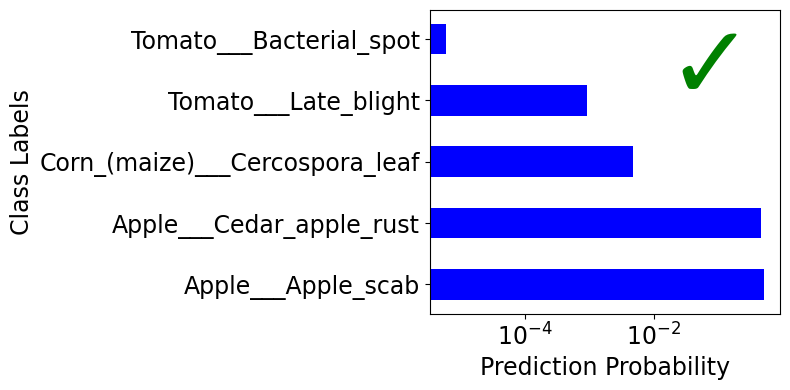

1/1 [==============================] - 3s 3s/step
Ground truth: 'Tomato___Septoria_leaf_spot', Prediction: 'Tomato___Septoria_leaf_spot'
Predictions for Tomato___Septoria_leaf_spot.JPG (✓):
Tomato___Septoria_leaf_spot: 0.5972
Tomato___Late_blight: 0.3860
Peach___Bacterial_spot: 0.0157
Tomato___Bacterial_spot: 0.0009
Strawberry___Leaf_scorch: 0.0001


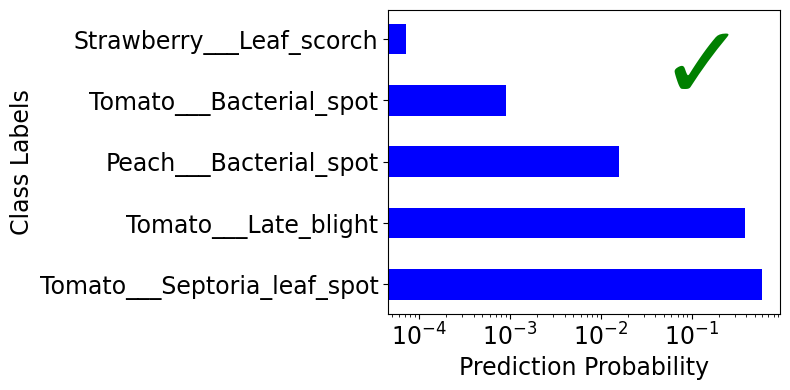

1/1 [==============================] - 3s 3s/step
Ground truth: 'Tomato___Target_Spot', Prediction: 'Tomato___Target_Spot'
Predictions for Tomato___Target_Spot.JPG (✓):
Tomato___Target_Spot: 0.5019
Tomato___Septoria_leaf_spot: 0.4962
Tomato___Spider_mites: 0.0012
Tomato___Early_blight: 0.0002
Pepper,_bell___Bacterial_spot: 0.0001


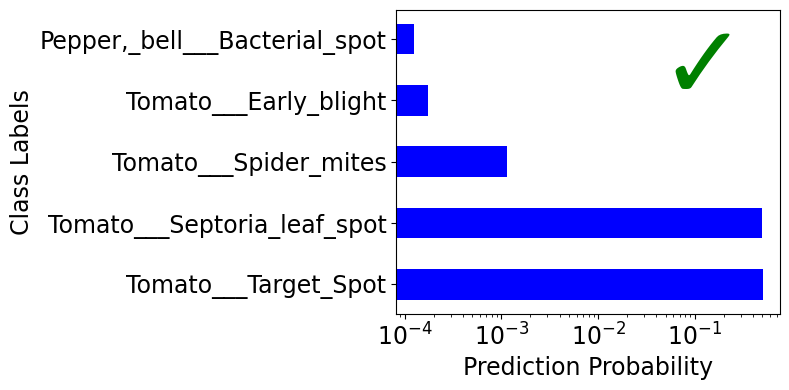

1/1 [==============================] - 3s 3s/step
Ground truth: 'Potato___Early_blight', Prediction: 'Potato___Early_blight'
Predictions for Potato___Early_blight.JPG (✓):
Potato___Early_blight: 0.5079
Tomato___Septoria_leaf_spot: 0.4921
Apple___Apple_scab: 0.0000
Tomato___Early_blight: 0.0000
Corn_(maize)___Cercospora_leaf: 0.0000


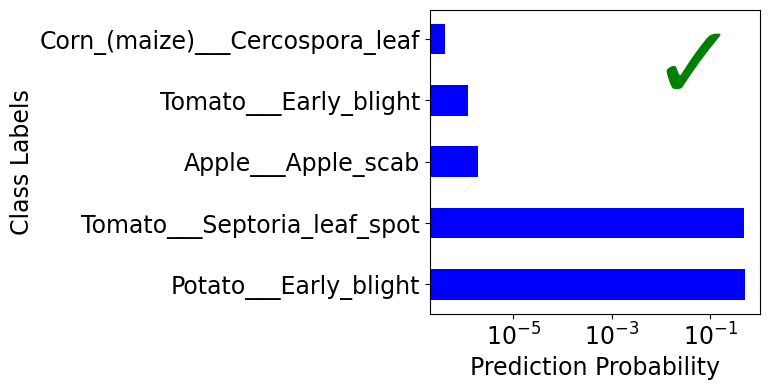

In [ ]:
import numpy as np
import tensorflow as tf
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from google.colab import drive
from keras.utils import custom_object_scope

# Mount Google Drive
drive.mount('/content/drive', force_remount=True)

# Define the models to test
models = ['densenet169', 'densenet121', 'EfficientNetB3', 'EfficientNetB4', 'densenet201', 'ResNet50', 'resnet101', 'resnet152', 'vit', 'finetunedvit']
ensembles = {
   '39': [models[3], models[9]],
}

save_dir = '/content/drive/MyDrive/SavedModels/'
test_images_dir = '/content/drive/MyDrive/TestImages/'  # Directory containing test images

# Define class labels for 38 classes
class_labels = [
    'Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy',
    'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy',
    'Corn_(maize)___Cercospora_leaf', 'Corn_(maize)___Common_rust_',
    'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot',
    'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy',
    'Peach___Bacterial_spot', 'Peach___healthy',
    'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight',
    'Potato___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew',
    'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight',
    'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot',
    'Tomato___Spider_mites', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
    'Tomato___Tomato_mosaic_virus', 'Tomato___healthy'
]

# Function to create ImageDataGenerator and target size based on model type
def create_test_datagen(model_name):
    if 'vit' in model_name:
        return ImageDataGenerator(rescale=1./255), (224, 224)
    else:
        return ImageDataGenerator(preprocessing_function=tf.keras.applications.efficientnet.preprocess_input), (256, 256)

# Function to load model predictions
def load_and_predict(model_name, image_path):
    model_path = os.path.join(save_dir, f'{model_name}.h5')
    try:
        if 'vit' in model_name:
            # Ensure ViT custom layers are registered
            with custom_object_scope({'ClassToken': vit.layers.ClassToken,
                                      'AddPositionEmbs': vit.layers.AddPositionEmbs,
                                      'TransformerBlock': vit.layers.TransformerBlock}):
                model = tf.keras.models.load_model(model_path)
        else:
            model = tf.keras.models.load_model(model_path)

    except Exception as e:
        print(f"Error loading model {model_name}: {e}")
        return None, None

    test_datagen, target_size = create_test_datagen(model_name)

    # Load and preprocess the image
    img = load_img(image_path, target_size=target_size)
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = test_datagen.standardize(img_array)

    predictions = model.predict(img_array, verbose=1)
    return predictions, img

# Loop through each image in the test directory and get predictions
for img_name in os.listdir(test_images_dir):
    test_image_path = os.path.join(test_images_dir, img_name)

    combined_predictions = None

    # Loop through each model in the ensemble
    for model_name in ensembles['39']:
        predictions, img = load_and_predict(model_name, test_image_path)

        if predictions is None:
            continue

        if combined_predictions is None:
            combined_predictions = predictions
        else:
            combined_predictions += predictions

    if combined_predictions is not None:
        # Calculate the average predictions for the combined ensemble
        combined_predictions /= len(ensembles['39'])

        # Get the top 5 predictions
        top_5_indices = np.argsort(combined_predictions[0])[-5:][::-1]
        top_5_probs = combined_predictions[0][top_5_indices]
        top_5_labels = [class_labels[i] for i in top_5_indices]

        # Extract ground truth label by removing the file extension
        ground_truth_label = os.path.splitext(img_name)[0]

        # Debug: Print the ground truth and top prediction
        print(f"Ground truth: '{ground_truth_label}', Prediction: '{top_5_labels[0]}'")

        # Ensure both are stripped of any leading/trailing whitespace
        ground_truth_label = ground_truth_label.strip()
        top_prediction = top_5_labels[0].strip()

        # Determine if the top prediction matches the ground truth label
        is_correct = top_prediction.lower() == ground_truth_label.lower()

        # Print the prediction results with correct/wrong symbol
        symbol = '✓' if is_correct else '✗'
        print(f"Predictions for {img_name} ({symbol}):")
        for i in range(5):
            print(f"{top_5_labels[i]}: {top_5_probs[i]:.4f}")

        # Plot the top 5 probabilities
        fig, ax = plt.subplots(figsize=(8, 4))  # Adjust figure size to reduce spacing
        ax.barh(top_5_labels, top_5_probs, color='blue', height=0.5)  # Increase bar height to reduce spacing
        ax.set_xscale('log')  # Set x-axis to logarithmic scale# Adjust limits if necessary
        ax.set_xlabel('Prediction Probability', fontsize=17)
        ax.set_ylabel('Class Labels', fontsize=17)
        ax.tick_params(axis='y', labelsize=17)
        ax.tick_params(axis='x', labelsize=17)

        # Add a text annotation for the top prediction with a large symbol
        ax.text(0.80, 0.80, symbol, color='green' if is_correct else 'red', fontsize=75, ha='center', va='center', transform=ax.transAxes)

        plt.tight_layout()  # Adjust layout to prevent overlap
        plt.show()
    else:
        print(f"No valid predictions were made for {img_name}.")



Mounted at /content/drive


1/1 [==============================] - 5s 5s/step
Predicted class for densenet201 is Apple___Black_rot


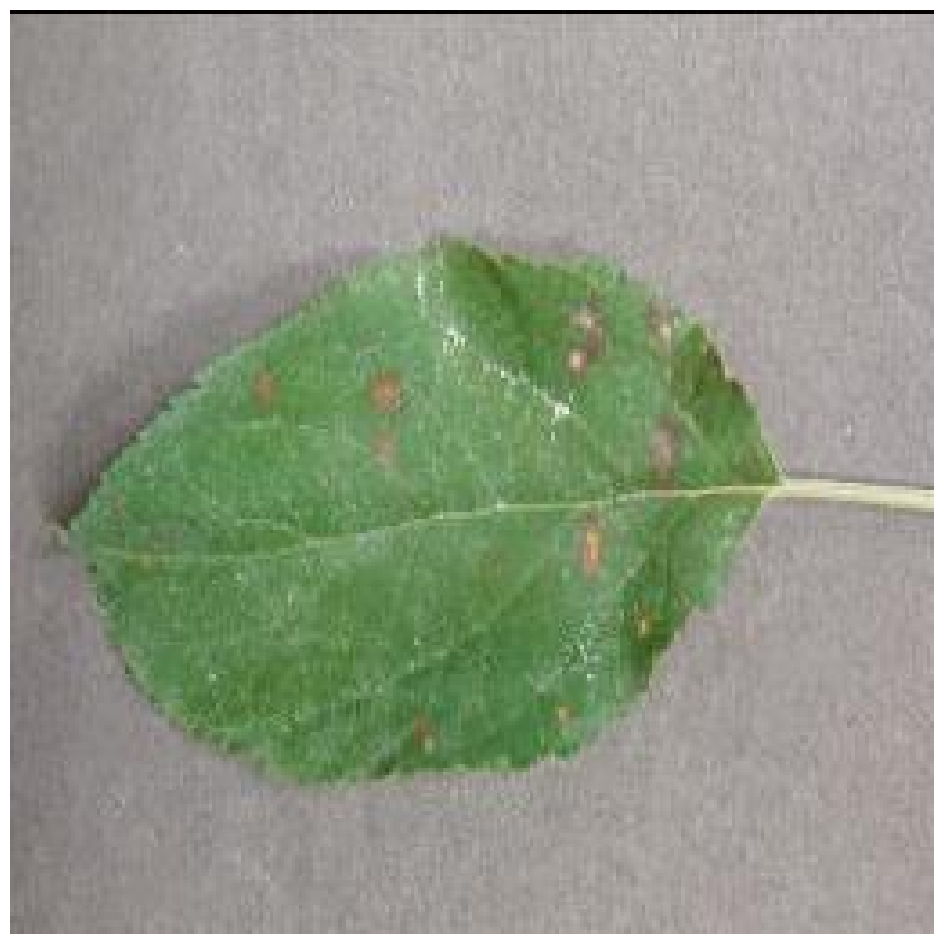

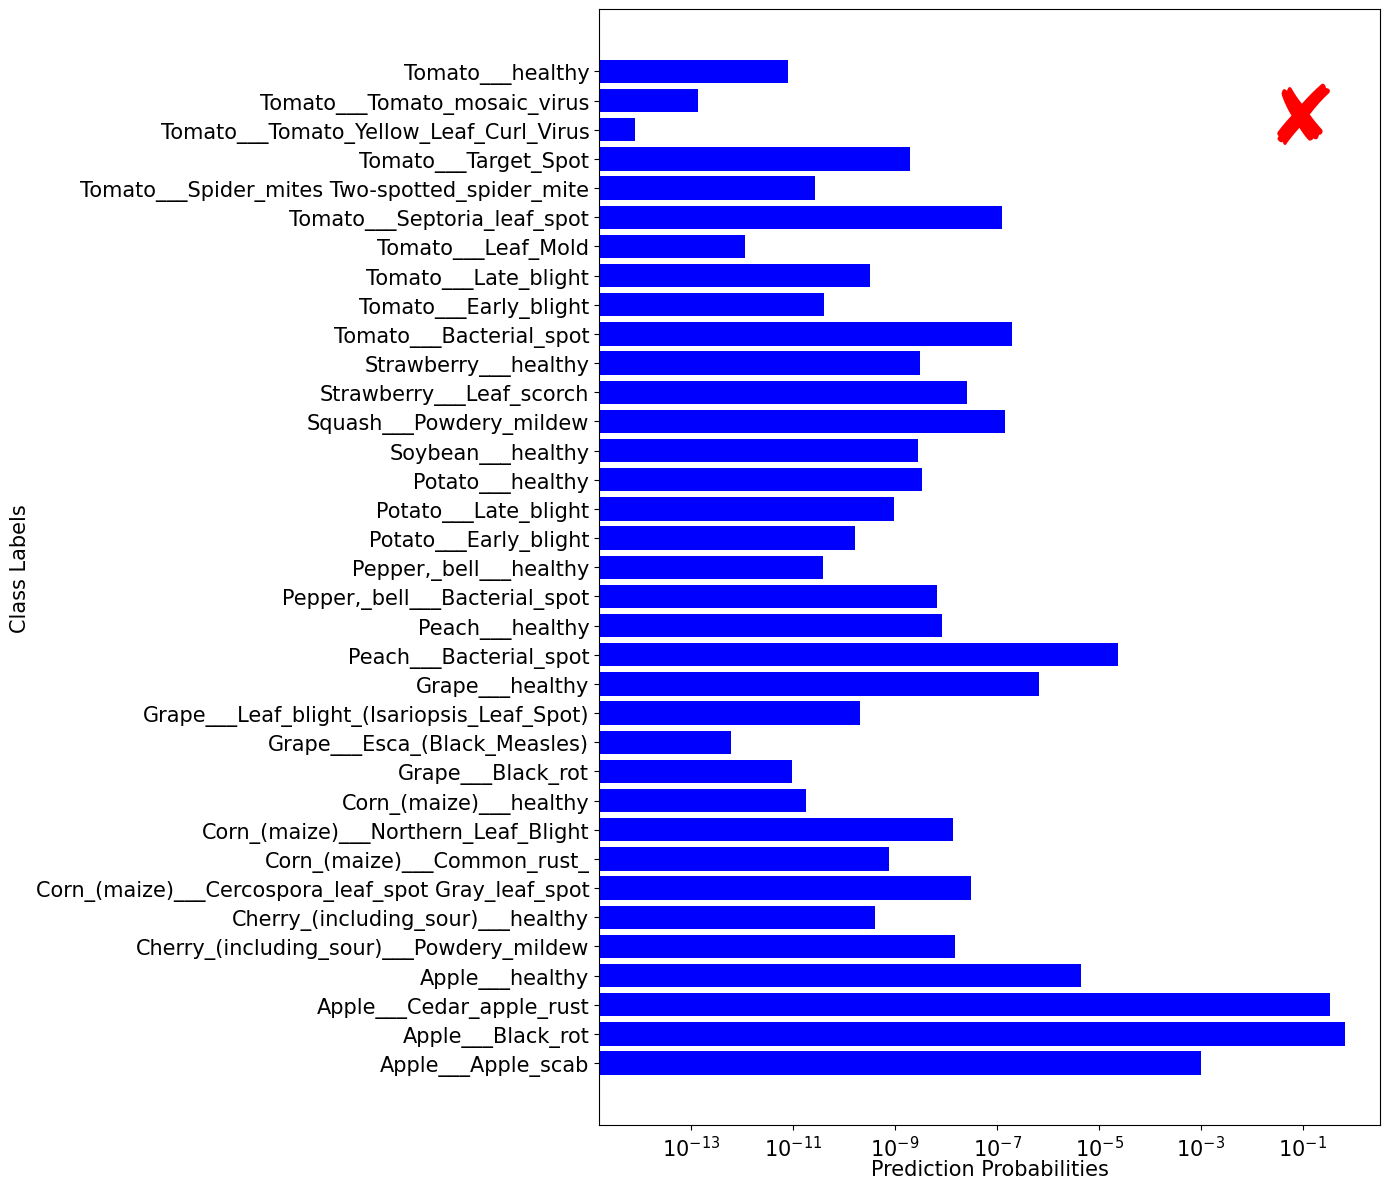

1/1 [==============================] - 2s 2s/step
Predicted class for densenet121 is Apple___Cedar_apple_rust


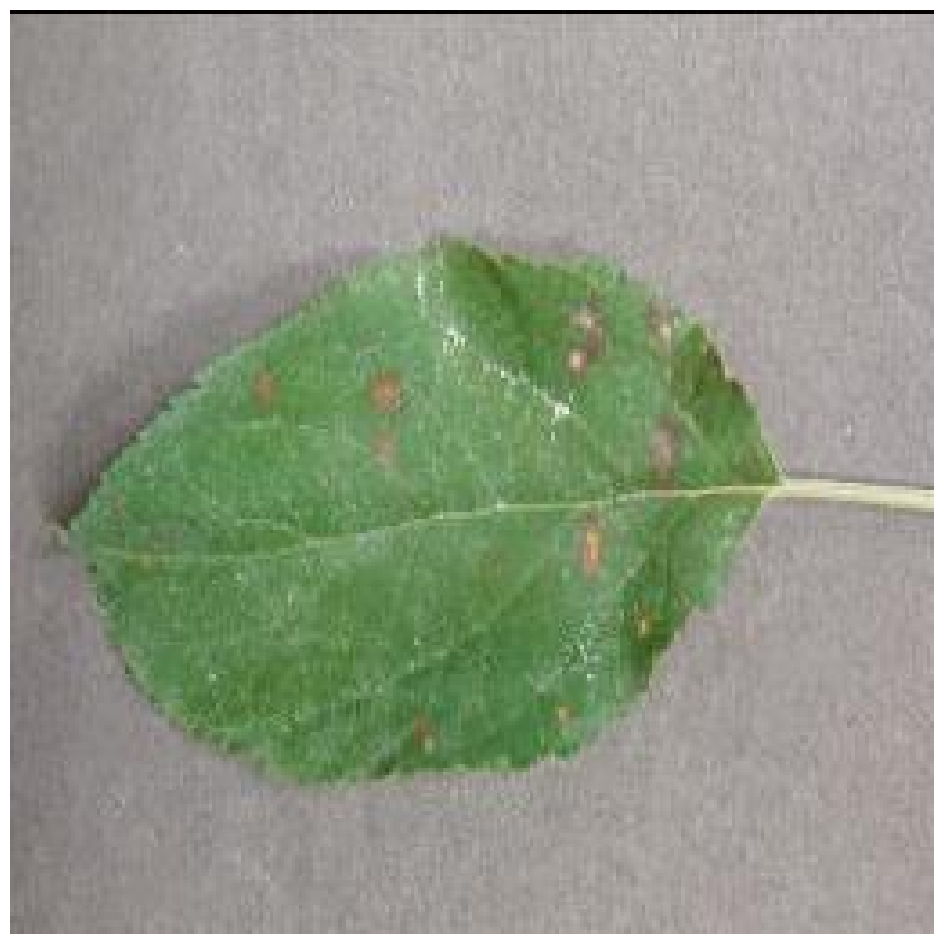

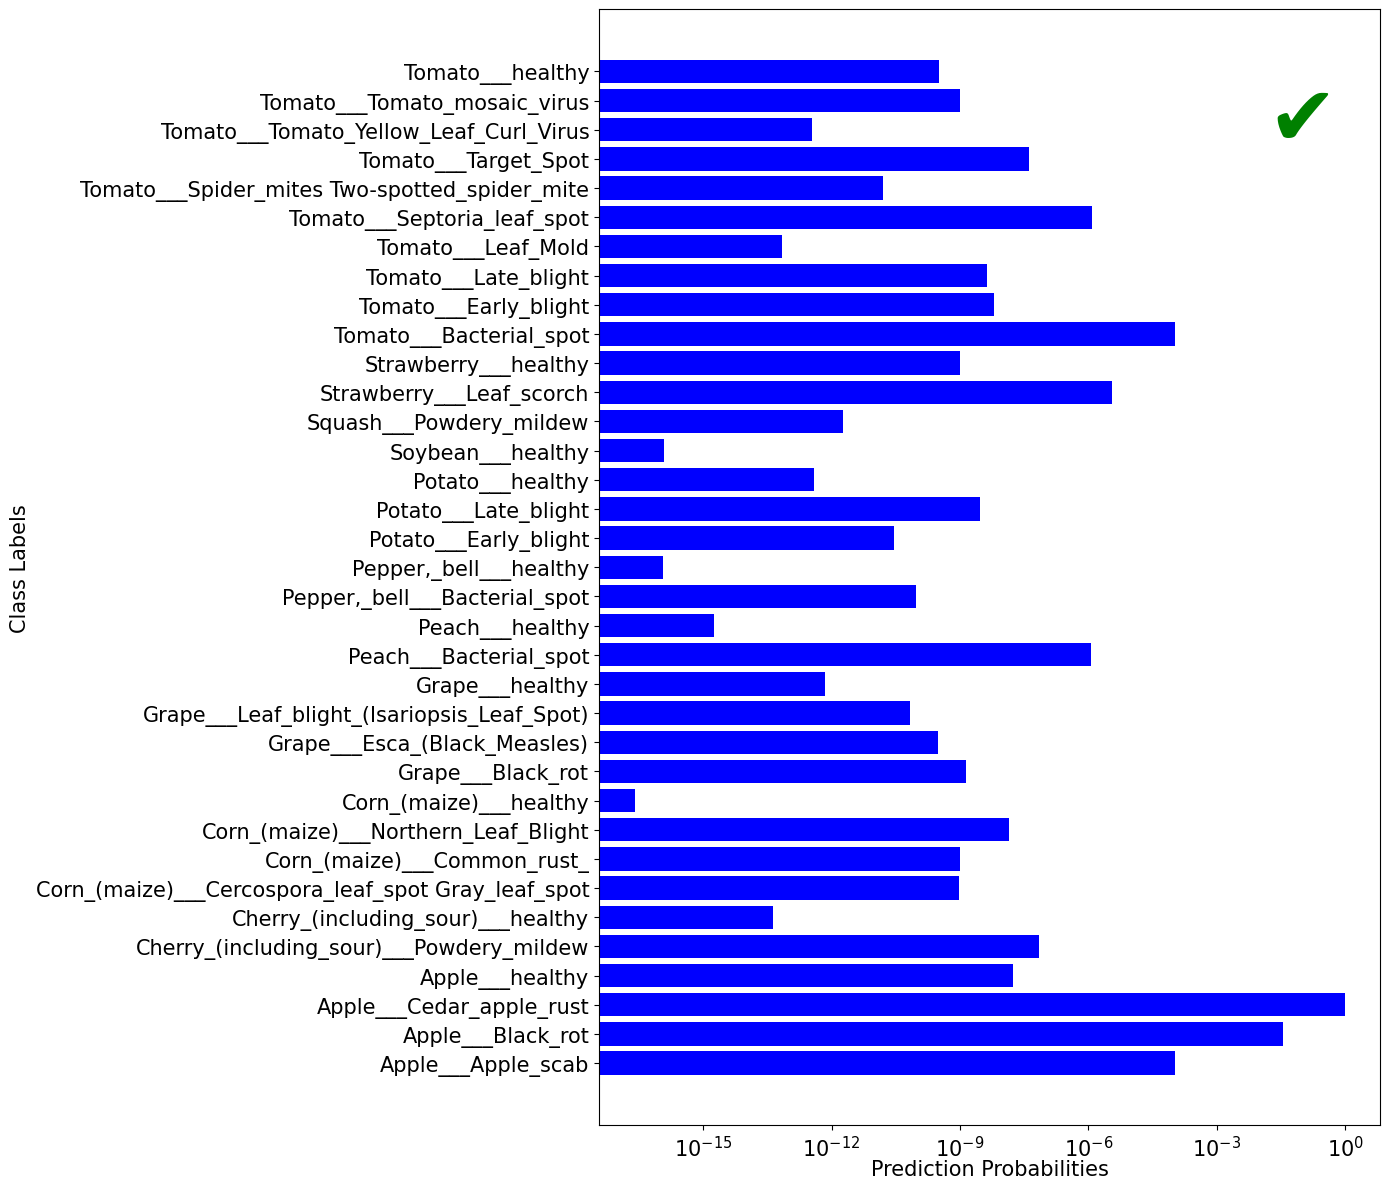

1/1 [==============================] - 3s 3s/step
Predicted class for finetunedvit is Apple___Cedar_apple_rust


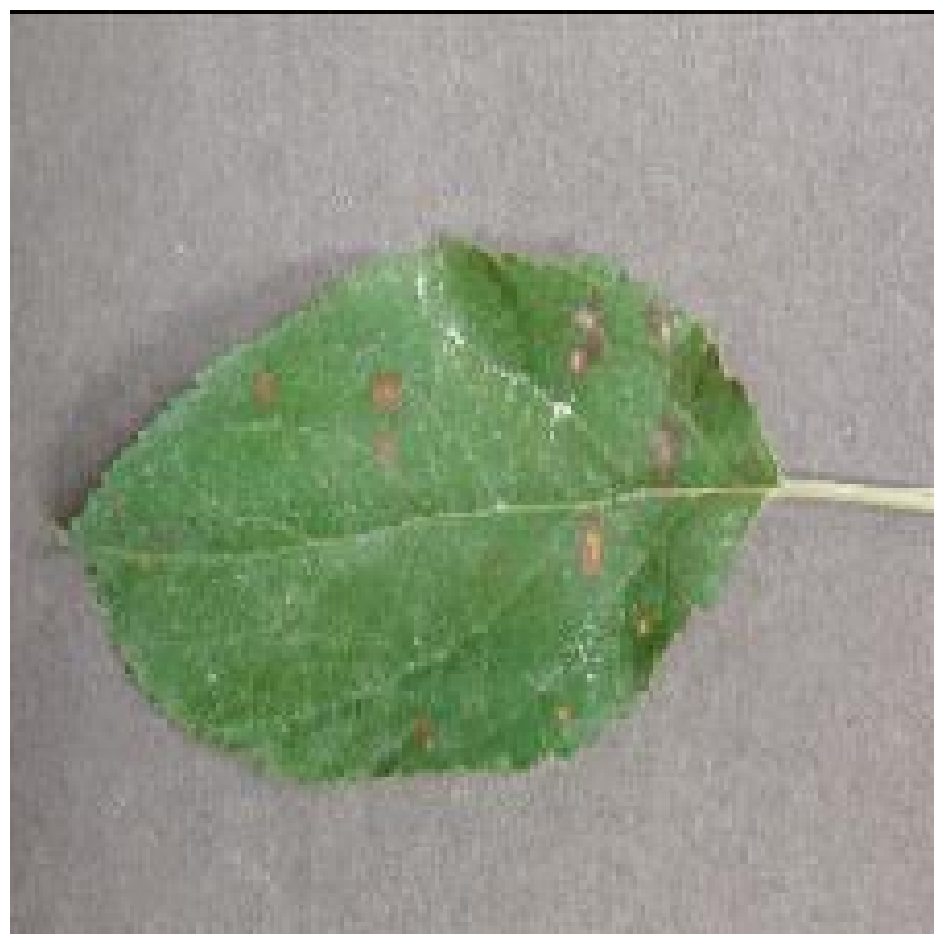

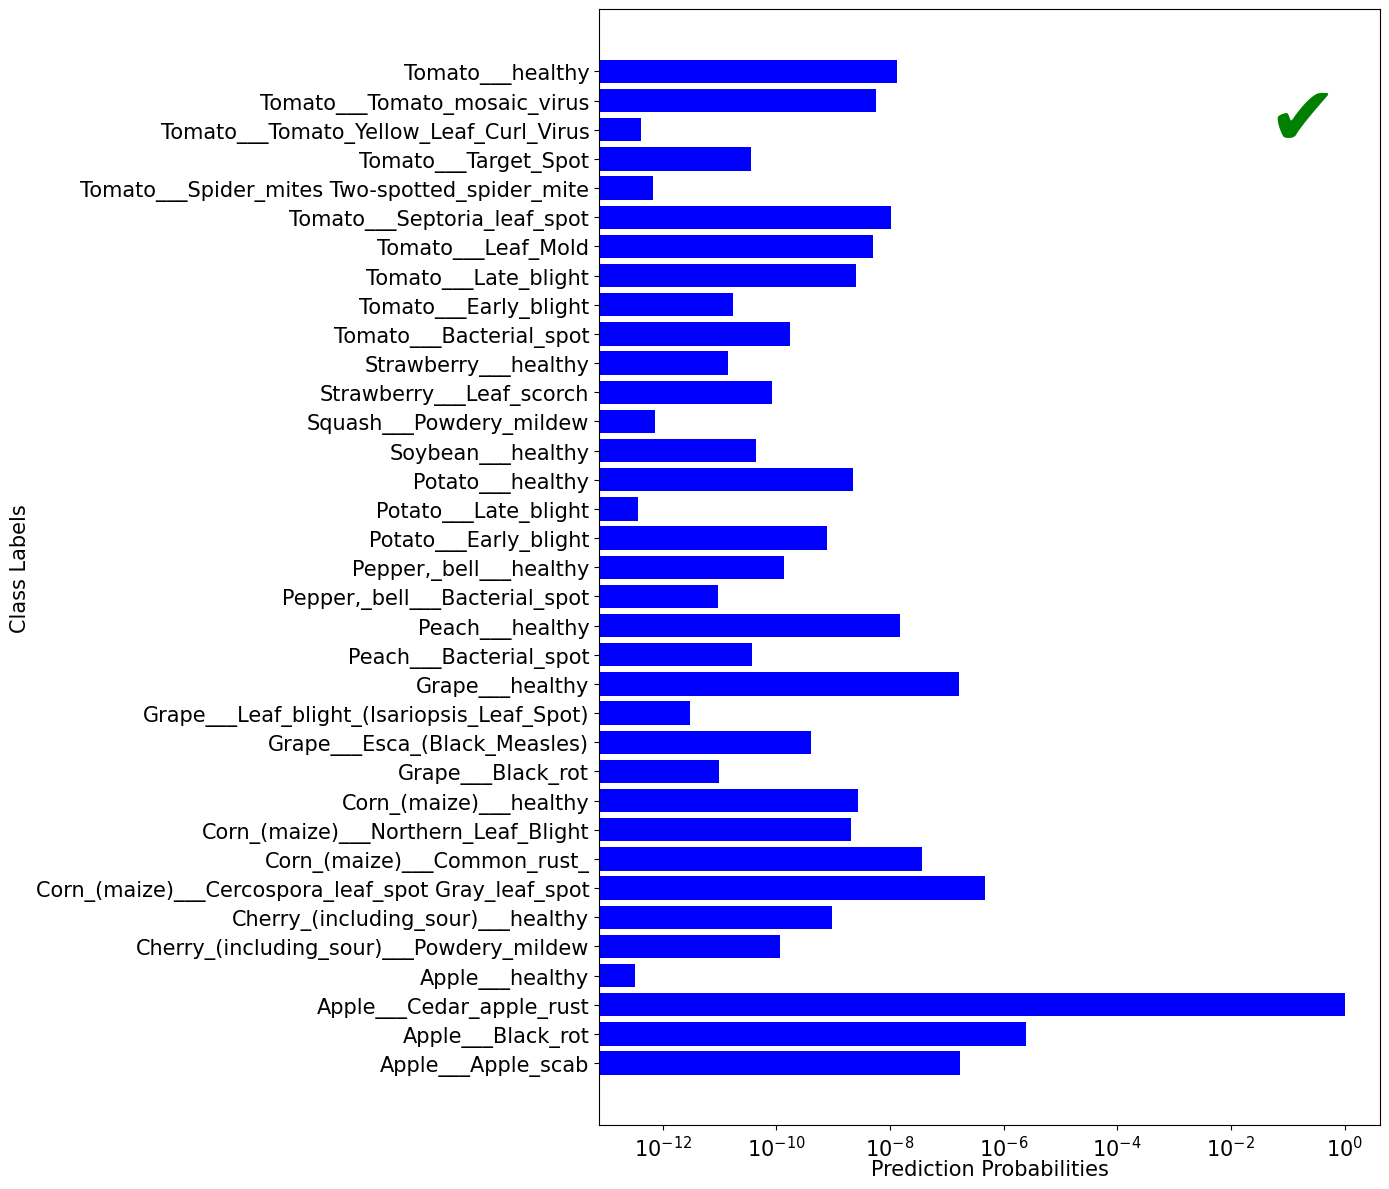

Combined predicted class is Apple___Cedar_apple_rust


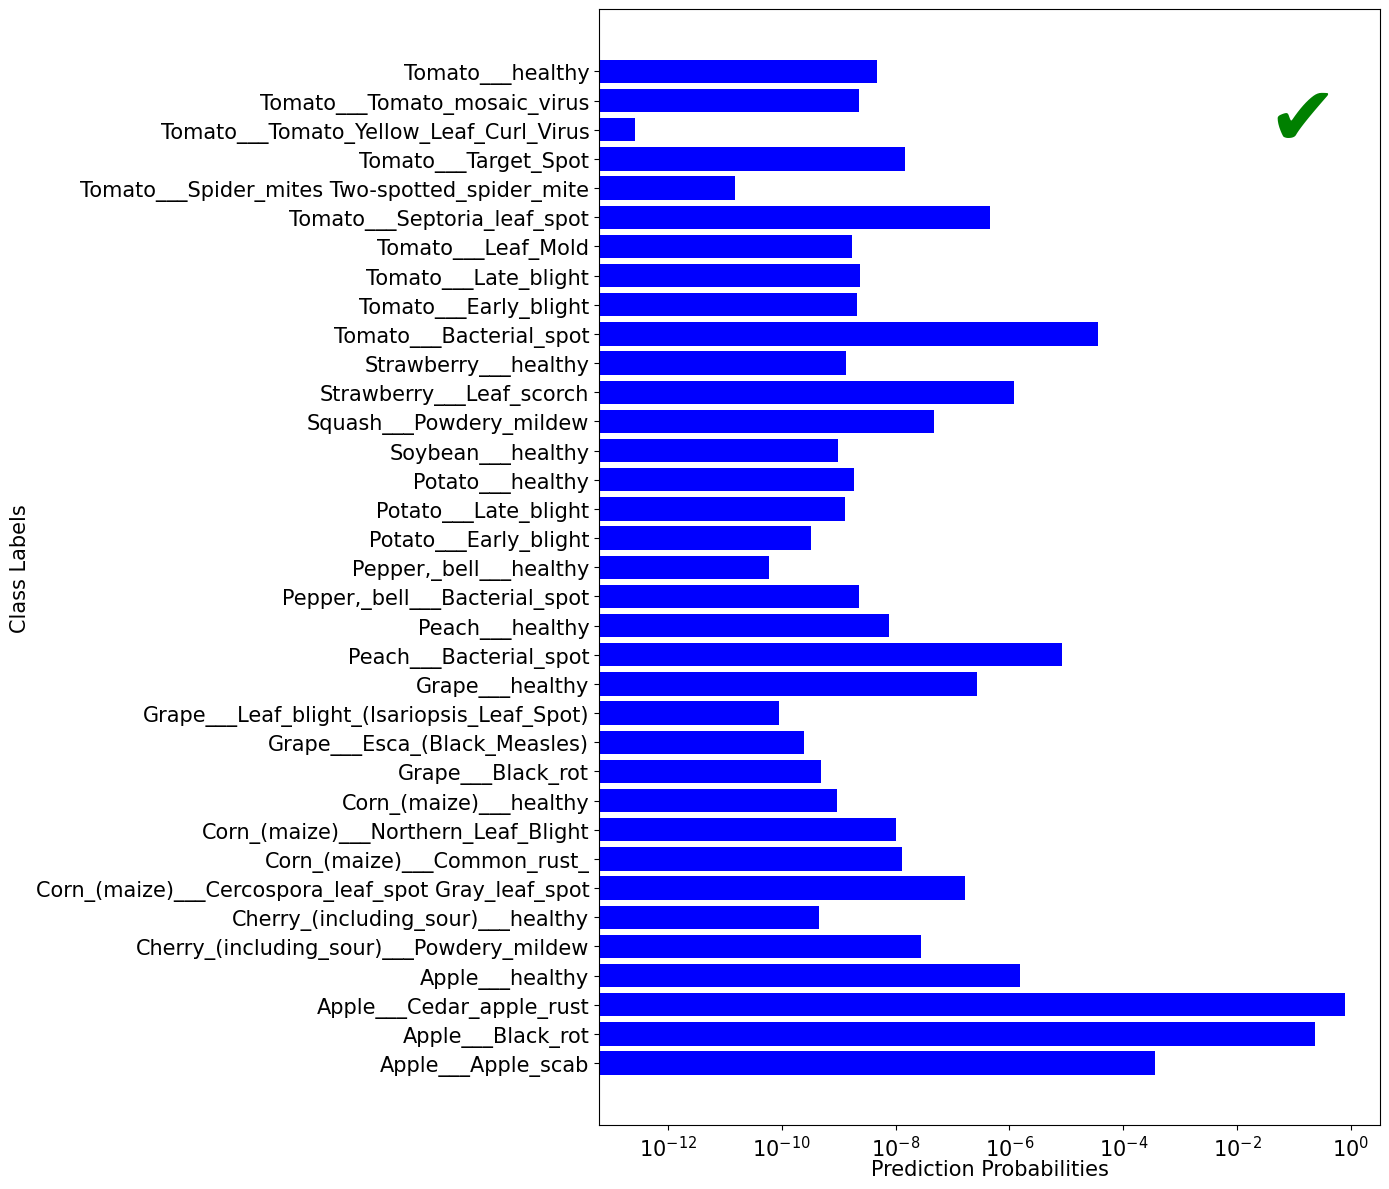

In [ ]:
import numpy as np
import tensorflow as tf
import os
from vit_keras import vit
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from google.colab import drive
from keras.utils import custom_object_scope

# Mount Google Drive
drive.mount('/content/drive', force_remount=True)

# Define the models to test
models = ['densenet169', 'densenet121', 'EfficientNetB3', 'EfficientNetB4', 'densenet201', 'ResNet50', 'resnet101', 'resnet152', 'vit', 'finetunedvit']
ensembles = {
    '419': [models[4], models[1], models[9]],
}

save_dir = '/content/drive/MyDrive/SavedModels/'
test_image_path = '/content/drive/MyDrive/TestImages/Apple___Cedar_apple_rust.jpg'
ground_truth_label = 'Apple___Cedar_apple_rust'  # Update this with the correct label for the test image

# Define class labels for 38 classes
class_labels = ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy',
                'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy',
                'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_',
                'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot',
                'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy',
                'Peach___Bacterial_spot', 'Peach___healthy',
                'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight',
                'Potato___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew',
                'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight',
                'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot',
                'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
                'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']

# Function to create ImageDataGenerator and target size based on model type
def create_test_datagen(model_name):
    if 'vit' in model_name:
        return ImageDataGenerator(rescale=1./255), (224, 224)
    else:
        return ImageDataGenerator(preprocessing_function=tf.keras.applications.efficientnet.preprocess_input), (256, 256)

# Function to load model predictions
def load_and_predict(model_name, image_path):
    model_path = os.path.join(save_dir, f'{model_name}.h5')
    try:
        if 'vit' in model_name:
            # Ensure ViT custom layers are registered
            with custom_object_scope({'ClassToken': vit.layers.ClassToken,
                                      'AddPositionEmbs': vit.layers.AddPositionEmbs,
                                      'TransformerBlock': vit.layers.TransformerBlock}):
                model = tf.keras.models.load_model(model_path)
        else:
            model = tf.keras.models.load_model(model_path)

    except Exception as e:
        print(f"Error loading model {model_name}: {e}")
        return None, None

    test_datagen, target_size = create_test_datagen(model_name)

    # Load and preprocess the image
    img = load_img(image_path, target_size=target_size)
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = test_datagen.standardize(img_array)

    predictions = model.predict(img_array, verbose=1)
    return predictions, img

# Loop through each model in the ensemble and plot results
combined_predictions = None
for model_name in ensembles['419']:
    predictions, img = load_and_predict(model_name, test_image_path)

    if predictions is None:
        continue

    if combined_predictions is None:
        combined_predictions = predictions
    else:
        combined_predictions += predictions

    # Convert predictions to class labels
    predicted_class = np.argmax(predictions, axis=1)[0]
    predicted_label = class_labels[predicted_class]

    # Print the predicted class
    print(f"Predicted class for {model_name} is {predicted_label}")

    # Plot the image with correct/incorrect symbol
    fig1, ax1 = plt.subplots(figsize=(14, 12))
    ax1.imshow(img)
    ax1.axis('off')
    plt.show()

    # Plot the probabilities with correct/incorrect symbol
    fig2, ax2 = plt.subplots(figsize=(14, 12))  # Adjusted figure size
    ax2.barh(range(len(class_labels)), predictions[0], color='blue')
    ax2.set_yticks(range(len(class_labels)))
    ax2.set_yticklabels(class_labels, fontsize=15)
    ax2.set_xscale('log')
    ax2.set_ylabel('Class Labels', fontsize=15)
    ax2.set_xlabel('Prediction Probabilities', labelpad=-1, fontsize=15)
    ax2.tick_params(axis='x', which='major', labelsize=15)

    # Add correct/incorrect symbol
    if predicted_label == ground_truth_label:
        symbol = '✔'
        color = 'green'
    else:
        symbol = '✘'
        color = 'red'

    ax2.text(0.90, 0.90, symbol, color=color, fontsize=60, ha='center', va='center', transform=ax2.transAxes)
    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()

if combined_predictions is not None:
    # Calculate the average predictions for the combined ensemble
    combined_predictions /= len(ensembles['419'])

    # Convert combined predictions to class labels
    combined_predicted_class = np.argmax(combined_predictions, axis=1)[0]
    combined_predicted_label = class_labels[combined_predicted_class]

    # Print the combined predicted class
    print(f"Combined predicted class is {combined_predicted_label}")

    # Plot the combined probabilities
    fig3, ax3 = plt.subplots(figsize=(14, 12))  # Adjusted figure size for more space
    ax3.barh(range(len(class_labels)), combined_predictions[0], color='blue')
    ax3.set_yticks(range(len(class_labels)))
    ax3.set_yticklabels(class_labels, fontsize=15)
    ax3.set_xscale('log')  # Set x-axis scale to a maximum of 10^0
    ax3.set_ylabel('Class Labels', fontsize=15)
    ax3.set_xlabel('Prediction Probabilities', labelpad=-1, fontsize=15)
    ax3.tick_params(axis='x', which='major', labelsize=15)

    # Add correct/incorrect symbol
    if combined_predicted_label == ground_truth_label:
        symbol = '✔'
        color = 'green'
    else:
        symbol = '✘'
        color = 'red'

    ax3.text(0.90, 0.90, symbol, color=color, fontsize=60, ha='center', va='center', transform=ax3.transAxes)
    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()
else:
    print("No valid predictions were made.")


In [ ]:
import os
import numpy as np
import tensorflow as tf
import torch
import warnings

# Suppress specific FutureWarnings
warnings.filterwarnings('ignore', category=FutureWarning, module='sklearn.cluster._kmeans', lineno=870)

# Append the path to the necessary modules
import sys
sys.path.append('/content/drive/MyDrive/Pac')

# Import utility functions
from pytorchUtility import (
    calAccuracy,
    calAveragePredictionVectorAccuracy,
    calNegativeSamplesSet,
    calDisagreementSamplesOneTargetNegative,
    calDisagreementSamplesNoGroundTruth,
    filterModelsFixed,
)

from diversityMetrics import *
from teamSelection import *
from sklearnUtility import *
from groupMetrics import *

# Define diversity metrics
diversityMetricsList = ['CK', 'QS', 'BD', 'FK', 'KW', 'GD']

# Paths and model names
prediction_dir = '/content/drive/MyDrive/Predictions'
model_dir = '/content/drive/MyDrive/SavedModels'
models = ['densenet169', 'densenet121', 'EfficientNetB3', 'EfficientNetB4',
          'densenet201', 'ResNet50', 'resnet101', 'resnet152', 'vit', 'finetunedvit']

# Load label vectors
label_path = os.path.join(prediction_dir, 'val_labels.npy')
label_vectors = np.load(label_path, allow_pickle=True)

# Ensure consistent sample count
num_samples = len(label_vectors)
min_samples = num_samples

# Prepare lists to store prediction vectors and accuracies
predictionVectorsList = []
tmpAccList = []

# Load predictions and find the minimum sample count
for model_name in models:
    prediction_path = os.path.join(prediction_dir, f'{model_name}.npy')
    prediction_vectors = np.load(prediction_path, allow_pickle=True)
    prediction_vectors = tf.nn.softmax(prediction_vectors, axis=-1).numpy()
    min_samples = min(min_samples, len(prediction_vectors))

# Truncate label vectors to match the minimum sample count
label_vectors = label_vectors[:min_samples]

# Process each model's predictions
for model_name in models:
    prediction_path = os.path.join(prediction_dir, f'{model_name}.npy')
    prediction_vectors = np.load(prediction_path, allow_pickle=True)
    prediction_vectors = tf.nn.softmax(prediction_vectors, axis=-1).numpy()
    prediction_vectors = prediction_vectors[:min_samples]
    predictionVectorsList.append(torch.tensor(prediction_vectors))

# Convert label vectors to PyTorch tensor
label_vectors_torch = torch.tensor(label_vectors)

# Calculate accuracies for each model
for prediction_vectors in predictionVectorsList:
    accuracy = calAccuracy(prediction_vectors, label_vectors_torch)[0].item()
    tmpAccList.append(accuracy)

# Print the model names and their corresponding highest accuracy
# for model_name, accuracy in zip(models, tmpAccList):
#     print(f"Model: {model_name}, Highest Accuracy: {accuracy:.4f}")
for model_name, accuracy in zip(models, tmpAccList):
    rounded_accuracy = round(accuracy, 2)
    print(f"Model: {model_name}, Highest Accuracy: {rounded_accuracy:.2f}")


Model: densenet169, Highest Accuracy: 96.82
Model: densenet121, Highest Accuracy: 99.31
Model: EfficientNetB3, Highest Accuracy: 98.61
Model: EfficientNetB4, Highest Accuracy: 98.87
Model: densenet201, Highest Accuracy: 97.93
Model: ResNet50, Highest Accuracy: 97.66
Model: resnet101, Highest Accuracy: 97.14
Model: resnet152, Highest Accuracy: 96.81
Model: vit, Highest Accuracy: 96.52
Model: finetunedvit, Highest Accuracy: 98.57


In [ ]:
import os
import numpy as np
import tensorflow as tf
import torch
import warnings

# Suppress specific FutureWarnings
warnings.filterwarnings('ignore', category=FutureWarning, module='sklearn.cluster._kmeans', lineno=870)

# Append the path to the necessary modules
import sys
sys.path.append('/content/drive/MyDrive/Pac')

# Import utility functions
from pytorchUtility import (
    calAccuracy,
    calAveragePredictionVectorAccuracy,
    calNegativeSamplesSet,
    calDisagreementSamplesOneTargetNegative,
    calDisagreementSamplesNoGroundTruth,
    filterModelsFixed,
)

from diversityMetrics import *
from teamSelection import *
from sklearnUtility import *
from groupMetrics import *

# Define diversity metrics
diversityMetricsList = ['CK', 'QS', 'BD', 'FK', 'KW', 'GD']

# Paths and model names
prediction_dir = '/content/drive/MyDrive/testPredictions'
model_dir = '/content/drive/MyDrive/SavedModels'
models = ['densenet169', 'densenet121', 'EfficientNetB3', 'EfficientNetB4',
          'densenet201', 'ResNet50', 'resnet101', 'resnet152', 'vit', 'finetunedvit']

# Load label vectors
label_path = os.path.join(prediction_dir, 'test_labels.npy')
label_vectors = np.load(label_path, allow_pickle=True)

# Ensure consistent sample count
num_samples = len(label_vectors)
min_samples = num_samples

# Prepare lists to store prediction vectors and accuracies
predictionVectorsList = []
tmpAccList = []

# Load predictions and find the minimum sample count
for model_name in models:
    prediction_path = os.path.join(prediction_dir, f'{model_name}.npy')
    prediction_vectors = np.load(prediction_path, allow_pickle=True)
    prediction_vectors = tf.nn.softmax(prediction_vectors, axis=-1).numpy()
    min_samples = min(min_samples, len(prediction_vectors))

# Truncate label vectors to match the minimum sample count
label_vectors = label_vectors[:min_samples]

# Process each model's predictions
for model_name in models:
    prediction_path = os.path.join(prediction_dir, f'{model_name}.npy')
    prediction_vectors = np.load(prediction_path, allow_pickle=True)
    prediction_vectors = tf.nn.softmax(prediction_vectors, axis=-1).numpy()
    prediction_vectors = prediction_vectors[:min_samples]
    predictionVectorsList.append(torch.tensor(prediction_vectors))

# Convert label vectors to PyTorch tensor
label_vectors_torch = torch.tensor(label_vectors)

# Calculate accuracies for each model
for prediction_vectors in predictionVectorsList:
    accuracy = calAccuracy(prediction_vectors, label_vectors_torch)[0].item()
    tmpAccList.append(accuracy)

# # Print the model names and their corresponding highest accuracy
# for model_name, accuracy in zip(models, tmpAccList):
#     print(f"Model: {model_name}, Highest Accuracy: {accuracy:.4f}")
# Print the model names and their corresponding highest accuracy rounded to two decimal places
for model_name, accuracy in zip(models, tmpAccList):
    rounded_accuracy = round(accuracy, 2)
    print(f"Model: {model_name}, Highest Accuracy: {rounded_accuracy:.2f}")



Model: densenet169, Highest Accuracy: 96.41
Model: densenet121, Highest Accuracy: 99.15
Model: EfficientNetB3, Highest Accuracy: 98.52
Model: EfficientNetB4, Highest Accuracy: 98.73
Model: densenet201, Highest Accuracy: 97.80
Model: ResNet50, Highest Accuracy: 97.49
Model: resnet101, Highest Accuracy: 96.70
Model: resnet152, Highest Accuracy: 96.94
Model: vit, Highest Accuracy: 96.88
Model: finetunedvit, Highest Accuracy: 98.48


In [ ]:
#Q_metrics

In [ ]:
import os
import numpy as np
import tensorflow as tf
import torch
import timeit
from itertools import combinations
import warnings

# Suppress the specific FutureWarning
warnings.filterwarnings('ignore', category=FutureWarning, module='sklearn.cluster._kmeans', lineno=870)

# Append the path to the necessary modules
import sys
sys.path.append('/content/drive/MyDrive/Jin')

# Import the necessary utility functions
from pytorchUtility import (
    calAccuracy,
    calAveragePredictionVectorAccuracy,
    calNegativeSamplesSet,
    calDisagreementSamplesOneTargetNegative,
    calDisagreementSamplesNoGroundTruth,
    filterModelsFixed,
)

from diversityMetrics import *
from teamSelection import *
from sklearnUtility import *
from groupMetrics import *

# Define diversity metrics
diversityMetricsList = ['CK',  'BD', 'KW', 'GD']

# Paths and models
prediction_dir = '/content/drive/MyDrive/Predictions'
model_dir = '/content/drive/MyDrive/SavedModels'
models = ['densenet169', 'densenet121', 'EfficientNetB3', 'EfficientNetB4',
          'densenet201', 'ResNet50', 'resnet101', 'resnet152', 'vit', 'finetunedvit']

# Load prediction vectors
labelVectorsList = list()
predictionVectorsList = list()
tmpAccList = list()

# Load the label vectors
label_path = os.path.join(prediction_dir, 'val_labels.npy')
label_vectors = np.load(label_path, allow_pickle=True)

# Load predictions and determine the minimum length
for model_name in models:
    prediction_path = os.path.join(prediction_dir, model_name + '.npy')
    prediction_vectors = np.load(prediction_path, allow_pickle=True)
    prediction_vectors = tf.nn.softmax(prediction_vectors, axis=-1).numpy()
    predictionVectorsList.append(torch.tensor(prediction_vectors))

# Convert label vectors to PyTorch tensor
label_vectors_torch = torch.tensor(label_vectors)

# Calculate individual accuracies
for prediction_vectors in predictionVectorsList:
    tmpAccList.append(calAccuracy(prediction_vectors, label_vectors_torch)[0].item())

# Minimum, average, and maximum individual accuracies
minAcc = round(np.min(tmpAccList),2)
avgAcc = round(np.mean(tmpAccList),2)
maxAcc = round(np.max(tmpAccList),2)

print(f"Minimum individual accuracy: {minAcc}%")
print(f"Average individual accuracy: {avgAcc}%")
print(f"Maximum individual accuracy: {maxAcc}%")

# Calculate the team accuracy
teamAccuracyDict = dict()
startTime = timeit.default_timer()

# Count total number of ensembles
total_ensembles = 0
for n in range(2, len(models) + 1):
    comb = combinations(list(range(len(models))), n)
    for selectedModels in list(comb):
        total_ensembles += 1
        tmpAccuracy = calAveragePredictionVectorAccuracy(predictionVectorsList, label_vectors_torch, modelsList=selectedModels)[0].cpu().item()
        teamName = "".join(map(str, selectedModels))
        teamAccuracyDict[teamName] = tmpAccuracy

print("Total number of ensembles before filtering: ", total_ensembles)

endTime = timeit.default_timer()
print("Time: ", endTime - startTime)

# Obtain negative samples for any base models
sampleID, sampleTarget, predictions, predVectors = calDisagreementSamplesNoGroundTruth(
    predictionVectorsList, label_vectors_torch
)

sampleID = np.array(sampleID)
sampleTarget = np.array(sampleTarget)
predictions = np.array(predictions)
predVectors = np.array([np.array([np.array(pp) for pp in p]) for p in predVectors])

# Settings for the diversity score calculation
nModels = len(predictions[0])
modelIdx = list(range(nModels))

# Statistics for different diversity metrics
np.random.seed(0)
crossValidation = True
crossValidationTimes = 3
nRandomSamples = 100

teamSizeList = list()
teamList = list()
diversityScoresList = list()
ensembleAccuracyList = list()

startTime = timeit.default_timer()
for n in range(2, nModels + 1):
    comb = combinations(modelIdx, n)
    for selectedModels in list(comb):
        teamSampleID, teamSampleTarget, teamPredictions, teamPredVectors = filterModelsFixed(sampleID, sampleTarget, predictions, predVectors, selectedModels)

        if len(teamPredictions) == 0:
            print("Negative sample not found")
            continue

        if crossValidation:
            tmpMetrics = list()
            for _ in range(crossValidationTimes):
                randomIdx = np.random.choice(np.arange(teamPredictions.shape[0]), nRandomSamples)
                tmpMetrics.append(calAllDiversityMetrics(teamPredictions[randomIdx], teamSampleTarget[randomIdx], diversityMetricsList))
            tmpMetrics = np.mean(np.array(tmpMetrics), axis=0)
        else:
            tmpMetrics = np.array(calAllDiversityMetrics(teamPredictions, teamSampleTarget, diversityMetricsList))

        diversityScoresList.append(tmpMetrics)
        teamSizeList.append(n)
        teamList.append(selectedModels)
        ensembleAccuracyList.append(calAveragePredictionVectorAccuracy(predictionVectorsList, label_vectors_torch, modelsList=selectedModels)[0].cpu().item())

endTime = timeit.default_timer()
print("Time: ", endTime - startTime)

QdiversityScoresList = np.array(diversityScoresList)
QteamSizeList = np.array(teamSizeList)
QteamList = np.array(teamList, dtype=object)
QensembleAccuracyList = np.array(ensembleAccuracyList)

# Perform mean-threshold based ensemble selection (baseline approach)
QMetrics = {}
QMetricsThreshold = {}
teamSelectedQAllDict = {}

for j, dm in enumerate(diversityMetricsList):
    QMetricsThreshold[dm] = np.mean(QdiversityScoresList[..., j])

print("Diversity metrics thresholds:", QMetricsThreshold)

for i, t in enumerate(QteamList):
    teamName = "".join(map(str, t))
    for j, dm in enumerate(diversityMetricsList):
        QMetricsDM = QMetrics.get(dm, {})
        QMetricsDM[teamName] = QdiversityScoresList[i][j]
        QMetrics[dm] = QMetricsDM
        if QMetricsDM[teamName] < round(QMetricsThreshold[dm], 3):
            teamSelectedQAllSet = teamSelectedQAllDict.get(dm, set())
            teamSelectedQAllSet.add(teamName)
            teamSelectedQAllDict[dm] = teamSelectedQAllSet

In [ ]:
import pandas as pd
pd.set_option('display.width', 1000)
df_dm = pd.DataFrame(QMetrics)
df_dm.reset_index(inplace=True)
df_dm.rename(columns={'index': 'team'}, inplace=True)
df_acc = pd.DataFrame(list(teamAccuracyDict.items()), columns=['team', 'acc'])
df = pd.merge(df_dm, df_acc, on='team')
df = df[df.team.str.len()>2]
print('correlations between metrics and acc')
print(df.corr(numeric_only=True)*100,'\n')


In [ ]:
# Create the 'Team Size' column based on the length of the 'team' column
df['Team Size'] = df['team'].apply(lambda x: len(str(x)))



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Scatter plot CK vs ACC
plt.figure(figsize=(5, 4))
sc1 = plt.scatter(df['CK'], df['acc'], c=df['Team Size'], cmap='rainbow', s=10, alpha=0.7, marker='x')
plt.xlabel('CK', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)
plt.colorbar(sc1, label='Team Size')
plt.tight_layout()
plt.show()

# Scatter plot BD vs ACC
plt.figure(figsize=(5, 4))
sc2 = plt.scatter(df['BD'], df['acc'], c=df['Team Size'], cmap='rainbow', s=10, alpha=0.7, marker='x')
plt.xlabel('BD', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)
plt.colorbar(sc2, label='Team Size')
plt.tight_layout()
plt.show()

# Scatter plot KW vs ACC
plt.figure(figsize=(5, 4))
sc3 = plt.scatter(df['KW'], df['acc'], c=df['Team Size'], cmap='rainbow', s=10, alpha=0.7, marker='x')
plt.xlabel('KW', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)
plt.colorbar(sc3, label='Team Size')
plt.tight_layout()
plt.show()

# Scatter plot GD vs ACC
plt.figure(figsize=(5, 4))
sc4 = plt.scatter(df['GD'], df['acc'], c=df['Team Size'], cmap='rainbow', s=10, alpha=0.7, marker='x')
plt.xlabel('GD', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)
plt.colorbar(sc4, label='Team Size')
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter the DataFrame for teams of size 5
df_filtered = df[df['Team Size'] == 5]

# Create the scatter plot for teams of size 5
plt.figure(figsize=(5, 4))
plt.scatter(df_filtered['GD'], df_filtered['acc'], color='blue', s=10, alpha=0.5, marker='x')

# Label the axes
plt.xlabel('GD', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)

# Add grid and show the plot
plt.show()


# Filter the DataFrame for teams of size 5
df_filtered = df[df['Team Size'] == 5]

# Create the scatter plot for teams of size 5
plt.figure(figsize=(5, 4))
plt.scatter(df_filtered['KW'], df_filtered['acc'], color='blue', s=10, alpha=0.5, marker='x')

# Label the axes
plt.xlabel('KW', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)

# Add grid and show the plot
plt.show()

# Filter the DataFrame for teams of size 5
df_filtered = df[df['Team Size'] == 5]

# Create the scatter plot for teams of size 5
plt.figure(figsize=(5, 4))
plt.scatter(df_filtered['CK'], df_filtered['acc'], color='blue', s=10, alpha=0.5, marker='x')

# Label the axes
plt.xlabel('CK', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)

# Add grid and show the plot
plt.show()

# Filter the DataFrame for teams of size 5
df_filtered = df[df['Team Size'] == 5]

# Create the scatter plot for teams of size 5
plt.figure(figsize=(5, 4))
plt.scatter(df_filtered['BD'], df_filtered['acc'], color='blue', s=10, alpha=0.5, marker='x')

# Label the axes
plt.xlabel('BD', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)

# Add grid and show the plot
plt.show()

In [ ]:
#QMETRIC BASED ON TEST

In [4]:
import os
import numpy as np
import tensorflow as tf
import torch
import timeit
from itertools import combinations
import warnings

# Suppress the specific FutureWarning
warnings.filterwarnings('ignore', category=FutureWarning, module='sklearn.cluster._kmeans', lineno=870)

# Append the path to the necessary modules
import sys
sys.path.append('/content/drive/MyDrive/Jin')

# Import the necessary utility functions
from pytorchUtility import (
    calAccuracy,
    calAveragePredictionVectorAccuracy,
    calNegativeSamplesSet,
    calDisagreementSamplesOneTargetNegative,
    calDisagreementSamplesNoGroundTruth,
    filterModelsFixed,
)

from diversityMetrics import *
from teamSelection import *
from sklearnUtility import *
from groupMetrics import *

# Define diversity metrics
diversityMetricsList = ['CK',  'BD', 'KW', 'GD']

# Paths and models
prediction_dir = '/content/drive/MyDrive/testPredictions'
model_dir = '/content/drive/MyDrive/SavedModels'
models = ['densenet169', 'densenet121', 'EfficientNetB3', 'EfficientNetB4',
          'densenet201', 'ResNet50', 'resnet101', 'resnet152', 'vit', 'finetunedvit']

# Load prediction vectors
labelVectorsList = list()
predictionVectorsList = list()
tmpAccList = list()

# Load the label vectors
label_path = os.path.join(prediction_dir, 'test_labels.npy')
label_vectors = np.load(label_path, allow_pickle=True)

# Load predictions and determine the minimum length
for model_name in models:
    prediction_path = os.path.join(prediction_dir, model_name + '.npy')
    prediction_vectors = np.load(prediction_path, allow_pickle=True)
    prediction_vectors = tf.nn.softmax(prediction_vectors, axis=-1).numpy()
    predictionVectorsList.append(torch.tensor(prediction_vectors))

# Convert label vectors to PyTorch tensor
label_vectors_torch = torch.tensor(label_vectors)

# Calculate individual accuracies
for prediction_vectors in predictionVectorsList:
    tmpAccList.append(calAccuracy(prediction_vectors, label_vectors_torch)[0].item())

# Minimum, average, and maximum individual accuracies
minAcc = round(np.min(tmpAccList),2)
avgAcc = round(np.mean(tmpAccList),2)
maxAcc = round(np.max(tmpAccList),2)

print(f"Minimum individual accuracy: {minAcc}%")
print(f"Average individual accuracy: {avgAcc}%")
print(f"Maximum individual accuracy: {maxAcc}%")

# Calculate the team accuracy
teamAccuracyDict = dict()
startTime = timeit.default_timer()

# Count total number of ensembles
total_ensembles = 0
for n in range(2, len(models) + 1):
    comb = combinations(list(range(len(models))), n)
    for selectedModels in list(comb):
        total_ensembles += 1
        tmpAccuracy = calAveragePredictionVectorAccuracy(predictionVectorsList, label_vectors_torch, modelsList=selectedModels)[0].cpu().item()
        teamName = "".join(map(str, selectedModels))
        teamAccuracyDict[teamName] = tmpAccuracy

print("Total number of ensembles before filtering: ", total_ensembles)

endTime = timeit.default_timer()
print("Time: ", endTime - startTime)

# Obtain negative samples for any base models
sampleID, sampleTarget, predictions, predVectors = calDisagreementSamplesNoGroundTruth(
    predictionVectorsList, label_vectors_torch
)

sampleID = np.array(sampleID)
sampleTarget = np.array(sampleTarget)
predictions = np.array(predictions)
predVectors = np.array([np.array([np.array(pp) for pp in p]) for p in predVectors])

# Settings for the diversity score calculation
nModels = len(predictions[0])
modelIdx = list(range(nModels))

# Statistics for different diversity metrics
np.random.seed(0)
crossValidation = True
crossValidationTimes = 3
nRandomSamples = 100

teamSizeList = list()
teamList = list()
diversityScoresList = list()
ensembleAccuracyList = list()

startTime = timeit.default_timer()
for n in range(2, nModels + 1):
    comb = combinations(modelIdx, n)
    for selectedModels in list(comb):
        teamSampleID, teamSampleTarget, teamPredictions, teamPredVectors = filterModelsFixed(sampleID, sampleTarget, predictions, predVectors, selectedModels)

        if len(teamPredictions) == 0:
            print("Negative sample not found")
            continue

        if crossValidation:
            tmpMetrics = list()
            for _ in range(crossValidationTimes):
                randomIdx = np.random.choice(np.arange(teamPredictions.shape[0]), nRandomSamples)
                tmpMetrics.append(calAllDiversityMetrics(teamPredictions[randomIdx], teamSampleTarget[randomIdx], diversityMetricsList))
            tmpMetrics = np.mean(np.array(tmpMetrics), axis=0)
        else:
            tmpMetrics = np.array(calAllDiversityMetrics(teamPredictions, teamSampleTarget, diversityMetricsList))

        diversityScoresList.append(tmpMetrics)
        teamSizeList.append(n)
        teamList.append(selectedModels)
        ensembleAccuracyList.append(calAveragePredictionVectorAccuracy(predictionVectorsList, label_vectors_torch, modelsList=selectedModels)[0].cpu().item())

endTime = timeit.default_timer()
print("Time: ", endTime - startTime)

QdiversityScoresList = np.array(diversityScoresList)
QteamSizeList = np.array(teamSizeList)
QteamList = np.array(teamList, dtype=object)
QensembleAccuracyList = np.array(ensembleAccuracyList)

# Perform mean-threshold based ensemble selection (baseline approach)
QMetrics = {}
QMetricsThreshold = {}
teamSelectedQAllDict = {}

for j, dm in enumerate(diversityMetricsList):
    QMetricsThreshold[dm] = np.mean(QdiversityScoresList[..., j])

print("Diversity metrics thresholds:", QMetricsThreshold)

for i, t in enumerate(QteamList):
    teamName = "".join(map(str, t))
    for j, dm in enumerate(diversityMetricsList):
        QMetricsDM = QMetrics.get(dm, {})
        QMetricsDM[teamName] = QdiversityScoresList[i][j]
        QMetrics[dm] = QMetricsDM
        if QMetricsDM[teamName] < round(QMetricsThreshold[dm], 3):
            teamSelectedQAllSet = teamSelectedQAllDict.get(dm, set())
            teamSelectedQAllSet.add(teamName)
            teamSelectedQAllDict[dm] = teamSelectedQAllSet

Minimum individual accuracy: 96.41%
Average individual accuracy: 97.71%
Maximum individual accuracy: 99.15%
Total number of ensembles before filtering:  1013
Time:  2.5666740160000927
Time:  37.801641398000015
Diversity metrics thresholds: {'CK': 0.3008897840831769, 'BD': 0.27602767462145544, 'KW': 0.10743107457725391, 'GD': 0.8309514612464337}


In [5]:
import pandas as pd
pd.set_option('display.width', 1000)
df_dm = pd.DataFrame(QMetrics)
df_dm.reset_index(inplace=True)
df_dm.rename(columns={'index': 'team'}, inplace=True)
df_acc = pd.DataFrame(list(teamAccuracyDict.items()), columns=['team', 'acc'])
df = pd.merge(df_dm, df_acc, on='team')
df = df[df.team.str.len()>2]
print('correlations between metrics and acc')
print(df.corr(numeric_only=True)*100,'\n')


correlations between metrics and acc
             CK          BD          KW          GD         acc
CK   100.000000   99.706742   86.412119  -15.310630  -42.937233
BD    99.706742  100.000000   86.572296  -11.147273  -41.593212
KW    86.412119   86.572296  100.000000  -11.253654   -6.539166
GD   -15.310630  -11.147273  -11.253654  100.000000   40.752589
acc  -42.937233  -41.593212   -6.539166   40.752589  100.000000 



In [6]:
# Get top 5 ensembles for each diversity metric
top_n = 5
topEnsemblesByDiversity = {}

for dm in diversityMetricsList:
    # Sort the teams based on the diversity score for the current metric in descending order
    sortedTeams = sorted(QMetrics[dm].items(), key=lambda item: item[1], reverse=True)

    # Select the top N teams
    topEnsemblesByDiversity[dm] = sortedTeams[:top_n]

# Print the top 5 ensembles for each diversity metric
for dm, teams in topEnsemblesByDiversity.items():
    print(f"Top {top_n} ensembles for {dm} diversity metric:")
    for teamName, score in teams:
        print(f"Team {teamName}: Diversity score = {score:.4f}")
    print("\n")


Top 5 ensembles for CK diversity metric:
Team 68: Diversity score = 0.4795
Team 068: Diversity score = 0.4435
Team 0678: Diversity score = 0.4306
Team 0467: Diversity score = 0.4268
Team 78: Diversity score = 0.4236


Top 5 ensembles for BD diversity metric:
Team 68: Diversity score = 0.4233
Team 068: Diversity score = 0.4000
Team 0678: Diversity score = 0.3917
Team 78: Diversity score = 0.3900
Team 067: Diversity score = 0.3844


Top 5 ensembles for KW diversity metric:
Team 02678: Diversity score = 0.1525
Team 0678: Diversity score = 0.1469
Team 0245678: Diversity score = 0.1463
Team 045678: Diversity score = 0.1442
Team 056789: Diversity score = 0.1441


Top 5 ensembles for GD diversity metric:
Team 38: Diversity score = 0.9605
Team 17: Diversity score = 0.9524
Team 023: Diversity score = 0.9347
Team 03: Diversity score = 0.9346
Team 35: Diversity score = 0.9310




In [7]:
diversityMetricsList = ['KW', 'GD', 'CK', 'BD']
pd.set_option('display.width', 1000)
for dm in diversityMetricsList:
    print('\n', dm, '  -----')
    df_sorted = df.sort_values(by=dm, ascending=False)
    print(df_sorted[['team', 'acc', dm]].head(10).T)


 KW   -----
            462        245        908        747        752        492        496        487        233        500
team      02678       0678    0245678     045678     056789      04678      05678      04568       0467      06789
acc   99.492638  99.282272  99.467888  99.443146  99.467888  99.344147  99.356522  99.430771  99.220398  99.455513
KW     0.152533   0.146875   0.146259   0.144167   0.144074      0.144      0.144   0.143733   0.142708   0.142133

 GD   -----
            53         549        49        553        251        348        277        325       253        197
team        023      13578        016     13679       1236       3479       1358       2468      1238       0238
acc   99.579262  99.740135  99.406021  99.75251  99.715385  99.715385  99.764885  99.467888  99.77726  99.665886
GD     0.934676   0.929516   0.924242  0.921902   0.916985   0.914157   0.912334   0.911203  0.910852   0.909038

 CK   -----
           76         245        233        75   

In [8]:
def find_best_member_acc(team, acc_list):
    indices = [int(i) for i in team]
    best_index = max(indices, key=lambda x: acc_list[x])
    best_acc = float(acc_list[best_index])
    return best_index, best_acc

df['best_member'], df['best_member_acc'] = zip(*df['team'].apply(lambda x: find_best_member_acc(x, tmpAccList)))
df['boosting'] = df['acc'] - df['best_member_acc']
print('new df table')
print(df.head(),'\n')

new df table
   team        CK        BD        KW        GD        acc  best_member  best_member_acc  boosting
45  012  0.291945  0.266667  0.088889  0.819753  99.467888            1        99.146149  0.321739
46  013  0.237012  0.217778  0.072593  0.826870  99.616386            1        99.146149  0.470238
47  014  0.278249  0.255556  0.085185  0.841928  99.381271            1        99.146149  0.235123
48  015  0.313574  0.282222  0.094074  0.799611  99.443146            1        99.146149  0.296997
49  016  0.336133  0.315556  0.105185  0.924242  99.406021            1        99.146149  0.259872 



In [9]:
diversityMetricsList = ['KW', 'GD', 'CK', 'BD']
pd.set_option('display.width', 1000)
for dm in diversityMetricsList:
    print('\n', dm, '  -----')
    df_sorted = df.sort_values(by=dm, ascending=False)
    print(df_sorted[['team', 'acc', 'best_member', 'best_member_acc', 'boosting', dm]].head(10).T)


 KW   -----
                       462        245        908        747        752        492        496        487        233        500
team                 02678       0678    0245678     045678     056789      04678      05678      04568       0467      06789
acc              99.492638  99.282272  99.467888  99.443146  99.467888  99.344147  99.356522  99.430771  99.220398  99.455513
best_member              2          7          2          4          9          4          5          4          4          9
best_member_acc  98.515038  96.943451  98.515038  97.797302  98.477913  97.797302  97.487938  97.797302  97.797302  98.477913
boosting            0.9776   2.338821    0.95285   1.645844   0.989975   1.546844   1.868584   1.633469   1.423096     0.9776
KW                0.152533   0.146875   0.146259   0.144167   0.144074      0.144      0.144   0.143733   0.142708   0.142133

 GD   -----
                       53         549        49         553        251        348        277

In [ ]:
#FQ Metric

In [ ]:
# Professor code
import os
import random
import numpy as np
import torch
import timeit
from itertools import combinations
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans
import warnings

# Set a global random seed (optional if you want the same randomness across the entire script)
np.random.seed(0)
# Suppress the specific FutureWarning
warnings.filterwarnings('ignore', category=FutureWarning, module='sklearn.cluster._kmeans', lineno=870)


# Append the path to the necessary modules
import sys
sys.path.append('/content/drive/MyDrive/Prof')

# Import the necessary utility functions
from pytorchUtility import (
    calAccuracy,
    calAveragePredictionVectorAccuracy,
    calNegativeSamplesSet,
    calDisagreementSamplesOneTargetNegative,
    filterModelsFixed,
)

from diversityMetrics import *
from teamSelection import *
from sklearnUtility import *
from groupMetrics import *

# Paths and models
prediction_dir = '/content/drive/MyDrive/Predictions'
model_dir = '/content/drive/MyDrive/SavedModels'
models = ['densenet169', 'densenet121', 'EfficientNetB3', 'EfficientNetB4',
          'densenet201', 'ResNet50', 'resnet101', 'resnet152', 'vit', 'finetunedvit']

diversity_metrics_list = ['CK', 'BD', 'KW', 'GD']

label_vectors_list = []
prediction_vectors_list = []
tmp_acc_list = []

# Load the label vectors
label_path = os.path.join(prediction_dir, 'val_labels.npy')
label_vectors = np.load(label_path, allow_pickle=True)

for model_name in models:
    prediction_path = os.path.join(prediction_dir, model_name + '.npy')
    prediction_vectors = np.load(prediction_path, allow_pickle=True)
    # Use PyTorch's softmax
    prediction_vectors = torch.softmax(torch.tensor(prediction_vectors), dim=-1)
    prediction_vectors_list.append(prediction_vectors)

# Convert label vectors to PyTorch tensor
label_vectors_torch = torch.tensor(label_vectors)

# Calculate individual model accuracies
for prediction_vectors in prediction_vectors_list:
    tmp_acc_list.append(calAccuracy(prediction_vectors, label_vectors_torch)[0].item())

# Compute accuracy thresholds
min_acc = round(np.min(tmp_acc_list),2)
avg_acc = round(np.mean(tmp_acc_list),2)
max_acc = round(np.max(tmp_acc_list),2)
print(f"Minimum individual accuracy: {min_acc}%")
print(f"Average individual accuracy: {avg_acc}%")
print(f"Maximum individual accuracy: {max_acc}%")

# Dictionaries to store team accuracy and model-to-team mapping
team_accuracy_dict = {}
model_team_dict = {}
team_name_dict = {}

# Generate team combinations and calculate team accuracies
start_time = timeit.default_timer()
for n in range(2, len(models) + 1):
    comb = combinations(list(range(len(models))), n)
    for selected_models in list(comb):
        tmp_accuracy = calAveragePredictionVectorAccuracy(prediction_vectors_list, label_vectors_torch, selected_models)[0].item()
        team_name = "".join(map(str, selected_models))
        team_name_dict[team_name] = selected_models
        team_accuracy_dict[team_name] = tmp_accuracy
        for m in team_name:
            if m in model_team_dict:
                model_team_dict[m].add(team_name)
            else:
                model_team_dict[m] = set([team_name])
end_time = timeit.default_timer()
print("Time: ", end_time - start_time)
np.random.seed(0)
n_random_samples = 100
cross_validation = True
cross_validation_times = 3

team_diversity_metric_map = {}
neg_accuracy_dict = {}

# Calculate diversity metrics for all configurations
start_time = timeit.default_timer()
for one_target_model in range(len(models)):
    sample_id, sample_target, predictions, pred_vectors = calDisagreementSamplesOneTargetNegative(prediction_vectors_list, label_vectors_torch, one_target_model)
    if len(predictions) == 0:
        print("Negative sample not found")
        continue
    sample_id = np.array(sample_id)
    sample_target = np.array(sample_target)
    predictions = np.array(predictions)
    pred_vectors = np.array([np.array([np.array(pp) for pp in p]) for p in pred_vectors])

    for team_name in model_team_dict[str(one_target_model)]:
        selected_models = team_name_dict[team_name]
        team_sample_id, team_sample_target, team_predictions, team_pred_vectors = filterModelsFixed(sample_id, sample_target, predictions, pred_vectors, selected_models)

        if cross_validation:
            tmp_metrics = []
            for _ in range(cross_validation_times):
                np.random.seed(0)
                random_idx = np.random.choice(np.arange(team_predictions.shape[0]), n_random_samples)
                tmp_metrics.append(calAllDiversityMetrics(team_predictions[random_idx], team_sample_target[random_idx], diversity_metrics_list))
            tmp_metrics = np.mean(np.array(tmp_metrics), axis=0)
        else:
            tmp_metrics = np.array(calAllDiversityMetrics(team_predictions, team_sample_target, diversity_metrics_list))

        diversity_metric_dict = {diversity_metrics_list[i]: tmp_metrics[i].item() if isinstance(tmp_metrics[i], np.float32) else tmp_metrics[i] for i in range(len(tmp_metrics))}
        target_diversity = team_diversity_metric_map.get(team_name, {})
        target_diversity[str(one_target_model)] = diversity_metric_dict
        team_diversity_metric_map[team_name] = target_diversity

        tmp_neg_accuracy = calAccuracy(torch.tensor(np.mean(np.transpose(team_pred_vectors, (1, 0, 2)), axis=0)), torch.tensor(team_sample_target))[0].item()
        target_neg_accuracy = neg_accuracy_dict.get(team_name, {})
        target_neg_accuracy[str(one_target_model)] = tmp_neg_accuracy
        neg_accuracy_dict[team_name] = target_neg_accuracy

end_time = timeit.default_timer()
print("Time: ", end_time - start_time)

# Calculate team size-specific diversity matrices
start_time = timeit.default_timer()
target_team_size_dict = {}
for one_target_model in range(len(models)):
    for team_name in model_team_dict[str(one_target_model)]:
        team_size = len(team_name)
        team_size_dict = target_team_size_dict.get(str(one_target_model), {})
        fixed_team_dict = team_size_dict.get(str(team_size), {})

        team_list = fixed_team_dict.get('TeamList', [])
        team_list.append(team_name)
        fixed_team_dict['TeamList'] = team_list

        diversity_vector = np.expand_dims(np.array([team_diversity_metric_map[team_name][str(one_target_model)][dm] for dm in diversity_metrics_list]), axis=0)
        diversity_matrix = fixed_team_dict.get('DiversityMatrix', None)
        if diversity_matrix is None:
            diversity_matrix = diversity_vector
        else:
            diversity_matrix = np.append(diversity_matrix, diversity_vector, axis=0)
        fixed_team_dict['DiversityMatrix'] = diversity_matrix

        team_size_dict[str(team_size)] = fixed_team_dict
        target_team_size_dict[str(one_target_model)] = team_size_dict
end_time = timeit.default_timer()
print("Time: ", end_time - start_time)

# Team selection based on FQ
team_selected_fq_dict = {}
team_selected_fq_out_dict = {}

for one_target_model in range(len(models)):
    target_fq_dict = team_selected_fq_dict.get(str(one_target_model), {})
    target_fq_out_dict = team_selected_fq_out_dict.get(str(one_target_model), {})

    for team_size in range(2, len(models)):
        target_team_size_fq_dict = target_fq_dict.get(str(team_size), {})
        target_team_size_fq_out_dict = target_fq_out_dict.get(str(team_size), {})
        fixed_team_dict = target_team_size_dict[str(one_target_model)][str(team_size)]

        thresholds = []
        kmeans = []
        team_list = fixed_team_dict['TeamList']
        accuracy_list = [team_accuracy_dict[team_name] for team_name in team_list]
        diversity_matrix = fixed_team_dict['DiversityMatrix']
        for i in range(len(diversity_metrics_list)):
            tmp_threshold, tmp_kmeans = getThresholdClusteringKMeans(accuracy_list, diversity_matrix[:, i],kmeansInit='strategic')
            tmp_threshold = min(np.mean(diversity_matrix[:, i]), tmp_threshold)
            thresholds.append(tmp_threshold)
            kmeans.append(tmp_kmeans)
        fixed_team_dict['Threshold'] = thresholds
        fixed_team_dict['KMeans'] = kmeans
        # Calculate scaled diversity scores
        scaled_diversity_measures = list()
        for i in range(len(diversity_metrics_list)):
            scaled_diversity_measures.append(normalize01(diversity_matrix[:, i]))
        scaled_diversity_matrix = np.stack(scaled_diversity_measures, axis=1)
        fixed_team_dict['ScaledDiversityMatrix'] = scaled_diversity_matrix
        target_team_size_dict[str(one_target_model)][str(team_size)] = fixed_team_dict

        # Classify teams based on diversity metrics and thresholds
        for i, team_name in enumerate(fixed_team_dict['TeamList']):
            for j in range(len(diversity_metrics_list)):
                target_team_size_fq_diversity_set = target_team_size_fq_dict.get(diversity_metrics_list[j], set())
                target_team_size_fq_out_diversity_set = target_team_size_fq_out_dict.get(diversity_metrics_list[j], set())

                # Compare diversity score with the threshold
                if diversity_matrix[i, j] < round(thresholds[j], 3):
                    target_team_size_fq_diversity_set.add(team_name)
                else:
                    target_team_size_fq_out_diversity_set.add(team_name)

                # Update the dictionaries for selected and excluded teams
                target_team_size_fq_dict[diversity_metrics_list[j]] = target_team_size_fq_diversity_set
                target_team_size_fq_out_dict[diversity_metrics_list[j]] = target_team_size_fq_out_diversity_set

        # Store the results for the current team size
        target_fq_dict[str(team_size)] = target_team_size_fq_dict
        target_fq_out_dict[str(team_size)] = target_team_size_fq_out_dict

        # Finalizing selected teams for one target model
        team_selected_fq_dict[str(one_target_model)] = target_fq_dict
        team_selected_fq_out_dict[str(one_target_model)] = target_fq_out_dict
team_selected_fq_all_dict = {}

for j, dm in enumerate(diversity_metrics_list):
    team_selected_fq_all_diversity_set = team_selected_fq_all_dict.get(dm, set())

    for team_size in range(2, len(models)):
        team_size_selected_teams_set = set()
        tmp_team_dict = {}  # Mapping of teamName to Metric

        for one_target_model in range(len(models)):
            for team_name in team_selected_fq_dict[str(one_target_model)][str(team_size)][dm]:
                if team_name in tmp_team_dict:
                    continue

                tmp_metric_list = []
                team_model_idx = map(int, [model_name for model_name in team_name])
                team_model_acc = [tmp_acc_list[model_idx] for model_idx in team_model_idx]
                team_model_weights = np.argsort(team_model_acc)
                tmp_model_weights = []

                for k, model_name in enumerate(team_name):
                    fixed_team_dict = target_team_size_dict[model_name][str(team_size)]
                    for i, tmp_team_name in enumerate(fixed_team_dict['TeamList']):
                        if tmp_team_name == team_name:
                            tmp_metric_list.append(fixed_team_dict['ScaledDiversityMatrix'][i, j])
                            tmp_model_weights.append(team_model_weights[k])

                tmp_team_dict[team_name] = np.average(tmp_metric_list, weights=tmp_model_weights)

        if tmp_team_dict:
            accuracy_list = np.array([team_accuracy_dict[team_name] for team_name in tmp_team_dict])
            metric_list = np.array([tmp_team_dict[team_name] for team_name in tmp_team_dict])
            tmp_threshold, _ = getThresholdClusteringKMeansCenter(accuracy_list, metric_list, kmeansInit='strategic')

            for team_name in tmp_team_dict:
                if tmp_team_dict[team_name] < tmp_threshold:
                    team_size_selected_teams_set.add(team_name)

        team_selected_fq_all_diversity_set.update(team_size_selected_teams_set)

    team_selected_fq_all_dict[dm] = team_selected_fq_all_diversity_set


# Print ensemble selection results
try:
    for dm in diversity_metrics_list:
        team_stats = getNTeamStatistics(list(team_selected_fq_all_dict[dm]), team_accuracy_dict, min_acc, avg_acc, max_acc, tmp_acc_list)
        print(dm, team_stats)
except Exception as e:
    print(f"Error processing {dm}: {e}")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming the following are already calculated:
# - `team_diversity_metric_map`: Dictionary storing diversity metrics for each team
# - `team_accuracy_dict`: Dictionary storing ensemble accuracy for each team

# List of diversity metrics to plot
diversity_metrics = ['CK', 'QS', 'BD', 'FK', 'KW', 'GD']

# Loop through each diversity metric
for metric in diversity_metrics:
    # Initialize lists to store the diversity scores and corresponding ensemble accuracies
    metric_scores = []
    ensemble_accuracies = []

    # Loop through each team and extract the diversity score and ensemble accuracy
    for team_name, metrics_dict in team_diversity_metric_map.items():
        # Renamed the inner variable to avoid conflict
        for target_model, model_metrics in metrics_dict.items():
            if metric in model_metrics:  # Check if the current metric is available
                metric_scores.append(model_metrics[metric])  # Append the metric score
                if team_name in team_accuracy_dict:
                    ensemble_accuracies.append(team_accuracy_dict[team_name])  # Append ensemble accuracy
                else:
                    print(f"Warning: Team '{team_name}' has no accuracy data.")

    # Check if we have data to plot
    if len(metric_scores) > 0 and len(ensemble_accuracies) > 0:
        # Convert lists to numpy arrays for plotting
        metric_scores = np.array(metric_scores)
        ensemble_accuracies = np.array(ensemble_accuracies)

        # Create scatter plot
        plt.figure(figsize=(5, 4))
        plt.scatter(metric_scores, ensemble_accuracies, color='blue', s=5, alpha=0.5, marker='x')

        # Label the axes and add title
        plt.xlabel(f'Focal_{metric} Diversity Score', fontsize=14)
        plt.ylabel('Ensemble Accuracy (%)', fontsize=14)

        # Add grid and show the plot
        plt.grid(True)
        plt.show()
    else:
        print(f"No data to plot for metric '{metric}'")


In [ ]:
#Models

In [ ]:
import os
import numpy as np
import torch

# Define the test prediction directory
testprediction_dir = '/content/drive/MyDrive/testPredictions'

# Load test labels
test_label_path = os.path.join(testprediction_dir, 'test_labels.npy')
test_label_vectors = np.load(test_label_path, allow_pickle=True)
test_label_vectors_torch = torch.tensor(test_label_vectors)

min_test_samples = len(test_label_vectors)
test_prediction_vectors_list = []

# Dictionary to store individual model accuracies for FQ-diversity
fq_individual_model_accuracy_dict = {}

# Load predictions for each model and calculate accuracy for FQ-diversity
for model_idx, model_name in enumerate(models):
    test_prediction_path = os.path.join(testprediction_dir, model_name + '.npy')
    test_prediction_vectors = np.load(test_prediction_path, allow_pickle=True)
    test_prediction_vectors = torch.softmax(torch.tensor(test_prediction_vectors), dim=-1).numpy()
    min_test_samples = min(min_test_samples, len(test_prediction_vectors))
    test_prediction_vectors_list.append(test_prediction_vectors[:min_test_samples])

    # Calculate accuracy for this model under FQ diversity
    correct_predictions = np.argmax(test_prediction_vectors, axis=1) == test_label_vectors[:min_test_samples]
    model_accuracy = np.mean(correct_predictions) * 100

    # Store the accuracy rounded in the dictionary specific to FQ diversity
    fq_individual_model_accuracy_dict[model_idx] = round(model_accuracy, 2)

# Now fq_individual_model_accuracy_dict contains the rounded accuracy of each model for FQ diversity

test_label_vectors = test_label_vectors[:min_test_samples]
test_label_vectors_torch = torch.tensor(test_label_vectors)

truncated_test_prediction_vectors_list = []
for test_prediction_vectors in test_prediction_vectors_list:
    truncated_test_prediction_vectors_list.append(torch.tensor(test_prediction_vectors))

# Calculate the accuracy for each selected team using the test data
test_team_accuracy_dict = dict()

# Flatten the set of selected teams for FQ diversity
selected_teams = set()
for teams in team_selected_fq_all_dict.values():  # Assuming this is the FQ dictionary you're referring to
    selected_teams.update(teams)

# Calculate test accuracy for each selected team under FQ diversity
for team_name in selected_teams:
    selected_models = [int(x) for x in team_name]

    # Get the result from calAveragePredictionVectorAccuracy
    test_accuracy_result = calAveragePredictionVectorAccuracy(
        truncated_test_prediction_vectors_list, test_label_vectors_torch, modelsList=selected_models
    )

    # Assuming the first element is the accuracy, extract and round it
    test_accuracy = test_accuracy_result[0]

    # Store the team accuracy (rounded to 2 decimal places if needed)
    test_team_accuracy_dict[team_name] = test_accuracy

# Define the accuracy thresholds based on FQ-diversity model accuracies
min_acc = round(np.min(list(fq_individual_model_accuracy_dict.values())),2)
avg_acc = round(np.mean(list(fq_individual_model_accuracy_dict.values())),2)
max_acc = round(np.max(list(fq_individual_model_accuracy_dict.values())),2)

print(min_acc)
print(avg_acc)
print(max_acc)

# Prepare a list of scalar model accuracies (accuracy of each model)
tmp_acc_list = list(fq_individual_model_accuracy_dict.values())

# Iterate over each diversity metric in diversity_metrics_list and call getNTeamStatistics
try:
    for dm in diversity_metrics_list:
        team_stats = getNTeamStatistics(
            list(team_selected_fq_all_dict[dm]),  # List of teams selected for this diversity metric
            test_team_accuracy_dict,  # Accuracy dictionary for teams
            min_acc,  # Minimum accuracy threshold
            avg_acc,  # Average accuracy threshold
            max_acc,  # Maximum accuracy threshold
            tmp_acc_list  # Accuracy list of individual models
        )
        print(dm, team_stats)
except Exception as e:
    print(f"Error processing {dm}: {e}")


96.41
97.71
99.15
CK (202, 98.47791, 99.80201, 99.646774, 0.16756074, 202, 197, 202, 202)
QS (213, 98.67591, 99.80201, 99.64933, 0.14461567, 213, 208, 213, 213)
BD (124, 98.20567, 99.789635, 99.623566, 0.23403014, 123, 119, 124, 124)
FK (195, 98.20567, 99.80201, 99.64323, 0.17766215, 194, 190, 195, 195)
KW (128, 98.20567, 99.789635, 99.60546, 0.25984868, 126, 121, 128, 128)
GD (38, 98.20567, 99.75251, 99.42947, 0.3586842, 37, 32, 38, 38)


Correlation Matrix:
                         CK        QS        BD        FK        KW        GD  \
CK                 1.000000  0.822897  0.985478  0.999909  0.646502 -0.005888   
QS                 0.822897  1.000000  0.828283  0.823252  0.460247  0.033775   
BD                 0.985478  0.828283  1.000000  0.986298  0.666514  0.119422   
FK                 0.999909  0.823252  0.986298  1.000000  0.643273  0.002167   
KW                 0.646502  0.460247  0.666514  0.643273  1.000000  0.026868   
GD                -0.005888  0.033775  0.119422  0.002167  0.026868  1.000000   
Ensemble Accuracy -0.420059 -0.462420 -0.318200 -0.417723  0.080771  0.582789   

                   Ensemble Accuracy  
CK                         -0.420059  
QS                         -0.462420  
BD                         -0.318200  
FK                         -0.417723  
KW                          0.080771  
GD                          0.582789  
Ensemble Accuracy           1.000000  


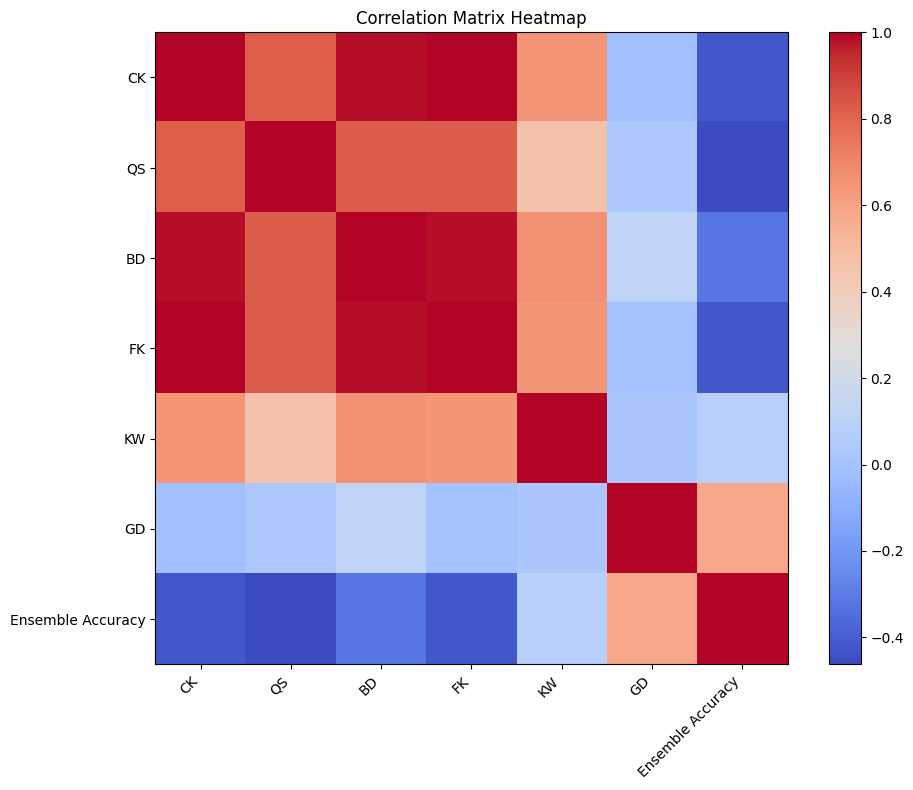

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the following are already calculated:
# - `team_diversity_metric_map`: Dictionary storing diversity metrics for each team
# - `team_accuracy_dict`: Dictionary storing ensemble accuracy for each team

# List of diversity metrics to consider
diversity_metrics = ['CK', 'QS', 'BD', 'FK', 'KW', 'GD']

# Initialize a dictionary to store the metrics and accuracies
data = {metric: [] for metric in diversity_metrics}
data['Ensemble Accuracy'] = []

# Collect the data for the correlation matrix
for team_name, metrics_dict in team_diversity_metric_map.items():
    ensemble_accuracy = team_accuracy_dict.get(team_name, np.nan)  # Use np.nan for missing accuracies
    data['Ensemble Accuracy'].append(ensemble_accuracy)  # Append the ensemble accuracy

    for metric in diversity_metrics:
        if metric in metrics_dict.get(str(one_target_model), {}):  # Check if the metric is present
            data[metric].append(metrics_dict[str(one_target_model)][metric])  # Append the metric score
        else:
            data[metric].append(np.nan)  # Append np.nan if the metric is missing

# Convert the data to a DataFrame
df = pd.DataFrame(data)

# Calculate the correlation matrix, excluding NaN values
correlation_matrix = df.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Optional: Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
plt.title("Correlation Matrix Heatmap")
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
ticks = np.arange(len(correlation_matrix.columns))
plt.xticks(ticks, correlation_matrix.columns, rotation=45, ha='right')
plt.yticks(ticks, correlation_matrix.columns)
plt.grid(False)
plt.tight_layout()
plt.show()


In [ ]:
testprediction_dir = '/content/drive/MyDrive/testPredictions'

# Load test labels
test_label_path = os.path.join(testprediction_dir, 'test_labels.npy')
test_label_vectors = np.load(test_label_path, allow_pickle=True)
test_label_vectors_torch = torch.tensor(test_label_vectors)

min_test_samples = len(test_label_vectors)
test_prediction_vectors_list = []

for model_name in models:
    test_prediction_path = os.path.join(testprediction_dir, model_name + '.npy')
    test_prediction_vectors = np.load(test_prediction_path, allow_pickle=True)
    test_prediction_vectors = tf.nn.softmax(test_prediction_vectors, axis=-1).numpy()
    min_test_samples = min(min_test_samples, len(test_prediction_vectors))
    test_prediction_vectors_list.append(test_prediction_vectors)


test_label_vectors = test_label_vectors[:min_test_samples]
test_label_vectors_torch = torch.tensor(test_label_vectors)

truncated_test_prediction_vectors_list = []
for test_prediction_vectors in test_prediction_vectors_list:
    truncated_test_prediction_vectors_list.append(torch.tensor(test_prediction_vectors[:min_test_samples]))

# Calculate the accuracy for each selected team using the test data
test_team_accuracy_dict = dict()

# Flatten the set of selected teams
selected_teams = set()
for teams in team_selected_fq_all_dict.values():
    selected_teams.update(teams)

# Calculate test accuracy for each selected team
for team_name in selected_teams:
    selected_models = [int(x) for x in team_name]
    test_accuracy = calAveragePredictionVectorAccuracy(truncated_test_prediction_vectors_list, test_label_vectors_torch, modelsList=selected_models)[0].cpu().item()
    test_team_accuracy_dict[team_name] = test_accuracy

# Sort teams by accuracy
sorted_teams = sorted(test_team_accuracy_dict.items(), key=lambda x: x[1], reverse=True)

# Print the table for top 10 teams
print("Ensemble Team | Ensemble Accuracy (%) | Highest Member Accuracy (%) | Highest Member Model | Accuracy Improvement (%)")
for team_name, ensemble_accuracy in sorted_teams[:10]:
    selected_models = [int(m) for m in team_name]
    highest_member_accuracy = 98.72
    highest_member_model = models[selected_models[np.argmax([tmp_acc_list[m] for m in selected_models])]]
    accuracy_improvement = ensemble_accuracy - highest_member_accuracy

    print(f"{team_name} | {ensemble_accuracy:.2f} | {highest_member_accuracy:.2f} | {highest_member_model} | {accuracy_improvement:.2f}")

Ensemble Team | Ensemble Accuracy (%) | Highest Member Accuracy (%) | Highest Member Model | Accuracy Improvement (%)
12359 | 99.80 | 98.72 | densenet121 | 1.08
1379 | 99.80 | 98.72 | densenet121 | 1.08
139 | 99.80 | 98.72 | densenet121 | 1.08
12369 | 99.79 | 98.72 | densenet121 | 1.07
1359 | 99.79 | 98.72 | densenet121 | 1.07
123789 | 99.79 | 98.72 | densenet121 | 1.07
1239 | 99.79 | 98.72 | densenet121 | 1.07
1238 | 99.78 | 98.72 | densenet121 | 1.06
13579 | 99.78 | 98.72 | densenet121 | 1.06
135789 | 99.78 | 98.72 | densenet121 | 1.06


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import EfficientNetB3
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Model name
model_name = "EfficientNetB3_new"

# Directories
train_dir = '/content/drive/MyDrive/Data/train'
val_dir = '/content/drive/MyDrive/Data/val'
test_dir = '/content/drive/MyDrive/Data/test'

# Define ImageDataGenerator with advanced augmentation for training
train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input
)

# Define ImageDataGenerator for validation (no augmentation, just preprocessing)
val_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input
)

# Setup Training Data Generator
train_images = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical'
)

# Setup Validation Data Generator
val_images = val_datagen.flow_from_directory(
    val_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical'
)

# Load and configure the pretrained model for fine-tuning
pretrained_model = EfficientNetB3(include_top=False, input_shape=(256, 256, 3), weights="imagenet")
pretrained_model.trainable = True  # Fine-tune the whole model

# Freeze all layers except the last 20
for layer in pretrained_model.layers[:-20]:
    layer.trainable = False

# Model building
inputs = pretrained_model.input
x = pretrained_model(inputs, training=False)  # Ensure the base is run in inference mode
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)  # Increase dropout rate for regularization
outputs = Dense(35, activation='softmax')(x)  # Assuming 35 classes

model = models.Model(inputs, outputs)

model.compile(
    optimizer=Adam(learning_rate=0.0001),  # Lower learning rate for fine-tuning
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)
checkpoint = ModelCheckpoint(f'/content/drive/MyDrive/SavedModels/{model_name}_best.h5', save_best_only=True, monitor='val_accuracy')

# Training
history = model.fit(
    train_images,
    validation_data=val_images,
    epochs=10,  # Increased epochs for better training
    callbacks=[early_stopping, reduce_lr, checkpoint]
)

# Save the final model after training with the model name
model.save(f'/content/drive/MyDrive/SavedModels/{model_name}_final.h5')


Found 64498 files belonging to 35 classes.
Found 8084 files belonging to 35 classes.
Found 8081 files belonging to 35 classes.
29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
51877672/51877672 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
74836368/74836368 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training densenet121...
Epoch 1/10
2016/2016 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8192 - loss: 0.6307
Epoch 1: val_accuracy improved from -inf to 0.80616, saving model to /content/drive/MyDrive/SavedModels/densenet121.keras
2016/2016 ━━━━━━━━━━━━━━━━━━━━ 4051s 2s/step - accuracy: 0.8192 - loss: 0.6306 - val_accuracy: 0.8062 - val_loss: 0.7578 - learning_rate: 0.0010
Epoch 2/10
2016/2016 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9556 - loss: 0.1373
Epoch 2: val_accuracy improved from 0.80616 to 0.93159, saving model to /content/drive/MyDrive/SavedModels/densenet121.keras
2016/2016 ━━━━━━━━━━━━━━━━━━━━ 3296s 2s/step - accuracy: 0.9556 - loss: 0.1373 - val_accuracy: 0.9316 - val_loss: 0.2258 - learnin

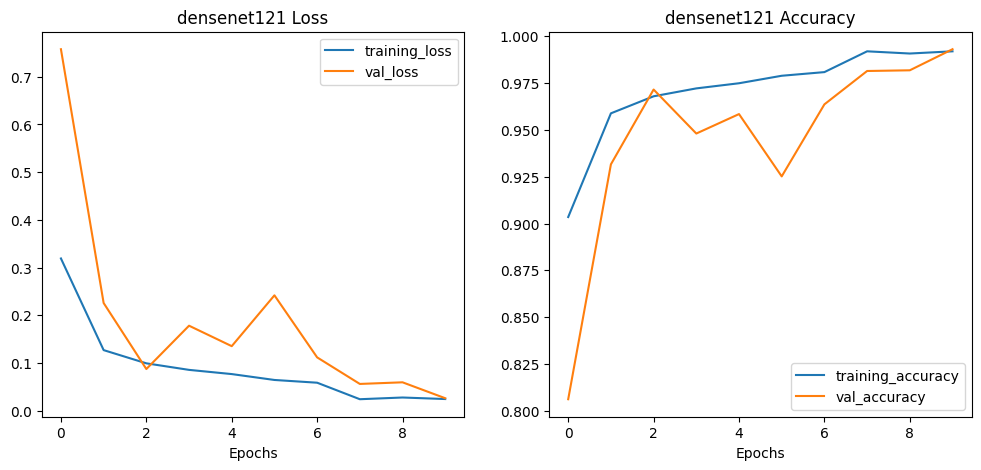

Training densenet169...
Epoch 1/10
2016/2016 ━━━━━━━━━━━━━━━━━━━━ 0s 938ms/step - accuracy: 0.7937 - loss: 0.7339
Epoch 1: val_accuracy improved from -inf to 0.85317, saving model to /content/drive/MyDrive/SavedModels/densenet169.keras
2016/2016 ━━━━━━━━━━━━━━━━━━━━ 2038s 963ms/step - accuracy: 0.7938 - loss: 0.7337 - val_accuracy: 0.8532 - val_loss: 0.4918 - learning_rate: 0.0010
Epoch 2/10
2016/2016 ━━━━━━━━━━━━━━━━━━━━ 0s 903ms/step - accuracy: 0.9548 - loss: 0.1447
Epoch 2: val_accuracy improved from 0.85317 to 0.93036, saving model to /content/drive/MyDrive/SavedModels/densenet169.keras
2016/2016 ━━━━━━━━━━━━━━━━━━━━ 1864s 925ms/step - accuracy: 0.9548 - loss: 0.1447 - val_accuracy: 0.9304 - val_loss: 0.2430 - learning_rate: 0.0010
Epoch 3/10
2016/2016 ━━━━━━━━━━━━━━━━━━━━ 0s 879ms/step - accuracy: 0.9637 - loss: 0.1120
Epoch 3: val_accuracy improved from 0.93036 to 0.94743, saving model to /content/drive/MyDrive/SavedModels/densenet169.keras
2016/2016 ━━━━━━━━━━━━━━━━━━━━ 1816s 9

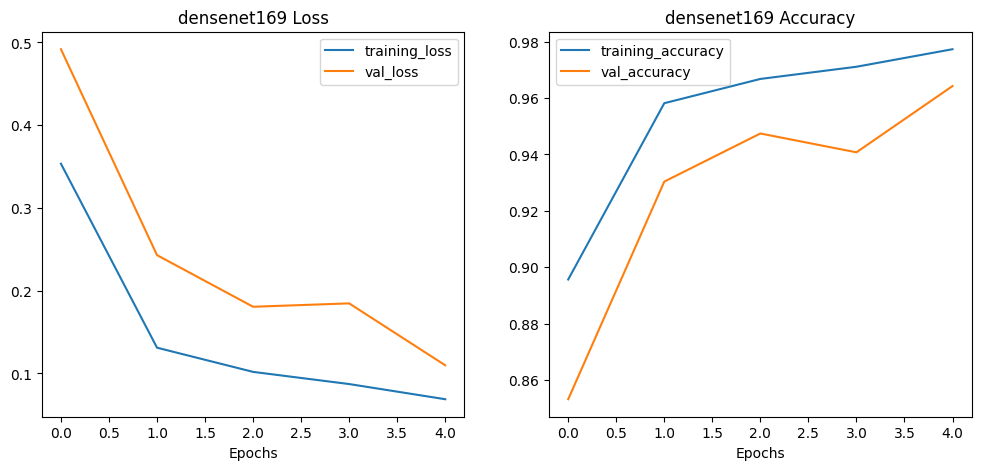

Training densenet201...
Epoch 1/10
2016/2016 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8010 - loss: 0.6963
Epoch 1: val_accuracy improved from -inf to 0.73454, saving model to /content/drive/MyDrive/SavedModels/densenet201.keras
2016/2016 ━━━━━━━━━━━━━━━━━━━━ 2283s 1s/step - accuracy: 0.8011 - loss: 0.6961 - val_accuracy: 0.7345 - val_loss: 1.2253 - learning_rate: 0.0010
Epoch 2/10
2016/2016 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9536 - loss: 0.1440
Epoch 2: val_accuracy improved from 0.73454 to 0.90228, saving model to /content/drive/MyDrive/SavedModels/densenet201.keras
2016/2016 ━━━━━━━━━━━━━━━━━━━━ 2130s 1s/step - accuracy: 0.9536 - loss: 0.1440 - val_accuracy: 0.9023 - val_loss: 0.3258 - learning_rate: 0.0010
Epoch 3/10
2016/2016 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9674 - loss: 0.1043
Epoch 3: val_accuracy did not improve from 0.90228
2016/2016 ━━━━━━━━━━━━━━━━━━━━ 2101s 1s/step - accuracy: 0.9674 - loss: 0.1043 - val_accuracy: 0.8914 - val_loss: 0.3772 - lear

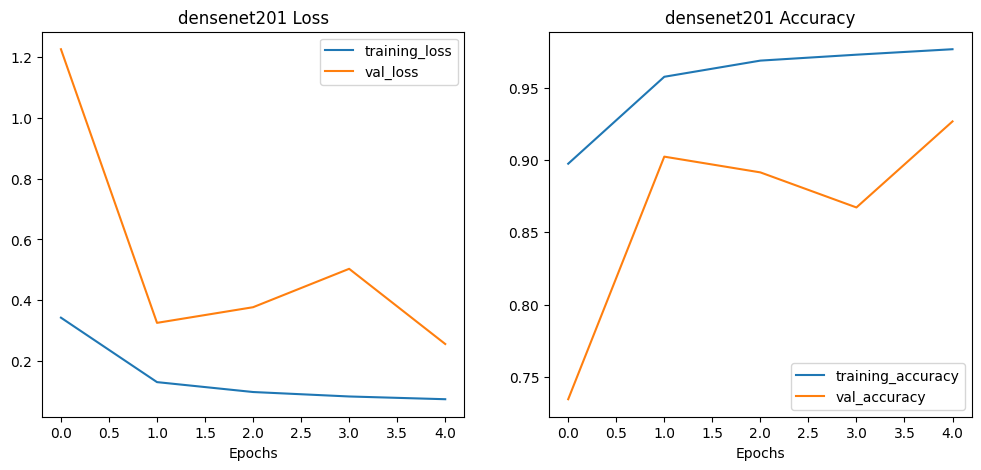

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, mixed_precision
from tensorflow.keras.applications import DenseNet121, DenseNet169, DenseNet201
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt

# Enable mixed precision
mixed_precision.set_global_policy("mixed_float16")

# Data loading
train_data = image_dataset_from_directory(train_dir, label_mode="categorical", image_size=(256, 256),
                                          batch_size=32, seed=42, shuffle=True)

val_data = image_dataset_from_directory(val_dir, label_mode="categorical", image_size=(256, 256),
                                        batch_size=32, seed=42, shuffle=False)

test_data = image_dataset_from_directory(test_dir, label_mode="categorical", image_size=(256, 256),
                                         batch_size=32, seed=42, shuffle=False)

train_data = train_data.prefetch(tf.data.AUTOTUNE)
val_data = val_data.prefetch(tf.data.AUTOTUNE)
test_data = test_data.prefetch(tf.data.AUTOTUNE)

# Callbacks
early_stop = EarlyStopping(monitor="val_loss", patience=5, min_delta=0.0001, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor="val_loss", patience=4, factor=0.5, min_lr=1e-7, verbose=1)

# ModelCheckpoint callbacks to save the best model based on validation accuracy
mc_121 = ModelCheckpoint(filepath='/content/drive/MyDrive/SavedModels/densenet121.keras', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
mc_169 = ModelCheckpoint(filepath='/content/drive/MyDrive/SavedModels/densenet169.keras', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
mc_201 = ModelCheckpoint(filepath='/content/drive/MyDrive/SavedModels/densenet201.keras', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

# Data augmentation layer
data_aug = tf.keras.Sequential([
    layers.RandomHeight(0.2),
    layers.RandomWidth(0.2),
    layers.RandomRotation(0.2),
    layers.RandomFlip("horizontal"),
    layers.Rescaling(1/255.)
], name="data_augmentation_layer")

# Function to create and compile the model
def create_densenet_model(base_model_class, input_shape=(256, 256, 3), num_classes=35):
    base_model = base_model_class(include_top=False, weights='imagenet', input_shape=input_shape)
    base_model.trainable = True  # Keep the base model trainable

    inputs = layers.Input(shape=input_shape, name="Input_layer")
    x = data_aug(inputs)
    x = base_model(x)
    x = layers.GlobalAveragePooling2D(name="Global_average_pooling_layer")(x)
    x = layers.Dense(32, activation="relu", kernel_initializer=tf.keras.initializers.HeNormal(), name="Dense_layer_1")(x)
    x = layers.Dense(num_classes, name="Dense_layer_2")(x)
    outputs = layers.Activation("softmax", dtype=tf.float32)(x)

    model = tf.keras.Model(inputs, outputs)
    model.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])
    return model

# Create and compile models with respective checkpoints
models = {
    "densenet121": (create_densenet_model(DenseNet121), mc_121),
    "densenet169": (create_densenet_model(DenseNet169), mc_169),
    "densenet201": (create_densenet_model(DenseNet201), mc_201)
}

# Plotting function
def plot_loss_curves(history, model_name):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    epochs = range(len(history.history['loss']))

    # Plot loss
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='training_loss')
    plt.plot(epochs, val_loss, label='val_loss')
    plt.title(f'{model_name} Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label='training_accuracy')
    plt.plot(epochs, val_accuracy, label='val_accuracy')
    plt.title(f'{model_name} Accuracy')
    plt.xlabel('Epochs')
    plt.legend()
    plt.show()

# Train and save the best model based on validation accuracy
histories = {}
for name, (model, checkpoint) in models.items():
    print(f"Training {name}...")
    history = model.fit(
        train_data,
        epochs=10,
        validation_data=val_data,
        callbacks=[checkpoint, early_stop, reduce_lr]
    )
    histories[name] = history

    # Evaluate on test data
    test_loss, test_accuracy = model.evaluate(test_data)
    print(f"{name} Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

    # Plot loss curves
    plot_loss_curves(history, name)


Found 64498 files belonging to 35 classes.
Found 8084 files belonging to 35 classes.
Found 8081 files belonging to 35 classes.
Continuing training densenet169 for 5 more epochs...
Epoch 1/5
2016/2016 ━━━━━━━━━━━━━━━━━━━━ 0s 781ms/step - accuracy: 0.9760 - loss: 0.0744
Epoch 1: val_accuracy improved from -inf to 0.95695, saving model to /content/drive/MyDrive/SavedModels/densenet169.keras
2016/2016 ━━━━━━━━━━━━━━━━━━━━ 1709s 806ms/step - accuracy: 0.9760 - loss: 0.0744 - val_accuracy: 0.9570 - val_loss: 0.1743 - learning_rate: 0.0010
Epoch 2/5
2016/2016 ━━━━━━━━━━━━━━━━━━━━ 0s 777ms/step - accuracy: 0.9797 - loss: 0.0606
Epoch 2: val_accuracy did not improve from 0.95695
2016/2016 ━━━━━━━━━━━━━━━━━━━━ 1605s 796ms/step - accuracy: 0.9797 - loss: 0.0606 - val_accuracy: 0.9281 - val_loss: 0.2441 - learning_rate: 0.0010
Epoch 3/5
2016/2016 ━━━━━━━━━━━━━━━━━━━━ 0s 779ms/step - accuracy: 0.9826 - loss: 0.0549
Epoch 3: val_accuracy did not improve from 0.95695
2016/2016 ━━━━━━━━━━━━━━━━━━━━ 16

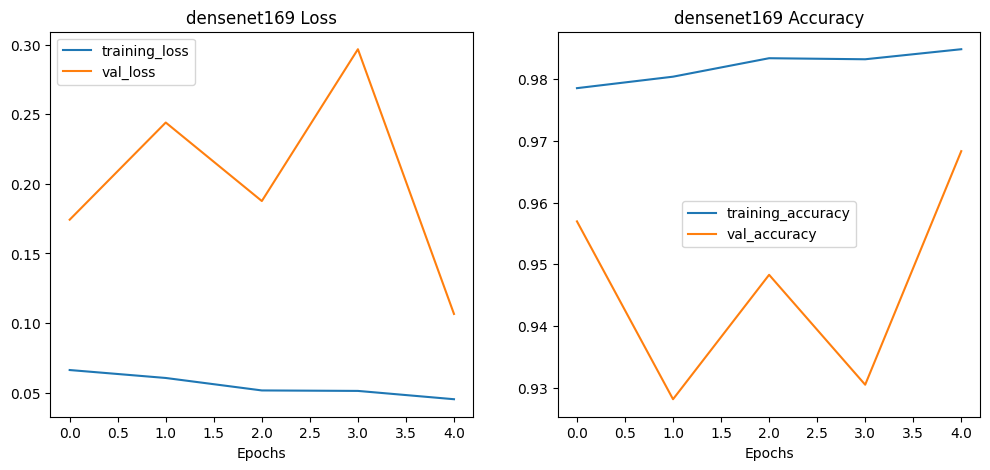

Continuing training densenet201 for 5 more epochs...
Epoch 1/5
2016/2016 ━━━━━━━━━━━━━━━━━━━━ 0s 969ms/step - accuracy: 0.9777 - loss: 0.0690
Epoch 1: val_accuracy improved from -inf to 0.92961, saving model to /content/drive/MyDrive/SavedModels/densenet201.keras
2016/2016 ━━━━━━━━━━━━━━━━━━━━ 2117s 1s/step - accuracy: 0.9777 - loss: 0.0690 - val_accuracy: 0.9296 - val_loss: 0.2338 - learning_rate: 0.0010
Epoch 2/5
2016/2016 ━━━━━━━━━━━━━━━━━━━━ 0s 983ms/step - accuracy: 0.9785 - loss: 0.0641
Epoch 2: val_accuracy improved from 0.92961 to 0.94829, saving model to /content/drive/MyDrive/SavedModels/densenet201.keras
2016/2016 ━━━━━━━━━━━━━━━━━━━━ 2039s 1s/step - accuracy: 0.9785 - loss: 0.0641 - val_accuracy: 0.9483 - val_loss: 0.1806 - learning_rate: 0.0010
Epoch 3/5
2016/2016 ━━━━━━━━━━━━━━━━━━━━ 0s 979ms/step - accuracy: 0.9824 - loss: 0.0524
Epoch 3: val_accuracy did not improve from 0.94829
2016/2016 ━━━━━━━━━━━━━━━━━━━━ 2023s 1s/step - accuracy: 0.9824 - loss: 0.0524 - val_accurac

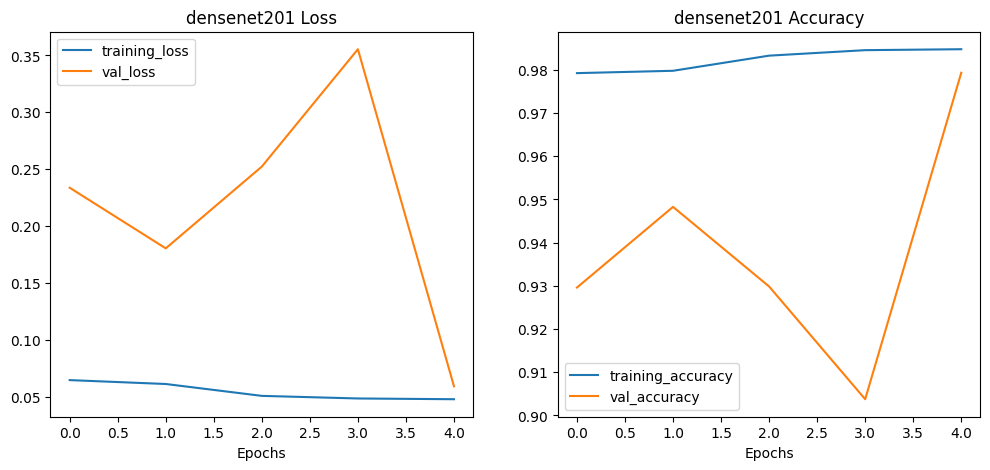

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, mixed_precision
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt

# Enable mixed precision
mixed_precision.set_global_policy("mixed_float16")

# Data loading
train_data = image_dataset_from_directory(train_dir, label_mode="categorical", image_size=(256, 256),
                                          batch_size=32, seed=42, shuffle=True)

val_data = image_dataset_from_directory(val_dir, label_mode="categorical", image_size=(256, 256),
                                        batch_size=32, seed=42, shuffle=False)

test_data = image_dataset_from_directory(test_dir, label_mode="categorical", image_size=(256, 256),
                                         batch_size=32, seed=42, shuffle=False)

train_data = train_data.prefetch(tf.data.AUTOTUNE)
val_data = val_data.prefetch(tf.data.AUTOTUNE)
test_data = test_data.prefetch(tf.data.AUTOTUNE)

# Callbacks
early_stop = EarlyStopping(monitor="val_loss", patience=5, min_delta=0.0001, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor="val_loss", patience=4, factor=0.5, min_lr=1e-7, verbose=1)

# Load the saved models
densenet169 = tf.keras.models.load_model('/content/drive/MyDrive/SavedModels/densenet169.keras')
densenet201 = tf.keras.models.load_model('/content/drive/MyDrive/SavedModels/densenet201.keras')

# Recreate the ModelCheckpoint callbacks to continue saving the best models
mc_169 = ModelCheckpoint(filepath='/content/drive/MyDrive/SavedModels/densenet169.keras', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
mc_201 = ModelCheckpoint(filepath='/content/drive/MyDrive/SavedModels/densenet201.keras', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

# Continue training for 5 more epochs
models = {
    "densenet169": (densenet169, mc_169),
    "densenet201": (densenet201, mc_201)
}

# Plotting function
def plot_loss_curves(history, model_name):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    epochs = range(len(history.history['loss']))

    # Plot loss
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='training_loss')
    plt.plot(epochs, val_loss, label='val_loss')
    plt.title(f'{model_name} Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label='training_accuracy')
    plt.plot(epochs, val_accuracy, label='val_accuracy')
    plt.title(f'{model_name} Accuracy')
    plt.xlabel('Epochs')
    plt.legend()
    plt.show()

# Continue training and save the best model based on validation accuracy
histories = {}
for name, (model, checkpoint) in models.items():
    print(f"Continuing training {name} for 5 more epochs...")
    history = model.fit(
        train_data,
        epochs=5,  # Train for 5 more epochs
        validation_data=val_data,
        callbacks=[checkpoint, early_stop, reduce_lr]
    )
    histories[name] = history

    # Evaluate on test data
    test_loss, test_accuracy = model.evaluate(test_data)
    print(f"{name} Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

    # Plot loss curves
    plot_loss_curves(history, name)


In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.models import load_model

# Define directories
test_dir = '/content/test'
prediction_dir = '/content/drive/MyDrive/testPredictions'

# Ensure the prediction directory exists
os.makedirs(prediction_dir, exist_ok=True)

# Data generator for the test set with the same preprocessing function as during training
test_data = image_dataset_from_directory(
    test_dir,
    label_mode="categorical",
    image_size=(256, 256),
    batch_size=32,
    shuffle=False  # Important to keep order
)

# Extract the filenames from the dataset to ensure order consistency
file_paths = test_data.file_paths
file_names = [os.path.basename(file_path) for file_path in file_paths]
file_order_path = os.path.join(prediction_dir, 'file_order.npy')

# Save the order of filenames for consistency checks
np.save(file_order_path, file_names)
print(f'Saved file order to {file_order_path}')

# Load the models
densenet121 = load_model('/content/drive/MyDrive/SavedModels/densenet121.keras')
densenet169 = load_model('/content/drive/MyDrive/SavedModels/densenet169.keras')
densenet201 = load_model('/content/drive/MyDrive/SavedModels/densenet201.keras')

# List of models to evaluate
models = {
    "densenet121": densenet121,
    "densenet169": densenet169,
    "densenet201": densenet201
}

# Function to generate and save predictions
def generate_and_save_predictions(model, model_name):
    predictions = model.predict(test_data)
    prediction_file = os.path.join(prediction_dir, f'{model_name}_predictions.npy')
    np.save(prediction_file, predictions)
    print(f'Saved predictions for {model_name} to {prediction_file}')

    # Validate that the order of predictions matches the saved file order
    current_file_order = [os.path.basename(file_path) for file_path in test_data.file_paths]
    assert file_names == current_file_order, "The order of files has changed!"
    print(f"Order check passed for {model_name}.")

# Generate and save predictions for each model
for model_name, model in models.items():
    print(f"Generating predictions for {model_name}...")
    generate_and_save_predictions(model, model_name)


Found 8081 files belonging to 35 classes.
Saved file order to /content/drive/MyDrive/testPredictions/file_order.npy


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 734 variables whereas the saved optimizer has 738 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 1022 variables whereas the saved optimizer has 1026 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 1214 variables whereas the saved optimizer has 1218 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Generating predictions for densenet121...
253/253 ━━━━━━━━━━━━━━━━━━━━ 41s 145ms/step
Saved predictions for densenet121 to /content/drive/MyDrive/testPredictions/densenet121_predictions.npy
Order check passed for densenet121.
Generating predictions for densenet169...
253/253 ━━━━━━━━━━━━━━━━━━━━ 49s 174ms/step
Saved predictions for densenet169 to /content/drive/MyDrive/testPredictions/densenet169_predictions.npy
Order check passed for densenet169.
Generating predictions for densenet201...
253/253 ━━━━━━━━━━━━━━━━━━━━ 62s 222ms/step
Saved predictions for densenet201 to /content/drive/MyDrive/testPredictions/densenet201_predictions.npy
Order check passed for densenet201.


In [ ]:
pip install tensorflow==2.17.0


  Using cached tensorflow-2.17.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.2 kB)
  Using cached ml_dtypes-0.4.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (20 kB)
  Using cached tensorboard-2.17.1-py3-none-any.whl.metadata (1.6 kB)
  Using cached keras-3.5.0-py3-none-any.whl.metadata (5.8 kB)
Using cached tensorflow-2.17.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (601.3 MB)
Using cached keras-3.5.0-py3-none-any.whl (1.1 MB)
Using cached ml_dtypes-0.4.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (2.2 MB)
Using cached tensorboard-2.17.1-py3-none-any.whl (5.5 MB)
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Successfully uninstalled tensorboard-2.15.2
  Atte

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.models import load_model

# Define directories
val_dir = '/content/val'
prediction_dir = '/content/drive/MyDrive/Predictions'

# Ensure the prediction directory exists
os.makedirs(prediction_dir, exist_ok=True)

# Data generator for the test set with the same preprocessing function as during training
val_data = image_dataset_from_directory(
    val_dir,
    label_mode="categorical",
    image_size=(256, 256),
    batch_size=32,
    shuffle=False  # Important to keep order
)

# Extract the filenames from the dataset to ensure order consistency
file_paths = val_data.file_paths
file_names = [os.path.basename(file_path) for file_path in file_paths]
file_order_path = os.path.join(prediction_dir, 'file_order.npy')

# Save the order of filenames for consistency checks
np.save(file_order_path, file_names)
print(f'Saved file order to {file_order_path}')

# Load the models
densenet121 = load_model('/content/drive/MyDrive/SavedModels/densenet121.keras')
densenet169 = load_model('/content/drive/MyDrive/SavedModels/densenet169.keras')
densenet201 = load_model('/content/drive/MyDrive/SavedModels/densenet201.keras')

# List of models to evaluate
models = {
    "densenet121": densenet121,
    "densenet169": densenet169,
    "densenet201": densenet201
}

# Function to generate and save predictions
def generate_and_save_predictions(model, model_name):
    predictions = model.predict(val_data)
    prediction_file = os.path.join(prediction_dir, f'{model_name}_predictions.npy')
    np.save(prediction_file, predictions)
    print(f'Saved predictions for {model_name} to {prediction_file}')

    # Validate that the order of predictions matches the saved file order
    current_file_order = [os.path.basename(file_path) for file_path in val_data.file_paths]
    assert file_names == current_file_order, "The order of files has changed!"
    print(f"Order check passed for {model_name}.")

# Generate and save predictions for each model
for model_name, model in models.items():
    print(f"Generating predictions for {model_name}...")
    generate_and_save_predictions(model, model_name)


Found 8084 files belonging to 35 classes.
Saved file order to /content/drive/MyDrive/Predictions/file_order.npy


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 734 variables whereas the saved optimizer has 738 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 1022 variables whereas the saved optimizer has 1026 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 1214 variables whereas the saved optimizer has 1218 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Generating predictions for densenet121...
253/253 ━━━━━━━━━━━━━━━━━━━━ 42s 145ms/step
Saved predictions for densenet121 to /content/drive/MyDrive/Predictions/densenet121_predictions.npy
Order check passed for densenet121.
Generating predictions for densenet169...
253/253 ━━━━━━━━━━━━━━━━━━━━ 49s 173ms/step
Saved predictions for densenet169 to /content/drive/MyDrive/Predictions/densenet169_predictions.npy
Order check passed for densenet169.
Generating predictions for densenet201...
253/253 ━━━━━━━━━━━━━━━━━━━━ 62s 222ms/step
Saved predictions for densenet201 to /content/drive/MyDrive/Predictions/densenet201_predictions.npy
Order check passed for densenet201.


In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.models import load_model

# Define directories
train_dir = '/content/train'
prediction_dir = '/content/drive/MyDrive/trainPredictions'

# Ensure the prediction directory exists
os.makedirs(prediction_dir, exist_ok=True)

# Data generator for the test set with the same preprocessing function as during training
train_data = image_dataset_from_directory(
    train_dir,
    label_mode="categorical",
    image_size=(256, 256),
    batch_size=32,
    shuffle=False  # Important to keep order
)

# Extract the filenames from the dataset to ensure order consistency
file_paths = train_data.file_paths
file_names = [os.path.basename(file_path) for file_path in file_paths]
file_order_path = os.path.join(prediction_dir, 'file_order.npy')

# Save the order of filenames for consistency checks
np.save(file_order_path, file_names)
print(f'Saved file order to {file_order_path}')

# Load the models
densenet121 = load_model('/content/drive/MyDrive/SavedModels/densenet121.keras')
densenet169 = load_model('/content/drive/MyDrive/SavedModels/densenet169.keras')
densenet201 = load_model('/content/drive/MyDrive/SavedModels/densenet201.keras')

# List of models to evaluate
models = {
    "densenet121": densenet121,
    "densenet169": densenet169,
    "densenet201": densenet201
}

# Function to generate and save predictions
def generate_and_save_predictions(model, model_name):
    predictions = model.predict(train_data)
    prediction_file = os.path.join(prediction_dir, f'{model_name}_predictions.npy')
    np.save(prediction_file, predictions)
    print(f'Saved predictions for {model_name} to {prediction_file}')

    # Validate that the order of predictions matches the saved file order
    current_file_order = [os.path.basename(file_path) for file_path in train_data.file_paths]
    assert file_names == current_file_order, "The order of files has changed!"
    print(f"Order check passed for {model_name}.")

# Generate and save predictions for each model
for model_name, model in models.items():
    print(f"Generating predictions for {model_name}...")
    generate_and_save_predictions(model, model_name)


Found 64498 files belonging to 35 classes.
Saved file order to /content/drive/MyDrive/trainPredictions/file_order.npy


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 734 variables whereas the saved optimizer has 738 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 1022 variables whereas the saved optimizer has 1026 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 1214 variables whereas the saved optimizer has 1218 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Generating predictions for densenet121...
2016/2016 ━━━━━━━━━━━━━━━━━━━━ 264s 129ms/step
Saved predictions for densenet121 to /content/drive/MyDrive/trainPredictions/densenet121_predictions.npy
Order check passed for densenet121.
Generating predictions for densenet169...
2016/2016 ━━━━━━━━━━━━━━━━━━━━ 318s 155ms/step
Saved predictions for densenet169 to /content/drive/MyDrive/trainPredictions/densenet169_predictions.npy
Order check passed for densenet169.
Generating predictions for densenet201...
2016/2016 ━━━━━━━━━━━━━━━━━━━━ 407s 199ms/step
Saved predictions for densenet201 to /content/drive/MyDrive/trainPredictions/densenet201_predictions.npy
Order check passed for densenet201.


In [ ]:
#ResNet Model

In [ ]:
import tensorflow
from tensorflow import keras
from keras.models import Sequential,load_model,Model
from keras.layers import Conv2D,MaxPool2D,AveragePooling2D,Dense,Flatten,ZeroPadding2D,BatchNormalization,Activation,Add,Input,Dropout,GlobalAveragePooling2D
from keras.optimizers import SGD
from keras.initializers import glorot_uniform
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
base_model_tf=ResNet50(include_top=False,weights='imagenet',input_shape=(256,256,3),classes=35)
from tensorflow.keras.applications.resnet50 import preprocess_input

train_dir = '/content/drive/MyDrive/Data/train'
val_dir = '/content/drive/MyDrive/Data/val'
test_dir = '/content/drive/MyDrive/Data/test'
#Model building
base_model_tf.trainable=False

pt=Input(shape=(256,256,3))
func=tensorflow.cast(pt,tensorflow.float32)
x=preprocess_input(func) #This function used to zero-center each color channel wrt Imagenet dataset
model_resnet=base_model_tf(x,training=False)
model_resnet=GlobalAveragePooling2D()(model_resnet)
model_resnet=Dense(128,activation='relu')(model_resnet)
model_resnet=Dense(64,activation='relu')(model_resnet)
model_resnet=Dense(35,activation='softmax')(model_resnet)

model_main=Model(inputs=pt,outputs=model_resnet)
model_main.summary()
#Image augmentation
train_datagen= ImageDataGenerator(shear_range=0.2,zoom_range=0.2,horizontal_flip=False,vertical_flip=False
                                  ,fill_mode='nearest',width_shift_range=0.2,height_shift_range=0.2)

val_datagen=ImageDataGenerator()

path_train=train_dir

path_valid=val_dir

train= train_datagen.flow_from_directory(directory=path_train,batch_size=32,target_size=(256,256),
                                         color_mode='rgb',class_mode='categorical',seed=42)

valid=val_datagen.flow_from_directory(directory=path_valid,batch_size=32,target_size=(256,256),color_mode='rgb',class_mode='categorical')
#CallBacks
es=EarlyStopping(monitor='val_accuracy',verbose=1,patience=7,mode='auto')
mc=ModelCheckpoint(filepath='/content',monitor='val_accuracy',verbose=1,save_best_only=True)
lr=ReduceLROnPlateau(monitor='val_accuracy',verbose=1,patience=5,min_lr=0.001)
model_main.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
#Training
history_resnet =model_main.fit(train,validation_data=valid,epochs=10,verbose=1,callbacks=[mc,es,lr])
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Test data generator
test_datagen = ImageDataGenerator()

# Loading test data
test_data = test_datagen.flow_from_directory(
    directory=test_dir,
    target_size=(256, 256),
    color_mode='rgb',
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Important for later comparison
)

# Evaluating the model on the test set
test_loss, test_accuracy = model_main.evaluate(test_data)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# If the test accuracy is not above 90%, consider further tuning your model.
if test_accuracy < 0.9:
    print("Consider further tuning your model or applying more advanced data augmentation to improve test accuracy.")

# Assuming 'history' is the output of the fit function from the actual training process,
# containing the training history including the recorded metrics at the end of each epoch.

# Plotting the graphs using the actual history object.
plt.figure(figsize=(12, 5))

# Subplot for accuracy
plt.subplot(1, 2, 1)  # 1 row, 2 columns, subplot 1
plt.plot(history_resnet.history['accuracy'], label='Training Accuracy')  # 'accuracy' key might differ based on the actual history object
plt.plot(history_resnet.history['val_accuracy'], label='Validation Accuracy')  # 'val_accuracy' key might differ based on the actual history object
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Subplot for loss
plt.subplot(1, 2, 2)  # 1 row, 2 columns, subplot 2
plt.plot(history_resnet.history['loss'], label='Training Loss')  # 'loss' key might differ based on the actual history object
plt.plot(history_resnet.history['val_loss'], label='Validation Loss')  # 'val_loss' key might differ based on the actual history object
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Show the plots
plt.show()

Found 64498 images belonging to 35 classes.
Found 8084 images belonging to 35 classes.
Found 8081 images belonging to 35 classes.
Epoch 1/50


KeyboardInterrupt: 

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import pickle

# Assuming history_resnet is the history object from your training

# Save the model
model_save_path = '/content/drive/MyDrive/SavedModels/ResNet50.h5'
model_main.save(model_save_path)
print(f"Model saved at {model_save_path}")

# Save the training history
history_save_path = '/content/drive/MyDrive/SavedModels/history_resnet.pkl'
with open(history_save_path, 'wb') as f:
    pickle.dump(history_resnet.history, f)
print(f"Training history saved at {history_save_path}")


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved at /content/drive/MyDrive/SavedModels/ResNet50.h5
Training history saved at /content/drive/MyDrive/SavedModels/history_resnet.pkl


234698864/234698864 [==============================] - 2s 0us/step
Found 64498 images belonging to 35 classes.
Found 8084 images belonging to 35 classes.
Epoch 1/10
2016/2016 [==============================] - ETA: 0s - loss: 0.3739 - accuracy: 0.8862
Epoch 1: val_accuracy improved from -inf to 0.94730, saving model to /content/drive/MyDrive/SavedModels/resnet101.h5
2016/2016 [==============================] - 1026s 505ms/step - loss: 0.3739 - accuracy: 0.8862 - val_loss: 0.1557 - val_accuracy: 0.9473 - lr: 0.0010
Epoch 2/10
2016/2016 [==============================] - ETA: 0s - loss: 0.1570 - accuracy: 0.9486
Epoch 2: val_accuracy improved from 0.94730 to 0.95460, saving model to /content/drive/MyDrive/SavedModels/resnet101.h5
2016/2016 [==============================] - 999s 496ms/step - loss: 0.1570 - accuracy: 0.9486 - val_loss: 0.1311 - val_accuracy: 0.9546 - lr: 0.0010
Epoch 3/10
2016/2016 [==============================] - ETA: 0s - loss: 0.1291 - accuracy: 0.9559
Epoch 3: val_a

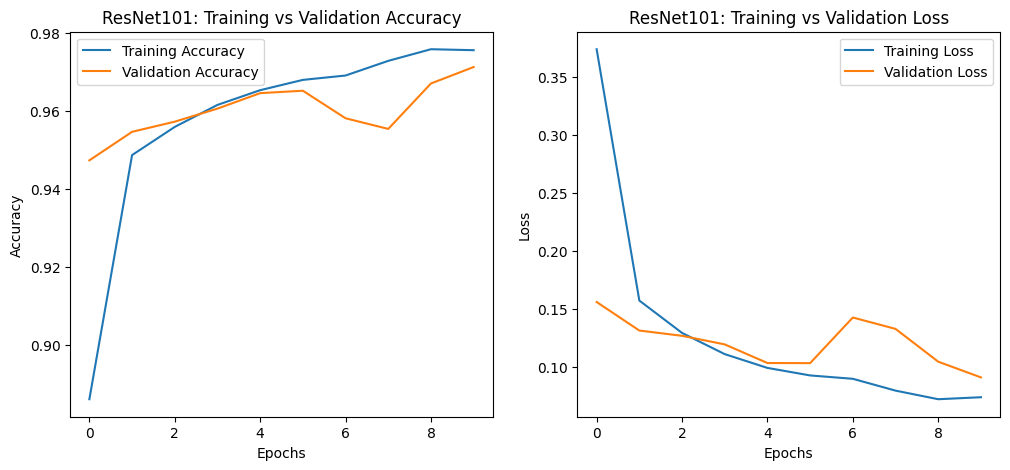

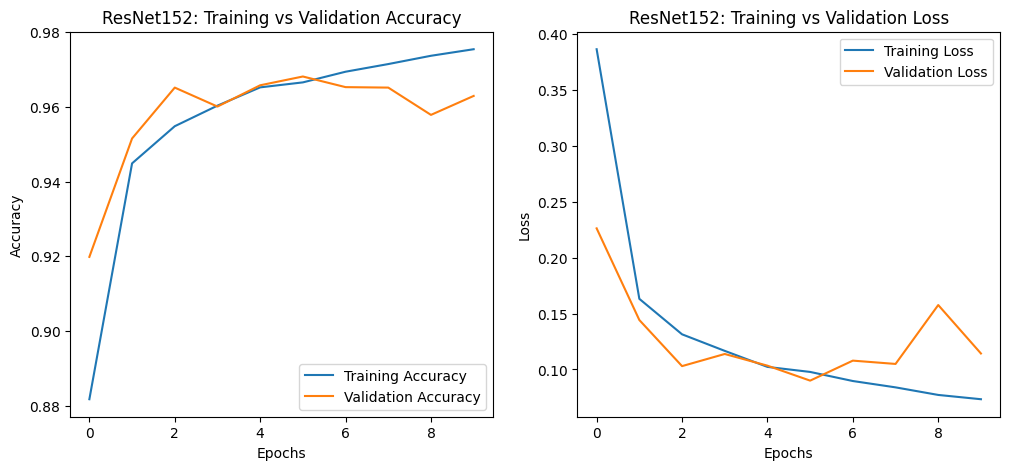

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet101, ResNet152
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt

train_dir = '/content/drive/MyDrive/Data/train'
val_dir = '/content/drive/MyDrive/Data/val'
test_dir = '/content/drive/MyDrive/Data/test'

# Function to create and compile the model
def create_resnet_model(base_model_class, input_shape=(256, 256, 3), num_classes=35):
    base_model = base_model_class(include_top=False, weights='imagenet', input_shape=input_shape)
    base_model.trainable = False

    inputs = Input(shape=input_shape)
    x = tf.cast(inputs, tf.float32)
    x = base_model(x, training=False)
    x = GlobalAveragePooling2D()(x)
    x = Dense(128, activation='relu')(x)
    x = Dense(64, activation='relu')(x)
    outputs = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs, outputs)
    return model

# Create ResNet101 and ResNet152 models
resnet101_model = create_resnet_model(ResNet101)
resnet152_model = create_resnet_model(ResNet152)

# Compile the models
resnet101_model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
resnet152_model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Image augmentation
train_datagen = ImageDataGenerator(shear_range=0.2, zoom_range=0.2, horizontal_flip=False,
                                   vertical_flip=False, fill_mode='nearest', width_shift_range=0.2, height_shift_range=0.2)
val_datagen = ImageDataGenerator()

# Data generators
train_generator = train_datagen.flow_from_directory(directory=train_dir, batch_size=32, target_size=(256, 256),
                                                    color_mode='rgb', class_mode='categorical', seed=42)
valid_generator = val_datagen.flow_from_directory(directory=val_dir, batch_size=32, target_size=(256, 256),
                                                  color_mode='rgb', class_mode='categorical')

# Callbacks
es = EarlyStopping(monitor='val_accuracy', verbose=1, patience=7, mode='auto')
mc_101 = ModelCheckpoint(filepath='/content/drive/MyDrive/SavedModels/resnet101.h5', monitor='val_accuracy', verbose=1, save_best_only=True)
mc_152 = ModelCheckpoint(filepath='/content/drive/MyDrive/SavedModels/resnet152.h5', monitor='val_accuracy', verbose=1, save_best_only=True)
lr = ReduceLROnPlateau(monitor='val_accuracy', verbose=1, patience=5, min_lr=0.001)

# Train the models
history_resnet101 = resnet101_model.fit(train_generator, validation_data=valid_generator, epochs=10, verbose=1, callbacks=[mc_101, es, lr])
history_resnet152 = resnet152_model.fit(train_generator, validation_data=valid_generator, epochs=10, verbose=1, callbacks=[mc_152, es, lr])

# Evaluate the models on the test set
test_datagen = ImageDataGenerator()
test_data = test_datagen.flow_from_directory(directory=test_dir, target_size=(256, 256), color_mode='rgb', batch_size=32, class_mode='categorical', shuffle=False)

test_loss_101, test_accuracy_101 = resnet101_model.evaluate(test_data)
test_loss_152, test_accuracy_152 = resnet152_model.evaluate(test_data)

print(f"ResNet101 Test Loss: {test_loss_101}, Test Accuracy: {test_accuracy_101}")
print(f"ResNet152 Test Loss: {test_loss_152}, Test Accuracy: {test_accuracy_152}")

# Plotting the graphs for ResNet101
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_resnet101.history['accuracy'], label='Training Accuracy')
plt.plot(history_resnet101.history['val_accuracy'], label='Validation Accuracy')
plt.title('ResNet101: Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_resnet101.history['loss'], label='Training Loss')
plt.plot(history_resnet101.history['val_loss'], label='Validation Loss')
plt.title('ResNet101: Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Plotting the graphs for ResNet152
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_resnet152.history['accuracy'], label='Training Accuracy')
plt.plot(history_resnet152.history['val_accuracy'], label='Validation Accuracy')
plt.title('ResNet152: Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_resnet152.history['loss'], label='Training Loss')
plt.plot(history_resnet152.history['val_loss'], label='Validation Loss')
plt.title('ResNet152: Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [ ]:
#EfficientNet

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import EfficientNetB3, EfficientNetB4
from google.colab import drive

save_dir = '/content/drive/MyDrive/SavedModels'
os.makedirs(save_dir, exist_ok=True)
train_dir = '/content/drive/MyDrive/Data/train'
val_dir = '/content/drive/MyDrive/Data/val'
test_dir = '/content/drive/MyDrive/Data/test'

# ImageDataGenerator with advanced augmentation for training
train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input
)

# ImageDataGenerator for validation (no augmentation, just preprocessing)
val_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input
)

# Setup Training Data Generator
train_images = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical'
)

# Setup Validation Data Generator
val_images = val_datagen.flow_from_directory(
    val_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical'
)

# Function to build, compile, and train the model
def build_and_train_efficientnet(model_class, model_name, input_shape=(256, 256, 3), num_classes=35, epochs=10):
    # Load and configure the pretrained model for fine-tuning
    base_model = model_class(include_top=False, input_shape=input_shape, weights="imagenet")
    base_model.trainable = True  # Fine-tune the whole model

    # Freeze all layers except the last 20
    for layer in base_model.layers[:-20]:
        layer.trainable = False

    # Model building
    inputs = base_model.input
    x = base_model(inputs, training=False)  # Ensure the base is run in inference mode
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)  # Increase dropout rate for regularization
    outputs = Dense(num_classes, activation='softmax')(x)  # Assuming 35 classes

    model = models.Model(inputs, outputs)

    model.compile(
        optimizer=Adam(learning_rate=0.0001),  # Lower learning rate for fine-tuning
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    # Callbacks
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)
    checkpoint = ModelCheckpoint(os.path.join(save_dir, f'{model_name}.h5'), save_best_only=True, monitor='val_accuracy')

    # Training
    history = model.fit(
        train_images,
        validation_data=val_images,
        epochs=epochs,  # Potentially increase epochs
        callbacks=[early_stopping, reduce_lr, checkpoint]
    )

    return history, model

# Train EfficientNetB3, B4, and B5
models_dict = {
    'EfficientNetB3': EfficientNetB3,
    'EfficientNetB4': EfficientNetB4,
}

histories = {}
for model_name, model_class in models_dict.items():
    print(f"Training {model_name}...")
    history, model = build_and_train_efficientnet(model_class, model_name)
    histories[model_name] = history


Found 64498 images belonging to 35 classes.
Found 8084 images belonging to 35 classes.
Training EfficientNetB3...
43941136/43941136 [==============================] - 0s 0us/step
Epoch 1/10
2016/2016 [==============================] - 1028s 503ms/step - loss: 0.5066 - accuracy: 0.8509 - val_loss: 0.1545 - val_accuracy: 0.9484 - lr: 1.0000e-04
Epoch 2/10
2016/2016 [==============================] - 998s 495ms/step - loss: 0.1430 - accuracy: 0.9536 - val_loss: 0.1042 - val_accuracy: 0.9665 - lr: 1.0000e-04
Epoch 3/10
2016/2016 [==============================] - 1000s 496ms/step - loss: 0.0930 - accuracy: 0.9696 - val_loss: 0.0711 - val_accuracy: 0.9759 - lr: 1.0000e-04
Epoch 4/10
2016/2016 [==============================] - 990s 491ms/step - loss: 0.0728 - accuracy: 0.9758 - val_loss: 0.0594 - val_accuracy: 0.9779 - lr: 1.0000e-04
Epoch 5/10
2016/2016 [==============================] - 996s 494ms/step - loss: 0.0598 - accuracy: 0.9803 - val_loss: 0.0796 - val_accuracy: 0.9745 - lr: 1.000

In [ ]:
#Prediction Vectors test

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model

# Paths for dataset and model
test_dir = '/content/test'
prediction_dir = '/content/drive/MyDrive/testPredictions'
os.makedirs(prediction_dir, exist_ok=True)

# Data generator for test set with the same preprocessing function as during training
test_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256, 256),  # Adjust target size to match your model input
    batch_size=32,  # Adjust batch size based on your hardware
    class_mode='categorical',  # Change to 'categorical' if you have multiple classes
    shuffle=False  # Keep shuffle=False to maintain the order of images
)

# Extract the filenames from the generator to ensure consistent order
file_names = test_generator.filenames
file_order_path = os.path.join(prediction_dir, 'file_order.npy')

# Save the order of filenames for consistency checks
np.save(file_order_path, file_names)
print(f'Saved file order to {file_order_path}')

# Function to load and evaluate a model
def load_and_evaluate_model(model_path):
    model = tf.keras.models.load_model(model_path)
    loss, accuracy = model.evaluate(test_generator)
    print(f'Test Loss: {loss}')
    print(f'Test Accuracy: {accuracy}')
    predictions = model.predict(test_generator)
    prediction_file = os.path.join(prediction_dir, f'{os.path.basename(model_path)}_predictions.npy')
    np.save(prediction_file, predictions)
    print(f'Predictions saved to {prediction_file}')

    # Validate that the order of predictions matches the saved file order
    current_file_order = test_generator.filenames
    assert file_names == current_file_order, f"File order has changed for model: {os.path.basename(model_path)}"
    print(f"Order check passed for {os.path.basename(model_path)}.")

# List of ResNet models and their paths
model_names = ['ResNet50', 'resnet101', 'resnet152']
model_paths = [f'/content/drive/MyDrive/SavedModels/{name}.h5' for name in model_names]

# Evaluate each model
for model_path in model_paths:
    print(f"Evaluating model: {os.path.basename(model_path)}")
    load_and_evaluate_model(model_path)


Found 8081 images belonging to 35 classes.
Saved file order to /content/drive/MyDrive/testPredictions/file_order.npy
Evaluating model: ResNet50.h5


253/253 [==============================] - 22s 74ms/step - loss: 0.0782 - accuracy: 0.9750
Test Loss: 0.07821972668170929
Test Accuracy: 0.9750031232833862
253/253 [==============================] - 18s 65ms/step
Predictions saved to /content/drive/MyDrive/testPredictions/ResNet50.h5_predictions.npy
Order check passed for ResNet50.h5.
Evaluating model: resnet101.h5


253/253 [==============================] - 28s 101ms/step - loss: 0.1065 - accuracy: 0.9668
Test Loss: 0.1064552366733551
Test Accuracy: 0.9668357968330383
253/253 [==============================] - 27s 98ms/step
Predictions saved to /content/drive/MyDrive/testPredictions/resnet101.h5_predictions.npy
Order check passed for resnet101.h5.
Evaluating model: resnet152.h5


253/253 [==============================] - 40s 145ms/step - loss: 0.0878 - accuracy: 0.9692
Test Loss: 0.08778040111064911
Test Accuracy: 0.9691869616508484
253/253 [==============================] - 38s 139ms/step
Predictions saved to /content/drive/MyDrive/testPredictions/resnet152.h5_predictions.npy
Order check passed for resnet152.h5.


In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model

# Paths for dataset and model
val_dir = '/content/val'
prediction_dir = '/content/drive/MyDrive/Predictions'
os.makedirs(prediction_dir, exist_ok=True)

# Data generator for test set with the same preprocessing function as during training
val_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(256, 256),  # Adjust target size to match your model input
    batch_size=32,  # Adjust batch size based on your hardware
    class_mode='categorical',  # Change to 'categorical' if you have multiple classes
    shuffle=False  # Keep shuffle=False to maintain the order of images
)

# Extract the filenames from the generator to ensure consistent order
file_names = test_generator.filenames
file_order_path = os.path.join(prediction_dir, 'file_order.npy')

# Save the order of filenames for consistency checks
np.save(file_order_path, file_names)
print(f'Saved file order to {file_order_path}')

# Function to load and evaluate a model
def load_and_evaluate_model(model_path):
    model = tf.keras.models.load_model(model_path)
    loss, accuracy = model.evaluate(val_generator)
    print(f'Test Loss: {loss}')
    print(f'Test Accuracy: {accuracy}')
    predictions = model.predict(val_generator)
    prediction_file = os.path.join(prediction_dir, f'{os.path.basename(model_path)}_predictions.npy')
    np.save(prediction_file, predictions)
    print(f'Predictions saved to {prediction_file}')

    # Validate that the order of predictions matches the saved file order
    current_file_order = test_generator.filenames
    assert file_names == current_file_order, f"File order has changed for model: {os.path.basename(model_path)}"
    print(f"Order check passed for {os.path.basename(model_path)}.")

# List of ResNet models and their paths
model_names = ['ResNet50', 'resnet101', 'resnet152']
model_paths = [f'/content/drive/MyDrive/SavedModels/{name}.h5' for name in model_names]

# Evaluate each model
for model_path in model_paths:
    print(f"Evaluating model: {os.path.basename(model_path)}")
    load_and_evaluate_model(model_path)


Found 8084 images belonging to 35 classes.
Saved file order to /content/drive/MyDrive/Predictions/file_order.npy
Evaluating model: ResNet50.h5


253/253 [==============================] - 19s 72ms/step - loss: 0.0726 - accuracy: 0.9765
Test Loss: 0.0726042166352272
Test Accuracy: 0.9764967560768127
253/253 [==============================] - 18s 68ms/step
Predictions saved to /content/drive/MyDrive/Predictions/ResNet50.h5_predictions.npy
Order check passed for ResNet50.h5.
Evaluating model: resnet101.h5


253/253 [==============================] - 28s 102ms/step - loss: 0.0907 - accuracy: 0.9712
Test Loss: 0.09065410494804382
Test Accuracy: 0.9711776375770569
253/253 [==============================] - 27s 98ms/step
Predictions saved to /content/drive/MyDrive/Predictions/resnet101.h5_predictions.npy
Order check passed for resnet101.h5.
Evaluating model: resnet152.h5


253/253 [==============================] - 40s 145ms/step - loss: 0.0900 - accuracy: 0.9681
Test Loss: 0.09002760797739029
Test Accuracy: 0.9680851101875305
253/253 [==============================] - 38s 139ms/step
Predictions saved to /content/drive/MyDrive/Predictions/resnet152.h5_predictions.npy
Order check passed for resnet152.h5.


In [ ]:
pip install tensorflow==2.15.0


  Using cached tensorflow-2.15.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.4 kB)
  Using cached ml_dtypes-0.2.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (20 kB)
  Using cached tensorboard-2.15.2-py3-none-any.whl.metadata (1.7 kB)
  Using cached keras-2.15.0-py3-none-any.whl.metadata (2.4 kB)
Using cached tensorflow-2.15.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (475.2 MB)
Using cached keras-2.15.0-py3-none-any.whl (1.7 MB)
Using cached ml_dtypes-0.2.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.0 MB)
Using cached tensorboard-2.15.2-py3-none-any.whl (5.5 MB)
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.0
    Uninstalling ml-dtypes-0.4.0:
      Successfully uninstalled ml-dtypes-0.4.0
  Attempting uninstall: keras
    Found existing installation: keras 3.5.0
    Uninstalling keras-3.5.0:
      Successfully uninstalled keras-3.5.0
  Attempting uninstall: tensorb

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model

# Paths for dataset and model
train_dir = '/content/train'
prediction_dir = '/content/drive/MyDrive/trainPredictions'
os.makedirs(prediction_dir, exist_ok=True)

# Data generator for test set with the same preprocessing function as during training
train_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256, 256),  # Adjust target size to match your model input
    batch_size=32,  # Adjust batch size based on your hardware
    class_mode='categorical',  # Change to 'categorical' if you have multiple classes
    shuffle=False  # Keep shuffle=False to maintain the order of images
)

# Extract the filenames from the generator to ensure consistent order
file_names = train_generator.filenames
file_order_path = os.path.join(prediction_dir, 'file_order.npy')

# Save the order of filenames for consistency checks
np.save(file_order_path, file_names)
print(f'Saved file order to {file_order_path}')

# Function to load and evaluate a model
def load_and_evaluate_model(model_path):
    model = tf.keras.models.load_model(model_path)
    loss, accuracy = model.evaluate(train_generator)
    print(f'Train Loss: {loss}')
    print(f'Train Accuracy: {accuracy}')
    predictions = model.predict(train_generator)
    prediction_file = os.path.join(prediction_dir, f'{os.path.basename(model_path)}_predictions.npy')
    np.save(prediction_file, predictions)
    print(f'Predictions saved to {prediction_file}')

    # Validate that the order of predictions matches the saved file order
    current_file_order = train_generator.filenames
    assert file_names == current_file_order, f"File order has changed for model: {os.path.basename(model_path)}"
    print(f"Order check passed for {os.path.basename(model_path)}.")

# List of ResNet models and their paths
model_names = ['ResNet50', 'resnet101', 'resnet152']
model_paths = [f'/content/drive/MyDrive/SavedModels/{name}.h5' for name in model_names]

# Evaluate each model
for model_path in model_paths:
    print(f"Evaluating model: {os.path.basename(model_path)}")
    load_and_evaluate_model(model_path)


Found 64498 images belonging to 35 classes.
Saved file order to /content/drive/MyDrive/trainPredictions/file_order.npy
Evaluating model: ResNet50.h5


2016/2016 [==============================] - 138s 68ms/step - loss: 0.0524 - accuracy: 0.9824
Train Loss: 0.05236264690756798
Train Accuracy: 0.9824025630950928
2016/2016 [==============================] - 130s 64ms/step
Predictions saved to /content/drive/MyDrive/trainPredictions/ResNet50.h5_predictions.npy
Order check passed for ResNet50.h5.
Evaluating model: resnet101.h5


2016/2016 [==============================] - 208s 102ms/step - loss: 0.0665 - accuracy: 0.9769
Train Loss: 0.06653205305337906
Train Accuracy: 0.9769295454025269
2016/2016 [==============================] - 201s 99ms/step
Predictions saved to /content/drive/MyDrive/trainPredictions/resnet101.h5_predictions.npy
Order check passed for resnet101.h5.
Evaluating model: resnet152.h5


2016/2016 [==============================] - 291s 143ms/step - loss: 0.0629 - accuracy: 0.9782
Train Loss: 0.06291353702545166
Train Accuracy: 0.9782008528709412
2016/2016 [==============================] - 281s 138ms/step
Predictions saved to /content/drive/MyDrive/trainPredictions/resnet152.h5_predictions.npy
Order check passed for resnet152.h5.


In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model

# Paths for dataset and model
test_dir = '/content/test'
prediction_dir = '/content/drive/MyDrive/testPredictions'
os.makedirs(prediction_dir, exist_ok=True)

# Data generator for validation set with the same preprocessing function as during training
test_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256, 256),  # Adjust target size to match your model input
    batch_size=32,  # Adjust batch size based on your hardware
    class_mode='categorical',  # Change to 'categorical' if you have multiple classes
    shuffle=False  # Keep shuffle=False to maintain the order of images
)

# Extract the filenames from the generator to ensure consistent order
file_names = test_generator.filenames
file_order_path = os.path.join(prediction_dir, 'file_order.npy')

# Save the order of filenames for consistency checks
np.save(file_order_path, file_names)
print(f'Saved file order to {file_order_path}')

# Function to load and evaluate a model
def load_and_evaluate_model(model_path):
    model = tf.keras.models.load_model(model_path)
    loss, accuracy = model.evaluate(test_generator)
    print(f'Test Loss: {loss}')
    print(f'Test Accuracy: {accuracy}')
    predictions = model.predict(test_generator)
    prediction_file = os.path.join(prediction_dir, f'{os.path.basename(model_path)}_predictions.npy')
    np.save(prediction_file, predictions)
    print(f'Predictions saved to {prediction_file}')

    # Validate that the order of predictions matches the saved file order
    current_file_order = test_generator.filenames
    if file_names == current_file_order:
        print(f"Order check passed for {os.path.basename(model_path)}.")
    else:
        print(f"Order mismatch detected for {os.path.basename(model_path)}!")

# List of EfficientNet models and their paths
model_names = ['EfficientNetB3', 'EfficientNetB4']
model_paths = [f'/content/drive/MyDrive/SavedModels/{name}.h5' for name in model_names]

# Evaluate each model
for model_path in model_paths:
    print(f"Evaluating model: {os.path.basename(model_path)}")
    load_and_evaluate_model(model_path)


Found 8081 images belonging to 35 classes.
Saved file order to /content/drive/MyDrive/testPredictions/file_order.npy
Evaluating model: EfficientNetB3.h5
253/253 [==============================] - 43s 148ms/step - loss: 0.0471 - accuracy: 0.9852
Test Loss: 0.047134798020124435
Test Accuracy: 0.9851503372192383
253/253 [==============================] - 37s 135ms/step
Predictions saved to /content/drive/MyDrive/testPredictions/EfficientNetB3.h5_predictions.npy
Order check passed for EfficientNetB3.h5.
Evaluating model: EfficientNetB4.h5
253/253 [==============================] - 53s 191ms/step - loss: 0.0373 - accuracy: 0.9873
Test Loss: 0.03730940446257591
Test Accuracy: 0.9872540235519409
253/253 [==============================] - 47s 176ms/step
Predictions saved to /content/drive/MyDrive/testPredictions/EfficientNetB4.h5_predictions.npy
Order check passed for EfficientNetB4.h5.


In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model

# Paths for dataset and model
val_dir = '/content/val'
prediction_dir = '/content/drive/MyDrive/Predictions'
os.makedirs(prediction_dir, exist_ok=True)

# Data generator for validation set with the same preprocessing function as during training
val_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(256, 256),  # Adjust target size to match your model input
    batch_size=32,  # Adjust batch size based on your hardware
    class_mode='categorical',  # Change to 'categorical' if you have multiple classes
    shuffle=False  # Keep shuffle=False to maintain the order of images
)

# Extract the filenames from the generator to ensure consistent order
file_names = test_generator.filenames
file_order_path = os.path.join(prediction_dir, 'file_order.npy')

# Save the order of filenames for consistency checks
np.save(file_order_path, file_names)
print(f'Saved file order to {file_order_path}')

# Function to load and evaluate a model
def load_and_evaluate_model(model_path):
    model = tf.keras.models.load_model(model_path)
    loss, accuracy = model.evaluate(val_generator)
    print(f'Test Loss: {loss}')
    print(f'Test Accuracy: {accuracy}')
    predictions = model.predict(val_generator)
    prediction_file = os.path.join(prediction_dir, f'{os.path.basename(model_path)}_predictions.npy')
    np.save(prediction_file, predictions)
    print(f'Predictions saved to {prediction_file}')

    # Validate that the order of predictions matches the saved file order
    current_file_order = test_generator.filenames
    if file_names == current_file_order:
        print(f"Order check passed for {os.path.basename(model_path)}.")
    else:
        print(f"Order mismatch detected for {os.path.basename(model_path)}!")

# List of EfficientNet models and their paths
model_names = ['EfficientNetB3', 'EfficientNetB4']
model_paths = [f'/content/drive/MyDrive/SavedModels/{name}.h5' for name in model_names]

# Evaluate each model
for model_path in model_paths:
    print(f"Evaluating model: {os.path.basename(model_path)}")
    load_and_evaluate_model(model_path)


Found 8084 images belonging to 35 classes.
Saved file order to /content/drive/MyDrive/Predictions/file_order.npy
Evaluating model: EfficientNetB3.h5
253/253 [==============================] - 39s 147ms/step - loss: 0.0462 - accuracy: 0.9861
Test Loss: 0.04615728184580803
Test Accuracy: 0.9861454963684082
253/253 [==============================] - 36s 133ms/step
Predictions saved to /content/drive/MyDrive/Predictions/EfficientNetB3.h5_predictions.npy
Order check passed for EfficientNetB3.h5.
Evaluating model: EfficientNetB4.h5
253/253 [==============================] - 51s 189ms/step - loss: 0.0344 - accuracy: 0.9887
Test Loss: 0.03439105302095413
Test Accuracy: 0.9887431859970093
253/253 [==============================] - 47s 177ms/step
Predictions saved to /content/drive/MyDrive/Predictions/EfficientNetB4.h5_predictions.npy
Order check passed for EfficientNetB4.h5.


In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model

# Paths for dataset and model
train_dir = '/content/train'
prediction_dir = '/content/drive/MyDrive/trainPredictions'
os.makedirs(prediction_dir, exist_ok=True)

# Data generator for validation set with the same preprocessing function as during training
train_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256, 256),  # Adjust target size to match your model input
    batch_size=32,  # Adjust batch size based on your hardware
    class_mode='categorical',  # Change to 'categorical' if you have multiple classes
    shuffle=False  # Keep shuffle=False to maintain the order of images
)

# Extract the filenames from the generator to ensure consistent order
file_names = train_generator.filenames
file_order_path = os.path.join(prediction_dir, 'file_order.npy')

# Save the order of filenames for consistency checks
np.save(file_order_path, file_names)
print(f'Saved file order to {file_order_path}')

# Function to load and evaluate a model
def load_and_evaluate_model(model_path):
    model = tf.keras.models.load_model(model_path)
    loss, accuracy = model.evaluate(train_generator)
    print(f'Train Loss: {loss}')
    print(f'Train Accuracy: {accuracy}')
    predictions = model.predict(train_generator)
    prediction_file = os.path.join(prediction_dir, f'{os.path.basename(model_path)}_predictions.npy')
    np.save(prediction_file, predictions)
    print(f'Predictions saved to {prediction_file}')

    # Validate that the order of predictions matches the saved file order
    current_file_order = train_generator.filenames
    if file_names == current_file_order:
        print(f"Order check passed for {os.path.basename(model_path)}.")
    else:
        print(f"Order mismatch detected for {os.path.basename(model_path)}!")

# List of EfficientNet models and their paths
model_names = ['EfficientNetB3', 'EfficientNetB4']
model_paths = [f'/content/drive/MyDrive/SavedModels/{name}.h5' for name in model_names]

# Evaluate each model
for model_path in model_paths:
    print(f"Evaluating model: {os.path.basename(model_path)}")
    load_and_evaluate_model(model_path)


Found 64498 images belonging to 35 classes.
Saved file order to /content/drive/MyDrive/trainPredictions/file_order.npy
Evaluating model: EfficientNetB3.h5
2016/2016 [==============================] - 290s 141ms/step - loss: 0.0293 - accuracy: 0.9907
Train Loss: 0.029342522844672203
Train Accuracy: 0.9907128810882568
2016/2016 [==============================] - 274s 135ms/step
Predictions saved to /content/drive/MyDrive/trainPredictions/EfficientNetB3.h5_predictions.npy
Order check passed for EfficientNetB3.h5.
Evaluating model: EfficientNetB4.h5
2016/2016 [==============================] - 373s 183ms/step - loss: 0.0377 - accuracy: 0.9880
Train Loss: 0.03765188530087471
Train Accuracy: 0.9879996180534363
2016/2016 [==============================] - 359s 177ms/step
Predictions saved to /content/drive/MyDrive/trainPredictions/EfficientNetB4.h5_predictions.npy
Order check passed for EfficientNetB4.h5.


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 64498 images belonging to 35 classes.
Found 8084 images belonging to 35 classes.
Found 8081 images belonging to 35 classes.
Epoch 1/9
2015/2015 [==============================] - 28247s 14s/step - loss: 2.1530 - accuracy: 0.4051 - val_loss: 1.8496 - val_accuracy: 0.5099
Epoch 2/9
2015/2015 [==============================] - 2743s 1s/step - loss: 0.7239 - accuracy: 0.7811 - val_loss: 0.6266 - val_accuracy: 0.7955
Epoch 3/9
2015/2015 [==============================] - 2743s 1s/step - loss: 0.4909 - accuracy: 0.8481 - val_loss: 0.4296 - val_accuracy: 0.8616
Epoch 4/9
2015/2015 [==============================] - 2739s 1s/step - loss: 0.3664 - accuracy: 0.8879 - val_loss: 0.2514 - val_accuracy: 0.9174
Epoch 5/9
2015/2015 [==============================] - 2744s 1s/step - loss: 0.3088 - accuracy: 0.9052 - val_loss: 0.2611 - val_accuracy: 0.9157
Epoch 6/9
2015

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


252/252 [==============================] - 4671s 19s/step - loss: 0.0982 - accuracy: 0.9688
Test accuracy: 0.96875, Test loss: 0.09816402941942215


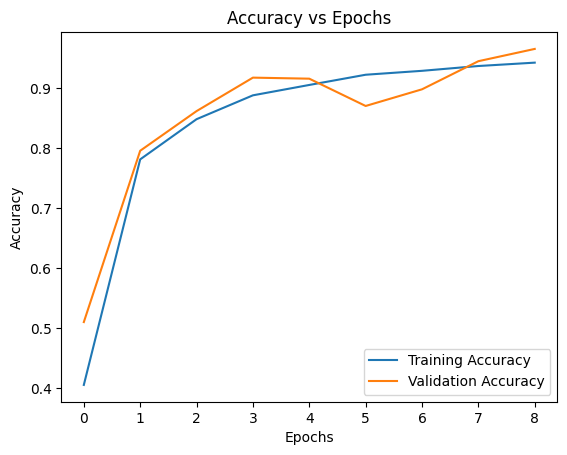

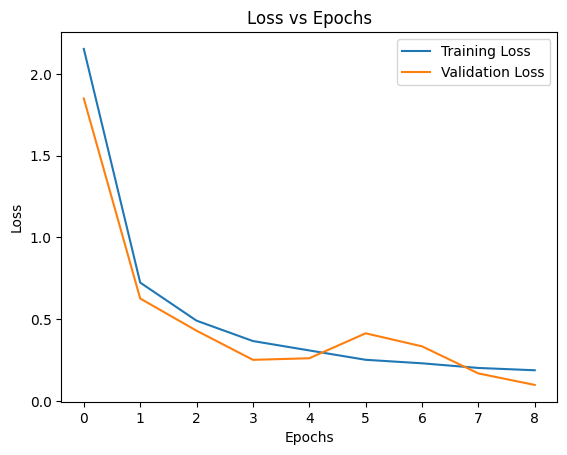

In [ ]:
import os
import numpy as np
import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from vit_keras import vit
from google.colab import drive
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# # Mount Google Drive (if using Google Colab)
# drive.mount('/content/drive')

# train_dir = '/content/drive/MyDrive/Data/train'
# val_dir = '/content/drive/MyDrive/Data/val'
# test_dir = '/content/drive/MyDrive/Data/test'

# Setting up ImageDataGenerator for training, validation, and test sets
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

# Function to create a Vision Transformer model
def create_vit_classifier(num_classes):
    vit_model = vit.vit_b16(
        image_size=224,
        activation='softmax',
        pretrained=True,
        include_top=False,
        pretrained_top=False,
        classes=num_classes)

    # Convert input images to float32
    inputs = tf.keras.layers.Input(shape=(224, 224, 3))
    x = tf.keras.layers.Lambda(lambda img: tf.cast(img, dtype=tf.float32))(inputs)
    x = vit_model(x)

    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Dense(128, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.5)(x)
    x = tf.keras.layers.BatchNormalization()(x)
    outputs = tf.keras.layers.Dense(num_classes, activation='softmax')(x)

    model = tf.keras.Model(inputs=inputs, outputs=outputs)

    return model

# Determine the number of classes from the training data generator
num_classes = len(train_generator.class_indices)

# Create and compile the ViT model
model = create_vit_classifier(num_classes)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=9)  # You might need to adjust the number of epochs based on your specific needs

# Save the model
model.save('/content/drive/MyDrive/SavedModels/vit_model.keras')

# After training, evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print(f'Test accuracy: {test_acc}, Test loss: {test_loss}')

# Plot accuracy vs epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epochs')
plt.legend()
plt.show()

# Plot loss vs epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.legend()
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 64498 images belonging to 35 classes.
Found 8084 images belonging to 35 classes.
Found 8081 images belonging to 35 classes.
Epoch 1/5
2015/2015 [==============================] - 37666s 19s/step - loss: 0.0962 - accuracy: 0.9703 - val_loss: 0.0533 - val_accuracy: 0.9819
Epoch 2/5
2015/2015 [==============================] - 2658s 1s/step - loss: 0.0739 - accuracy: 0.9779 - val_loss: 0.0487 - val_accuracy: 0.9830
Epoch 3/5
2015/2015 [==============================] - 2659s 1s/step - loss: 0.0639 - accuracy: 0.9803 - val_loss: 0.0454 - val_accuracy: 0.9841
Epoch 4/5
2015/2015 [==============================] - 2658s 1s/step - loss: 0.0597 - accuracy: 0.9819 - val_loss: 0.0429 - val_accuracy: 0.9856
Epoch 5/5
2015/2015 [==============================] - 2659s 1s/step - loss: 0.0552 - accuracy: 0.9834 - val_loss: 0.0422 - val_accuracy: 0.9856


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


252/252 [==============================] - 4185s 17s/step - loss: 0.0474 - accuracy: 0.9847
Test accuracy after fine-tuning: 0.984747052192688, Test loss after fine-tuning: 0.04740681126713753


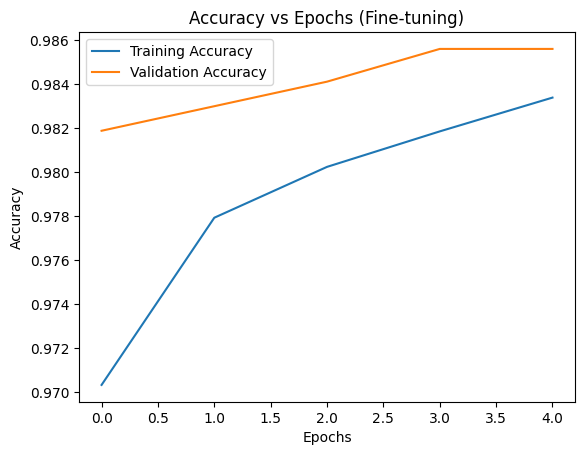

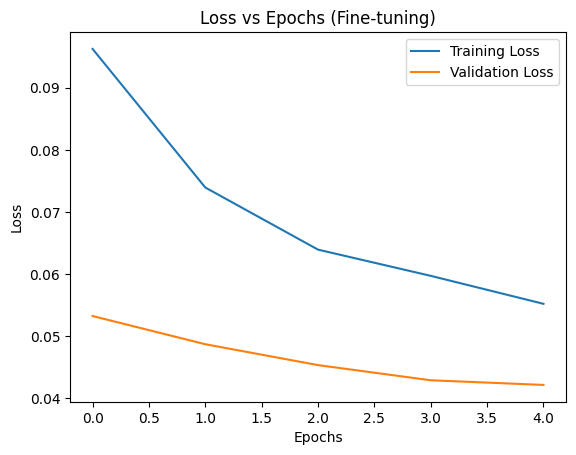

In [ ]:
import os
import numpy as np
import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from vit_keras import vit, layers
from google.colab import drive
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# # Mount Google Drive (if using Google Colab)
# drive.mount('/content/drive')

# train_dir = '/content/drive/MyDrive/Data/train'
# val_dir = '/content/drive/MyDrive/Data/val'
# test_dir = '/content/drive/MyDrive/Data/test'

# Setting up ImageDataGenerator for training, validation, and test sets
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

# Load the saved model
saved_model_path = '/content/drive/MyDrive/SavedModels/vit_model.keras'
custom_objects = {
    'ClassToken': vit.layers.ClassToken,
    'AddPositionEmbs': vit.layers.AddPositionEmbs,
    'TransformerBlock': vit.layers.TransformerBlock
}

# Ensure all layers are using float32
tf.keras.mixed_precision.set_global_policy('float32')

# Custom TransformerBlock for debugging
class CustomTransformerBlock(tf.keras.layers.Layer):
    def __init__(self, *args, **kwargs):
        super(CustomTransformerBlock, self).__init__(*args, **kwargs)
        self.mha = tf.keras.layers.MultiHeadAttention(num_heads=8, key_dim=64)
        self.dropout = tf.keras.layers.Dropout(0.1)
        self.add = tf.keras.layers.Add()
        self.norm = tf.keras.layers.LayerNormalization()
        self.dense = tf.keras.layers.Dense(256, activation='relu')

    def call(self, inputs):
        print(f'Calling CustomTransformerBlock with inputs of shape: {inputs.shape} and dtype: {inputs.dtype}')
        attn_output = self.mha(inputs, inputs)
        attn_output = self.dropout(attn_output)
        out = self.add([attn_output, inputs])
        print(f'After Add: shape={out.shape}, dtype={out.dtype}')
        out = self.norm(out)
        out = self.dense(out)
        print(f'Output: shape={out.shape}, dtype={out.dtype}')
        return out

custom_objects['TransformerBlock'] = CustomTransformerBlock

with tf.keras.utils.custom_object_scope(custom_objects):
    model = tf.keras.models.load_model(saved_model_path)

# Ensure model is using float32
def convert_to_float32(model):
    inputs = tf.keras.layers.Input(shape=(224, 224, 3), dtype=tf.float32)
    x = model(inputs)
    return tf.keras.Model(inputs, x)

model = convert_to_float32(model)

# Compile the model again (optional, but recommended to specify the optimizer)
model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Fine-tune the model for 5 more epochs
fine_tune_epochs = 5
history_fine_tune = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=fine_tune_epochs)

# Save the fine-tuned model
fine_tuned_model_path = '/content/drive/MyDrive/SavedModels/vite_model_fine_tuned.keras'
model.save(fine_tuned_model_path)

# Evaluate the fine-tuned model on the test set
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print(f'Test accuracy after fine-tuning: {test_acc}, Test loss after fine-tuning: {test_loss}')

# Plot accuracy vs epochs for the fine-tuning phase
plt.plot(history_fine_tune.history['accuracy'], label='Training Accuracy')
plt.plot(history_fine_tune.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epochs (Fine-tuning)')
plt.legend()
plt.show()

# Plot loss vs epochs for the fine-tuning phase
plt.plot(history_fine_tune.history['loss'], label='Training Loss')
plt.plot(history_fine_tune.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs (Fine-tuning)')
plt.legend()
plt.show()


In [ ]:
train_dir = local_train_dir
val_dir = local_val_dir
test_dir = local_test_dir

In [ ]:
import os
import numpy as np
import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import drive
from vit_keras import vit, layers  # Import vit_keras layers

# Ensure float32 precision
tf.keras.mixed_precision.set_global_policy('float32')

# Mount Google Drive to access saved model
drive.mount('/content/drive')

# Define the path to the validation directory and saved model
model_path = '/content/drive/MyDrive/SavedModels/vit.h5'

# Setting up ImageDataGenerator for the validation set
val_datagen = ImageDataGenerator(rescale=1./255)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False)

# Custom objects needed for loading the ViT model
custom_objects = {
    'ClassToken': vit.layers.ClassToken,
    'AddPositionEmbs': vit.layers.AddPositionEmbs,
    'TransformerBlock': vit.layers.TransformerBlock
}

# Debug TransformerBlock to ensure consistency in data types
class CustomTransformerBlock(tf.keras.layers.Layer):
    def __init__(self, *args, **kwargs):
        super(CustomTransformerBlock, self).__init__(*args, **kwargs)
        self.mha = tf.keras.layers.MultiHeadAttention(num_heads=8, key_dim=64)
        self.dropout = tf.keras.layers.Dropout(0.1)
        self.add = tf.keras.layers.Add()
        self.norm = tf.keras.layers.LayerNormalization()
        self.dense = tf.keras.layers.Dense(256, activation='relu')

    def call(self, inputs):
        print(f'Calling CustomTransformerBlock with inputs of shape: {inputs.shape} and dtype: {inputs.dtype}')
        attn_output = self.mha(inputs, inputs)
        attn_output = self.dropout(attn_output)
        out = self.add([attn_output, inputs])
        print(f'After Add: shape={out.shape}, dtype={out.dtype}')
        out = self.norm(out)
        out = self.dense(out)
        print(f'Output: shape={out.shape}, dtype={out.dtype}')
        return out

custom_objects['TransformerBlock'] = CustomTransformerBlock

# Load the saved ViT model with custom objects
with tf.keras.utils.custom_object_scope(custom_objects):
    model = tf.keras.models.load_model(model_path)

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

# Evaluate the model on the validation set
val_loss, val_acc = model.evaluate(val_generator, steps=val_generator.samples // val_generator.batch_size)
print(f'Validation accuracy: {val_acc}, Validation loss: {val_loss}')

# Generate prediction vectors
predictions = model.predict(val_generator, steps=val_generator.samples // val_generator.batch_size, verbose=1)

# Save prediction vectors
prediction_vectors_path = '/content/drive/MyDrive/Mod/Predictions/vit_model.npy'
np.save(prediction_vectors_path, predictions)
print(f'Prediction vectors saved at: {prediction_vectors_path}')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 8084 images belonging to 35 classes.
252/252 [==============================] - 1530s 6s/step - loss: 0.0981 - accuracy: 0.9652
Validation accuracy: 0.9651537537574768, Validation loss: 0.09813660383224487
252/252 [==============================] - 1453s 6s/step
Prediction vectors saved at: /content/drive/MyDrive/Mod/Predictions/vit_model.npy


In [ ]:
import os
import numpy as np
import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import drive
from vit_keras import vit, layers  # Import vit_keras layers

# Ensure float32 precision
tf.keras.mixed_precision.set_global_policy('float32')

# Mount Google Drive to access the saved model
drive.mount('/content/drive')

# Define the path to the validation directory and saved model
val_dir = '/content/val'  # Update with your validation directory
model_path = '/content/drive/MyDrive/SavedModels/vit.h5'
prediction_vectors_path = '/content/drive/MyDrive/Predictions/vit_model.npy'
file_order_path = '/content/drive/MyDrive/Predictions/file_order.npy'

# Setting up ImageDataGenerator for the validation set
val_datagen = ImageDataGenerator(rescale=1./255)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Disable shuffle to maintain order
)

# Extract and save the filenames to ensure order consistency
file_names = val_generator.filenames
np.save(file_order_path, file_names)
print(f'Saved file order to {file_order_path}')

# Custom objects needed for loading the ViT model
custom_objects = {
    'ClassToken': vit.layers.ClassToken,
    'AddPositionEmbs': vit.layers.AddPositionEmbs,
    'TransformerBlock': vit.layers.TransformerBlock
}

# Debug TransformerBlock to ensure consistency in data types
class CustomTransformerBlock(tf.keras.layers.Layer):
    def __init__(self, *args, **kwargs):
        super(CustomTransformerBlock, self).__init__(*args, **kwargs)
        self.mha = tf.keras.layers.MultiHeadAttention(num_heads=8, key_dim=64)
        self.dropout = tf.keras.layers.Dropout(0.1)
        self.add = tf.keras.layers.Add()
        self.norm = tf.keras.layers.LayerNormalization()
        self.dense = tf.keras.layers.Dense(256, activation='relu')

    def call(self, inputs):
        print(f'Calling CustomTransformerBlock with inputs of shape: {inputs.shape} and dtype: {inputs.dtype}')
        attn_output = self.mha(inputs, inputs)
        attn_output = self.dropout(attn_output)
        out = self.add([attn_output, inputs])
        print(f'After Add: shape={out.shape}, dtype={out.dtype}')
        out = self.norm(out)
        out = self.dense(out)
        print(f'Output: shape={out.shape}, dtype={out.dtype}')
        return out

custom_objects['TransformerBlock'] = CustomTransformerBlock

# Load the saved ViT model with custom objects
with tf.keras.utils.custom_object_scope(custom_objects):
    model = tf.keras.models.load_model(model_path)

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

# Evaluate the model on the validation set
val_loss, val_acc = model.evaluate(val_generator)
print(f'Validation accuracy: {val_acc}, Validation loss: {val_loss}')

# Generate prediction vectors for all samples
predictions = model.predict(val_generator, verbose=1)

# Save prediction vectors
np.save(prediction_vectors_path, predictions)
print(f'Prediction vectors saved at: {prediction_vectors_path}')

# Verify that the order of the files has remained consistent
current_file_order = val_generator.filenames
if np.array_equal(file_names, current_file_order):
    print("File order is consistent.")
else:
    print("File order has changed!")


/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 8084 images belonging to 35 classes.
Saved file order to /content/drive/MyDrive/Predictions/file_order.npy
253/253 [==============================] - 120s 455ms/step - loss: 0.0980 - accuracy: 0.9652
Validation accuracy: 0.9652400016784668, Validation loss: 0.09799430519342422
253/253 [==============================] - 116s 447ms/step
Prediction vectors saved at: /content/drive/MyDrive/Predictions/vit_model.npy
File order is consistent.


In [ ]:
import os
import numpy as np
import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import drive
from vit_keras import vit, layers  # Import vit_keras layers

# Ensure float32 precision
tf.keras.mixed_precision.set_global_policy('float32')

# Mount Google Drive to access the saved model
drive.mount('/content/drive')

# Define the path to the validation directory and saved model
test_dir = '/content/test'  # Update with your validation directory
model_path = '/content/drive/MyDrive/SavedModels/vit.h5'
prediction_vectors_path = '/content/drive/MyDrive/testPredictions/vit_model.npy'
file_order_path = '/content/drive/MyDrive/Predictions/file_order.npy'

# Setting up ImageDataGenerator for the validation set
np.test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Disable shuffle to maintain order
)

# Extract and save the filenames to ensure order consistency
file_names = val_generator.filenames
np.save(file_order_path, file_names)
print(f'Saved file order to {file_order_path}')

# Custom objects needed for loading the ViT model
custom_objects = {
    'ClassToken': vit.layers.ClassToken,
    'AddPositionEmbs': vit.layers.AddPositionEmbs,
    'TransformerBlock': vit.layers.TransformerBlock
}

# Debug TransformerBlock to ensure consistency in data types
class CustomTransformerBlock(tf.keras.layers.Layer):
    def __init__(self, *args, **kwargs):
        super(CustomTransformerBlock, self).__init__(*args, **kwargs)
        self.mha = tf.keras.layers.MultiHeadAttention(num_heads=8, key_dim=64)
        self.dropout = tf.keras.layers.Dropout(0.1)
        self.add = tf.keras.layers.Add()
        self.norm = tf.keras.layers.LayerNormalization()
        self.dense = tf.keras.layers.Dense(256, activation='relu')

    def call(self, inputs):
        print(f'Calling CustomTransformerBlock with inputs of shape: {inputs.shape} and dtype: {inputs.dtype}')
        attn_output = self.mha(inputs, inputs)
        attn_output = self.dropout(attn_output)
        out = self.add([attn_output, inputs])
        print(f'After Add: shape={out.shape}, dtype={out.dtype}')
        out = self.norm(out)
        out = self.dense(out)
        print(f'Output: shape={out.shape}, dtype={out.dtype}')
        return out

custom_objects['TransformerBlock'] = CustomTransformerBlock

# Load the saved ViT model with custom objects
with tf.keras.utils.custom_object_scope(custom_objects):
    model = tf.keras.models.load_model(model_path)

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

# Evaluate the model on the validation set
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test accuracy: {test_acc}, Test loss: {test_loss}')

# Generate prediction vectors for all samples
predictions = model.predict(test_generator, verbose=1)

# Save prediction vectors
np.save(prediction_vectors_path, predictions)
print(f'Prediction vectors saved at: {prediction_vectors_path}')

# Verify that the order of the files has remained consistent
current_file_order = test_generator.filenames
if np.array_equal(file_names, current_file_order):
    print("File order is consistent.")
else:
    print("File order has changed!")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 8081 images belonging to 35 classes.
Saved file order to /content/drive/MyDrive/Predictions/file_order.npy
253/253 [==============================] - 119s 454ms/step - loss: 0.0980 - accuracy: 0.9688
Test accuracy: 0.9688157439231873, Test loss: 0.09804639220237732
253/253 [==============================] - 116s 446ms/step
Prediction vectors saved at: /content/drive/MyDrive/testPredictions/vit_model.npy
File order has changed!


In [ ]:
import os
import numpy as np
import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import drive
from vit_keras import vit, layers  # Import vit_keras layers

# Ensure float32 precision
tf.keras.mixed_precision.set_global_policy('float32')

# Mount Google Drive to access the saved model
drive.mount('/content/drive')

# Define the path to the validation directory and saved model
train_dir = '/content/train'  # Update with your validation directory
model_path = '/content/drive/MyDrive/SavedModels/vit.h5'
prediction_vectors_path = '/content/drive/MyDrive/trainPredictions/vit.npy'
file_order_path = '/content/drive/MyDrive/Predictions/file_order.npy'

# Setting up ImageDataGenerator for the validation set
np.train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Disable shuffle to maintain order
)

# Extract and save the filenames to ensure order consistency
file_names = train_generator.filenames
np.save(file_order_path, file_names)
print(f'Saved file order to {file_order_path}')

# Custom objects needed for loading the ViT model
custom_objects = {
    'ClassToken': vit.layers.ClassToken,
    'AddPositionEmbs': vit.layers.AddPositionEmbs,
    'TransformerBlock': vit.layers.TransformerBlock
}

# Debug TransformerBlock to ensure consistency in data types
class CustomTransformerBlock(tf.keras.layers.Layer):
    def __init__(self, *args, **kwargs):
        super(CustomTransformerBlock, self).__init__(*args, **kwargs)
        self.mha = tf.keras.layers.MultiHeadAttention(num_heads=8, key_dim=64)
        self.dropout = tf.keras.layers.Dropout(0.1)
        self.add = tf.keras.layers.Add()
        self.norm = tf.keras.layers.LayerNormalization()
        self.dense = tf.keras.layers.Dense(256, activation='relu')

    def call(self, inputs):
        print(f'Calling CustomTransformerBlock with inputs of shape: {inputs.shape} and dtype: {inputs.dtype}')
        attn_output = self.mha(inputs, inputs)
        attn_output = self.dropout(attn_output)
        out = self.add([attn_output, inputs])
        print(f'After Add: shape={out.shape}, dtype={out.dtype}')
        out = self.norm(out)
        out = self.dense(out)
        print(f'Output: shape={out.shape}, dtype={out.dtype}')
        return out

custom_objects['TransformerBlock'] = CustomTransformerBlock

# Load the saved ViT model with custom objects
with tf.keras.utils.custom_object_scope(custom_objects):
    model = tf.keras.models.load_model(model_path)

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

# Evaluate the model on the validation set
train_loss, train_acc = model.evaluate(train_generator)
print(f'Training accuracy: {train_acc}, Training loss: {train_loss}')

# Generate prediction vectors for all samples
predictions = model.predict(train_generator, verbose=1)

# Save prediction vectors
np.save(prediction_vectors_path, predictions)
print(f'Prediction vectors saved at: {prediction_vectors_path}')

# Verify that the order of the files has remained consistent
current_file_order = test_generator.filenames
if np.array_equal(file_names, current_file_order):
    print("File order is consistent.")
else:
    print("File order has changed!")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 64498 images belonging to 35 classes.
Saved file order to /content/drive/MyDrive/Predictions/file_order.npy
2016/2016 [==============================] - 913s 450ms/step - loss: 0.0742 - accuracy: 0.9752
Training accuracy: 0.9752395153045654, Training loss: 0.07420645654201508
2016/2016 [==============================] - 905s 447ms/step
Prediction vectors saved at: /content/drive/MyDrive/trainPredictions/vit.npy


NameError: name 'test_generator' is not defined

In [ ]:
import os
import numpy as np
import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import drive
from vit_keras import vit, layers  # Import vit_keras layers

# Ensure float32 precision
tf.keras.mixed_precision.set_global_policy('float32')

# Mount Google Drive to access the saved model
drive.mount('/content/drive')

# Define the path to the validation directory and saved model
val_dir = '/content/val'  # Update with your validation directory
model_path = '/content/drive/MyDrive/SavedModels/finetunedvit.h5'
prediction_vectors_path = '/content/drive/MyDrive/Predictions/finetunedvit.npy'
file_order_path = '/content/drive/MyDrive/Predictions/file_order.npy'

# Setting up ImageDataGenerator for the validation set
val_datagen = ImageDataGenerator(rescale=1./255)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Disable shuffle to maintain order
)

# Extract and save the filenames to ensure order consistency
file_names = val_generator.filenames
np.save(file_order_path, file_names)
print(f'Saved file order to {file_order_path}')

# Custom objects needed for loading the ViT model
custom_objects = {
    'ClassToken': vit.layers.ClassToken,
    'AddPositionEmbs': vit.layers.AddPositionEmbs,
    'TransformerBlock': vit.layers.TransformerBlock
}

# Debug TransformerBlock to ensure consistency in data types
class CustomTransformerBlock(tf.keras.layers.Layer):
    def __init__(self, *args, **kwargs):
        super(CustomTransformerBlock, self).__init__(*args, **kwargs)
        self.mha = tf.keras.layers.MultiHeadAttention(num_heads=8, key_dim=64)
        self.dropout = tf.keras.layers.Dropout(0.1)
        self.add = tf.keras.layers.Add()
        self.norm = tf.keras.layers.LayerNormalization()
        self.dense = tf.keras.layers.Dense(256, activation='relu')

    def call(self, inputs):
        print(f'Calling CustomTransformerBlock with inputs of shape: {inputs.shape} and dtype: {inputs.dtype}')
        attn_output = self.mha(inputs, inputs)
        attn_output = self.dropout(attn_output)
        out = self.add([attn_output, inputs])
        print(f'After Add: shape={out.shape}, dtype={out.dtype}')
        out = self.norm(out)
        out = self.dense(out)
        print(f'Output: shape={out.shape}, dtype={out.dtype}')
        return out

custom_objects['TransformerBlock'] = CustomTransformerBlock

# Load the saved ViT model with custom objects
with tf.keras.utils.custom_object_scope(custom_objects):
    model = tf.keras.models.load_model(model_path)

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

# Evaluate the model on the validation set
val_loss, val_acc = model.evaluate(val_generator)
print(f'Validation accuracy: {val_acc}, Validation loss: {val_loss}')

# Generate prediction vectors for all samples
predictions = model.predict(val_generator, verbose=1)

# Save prediction vectors
np.save(prediction_vectors_path, predictions)
print(f'Prediction vectors saved at: {prediction_vectors_path}')

# Verify that the order of the files has remained consistent
current_file_order = val_generator.filenames
if np.array_equal(file_names, current_file_order):
    print("File order is consistent.")
else:
    print("File order has changed!")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 8084 images belonging to 35 classes.
Saved file order to /content/drive/MyDrive/Predictions/file_order.npy
253/253 [==============================] - 120s 455ms/step - loss: 0.0421 - accuracy: 0.9857
Validation accuracy: 0.9856506586074829, Validation loss: 0.04211396351456642
253/253 [==============================] - 116s 448ms/step
Prediction vectors saved at: /content/drive/MyDrive/Predictions/finetunedvit.npy
File order is consistent.


In [ ]:
import os
import numpy as np
import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import drive
from vit_keras import vit, layers  # Import vit_keras layers

# Ensure float32 precision
tf.keras.mixed_precision.set_global_policy('float32')

# Mount Google Drive to access the saved model
drive.mount('/content/drive')

# Define the path to the validation directory and saved model
train_dir = '/content/train'  # Update with your validation directory
model_path = '/content/drive/MyDrive/SavedModels/finetunedvit.h5'
prediction_vectors_path = '/content/drive/MyDrive/trainPredictions/finetunedvit.npy'
file_order_path = '/content/drive/MyDrive/trainPredictions/file_order.npy'

# Setting up ImageDataGenerator for the validation set
train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Disable shuffle to maintain order
)

# Extract and save the filenames to ensure order consistency
file_names = train_generator.filenames
np.save(file_order_path, file_names)
print(f'Saved file order to {file_order_path}')

# Custom objects needed for loading the ViT model
custom_objects = {
    'ClassToken': vit.layers.ClassToken,
    'AddPositionEmbs': vit.layers.AddPositionEmbs,
    'TransformerBlock': vit.layers.TransformerBlock
}

# Debug TransformerBlock to ensure consistency in data types
class CustomTransformerBlock(tf.keras.layers.Layer):
    def __init__(self, *args, **kwargs):
        super(CustomTransformerBlock, self).__init__(*args, **kwargs)
        self.mha = tf.keras.layers.MultiHeadAttention(num_heads=8, key_dim=64)
        self.dropout = tf.keras.layers.Dropout(0.1)
        self.add = tf.keras.layers.Add()
        self.norm = tf.keras.layers.LayerNormalization()
        self.dense = tf.keras.layers.Dense(256, activation='relu')

    def call(self, inputs):
        print(f'Calling CustomTransformerBlock with inputs of shape: {inputs.shape} and dtype: {inputs.dtype}')
        attn_output = self.mha(inputs, inputs)
        attn_output = self.dropout(attn_output)
        out = self.add([attn_output, inputs])
        print(f'After Add: shape={out.shape}, dtype={out.dtype}')
        out = self.norm(out)
        out = self.dense(out)
        print(f'Output: shape={out.shape}, dtype={out.dtype}')
        return out

custom_objects['TransformerBlock'] = CustomTransformerBlock

# Load the saved ViT model with custom objects
with tf.keras.utils.custom_object_scope(custom_objects):
    model = tf.keras.models.load_model(model_path)

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

# Evaluate the model on the validation set
train_loss, train_acc = model.evaluate(train_generator)
print(f'Training accuracy: {train_acc}, Training loss: {train_loss}')

# Generate prediction vectors for all samples
predictions = model.predict(train_generator, verbose=1)

# Save prediction vectors
np.save(prediction_vectors_path, predictions)
print(f'Prediction vectors saved at: {prediction_vectors_path}')

# Verify that the order of the files has remained consistent
current_file_order = train_generator.filenames
if np.array_equal(file_names, current_file_order):
    print("File order is consistent.")
else:
    print("File order has changed!")


/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 64498 images belonging to 35 classes.
Saved file order to /content/drive/MyDrive/trainPredictions/file_order.npy
2016/2016 [==============================] - 917s 452ms/step - loss: 0.0232 - accuracy: 0.9922
Training accuracy: 0.9922478199005127, Training loss: 0.023178303614258766
2016/2016 [==============================] - 905s 448ms/step
Prediction vectors saved at: /content/drive/MyDrive/trainPredictions/finetunedvit.npy


NameError: name 'val_generator' is not defined

In [ ]:
import os
import numpy as np
import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import drive
from vit_keras import vit, layers  # Import vit_keras layers

# Ensure float32 precision
tf.keras.mixed_precision.set_global_policy('float32')

# Mount Google Drive to access the saved model
drive.mount('/content/drive')

# Define the path to the validation directory and saved model
test_dir = '/content/test'  # Update with your validation directory
model_path = '/content/drive/MyDrive/SavedModels/finetunedvit.h5'
prediction_vectors_path = '/content/drive/MyDrive/testPredictions/finetunedvit.npy'
file_order_path = '/content/drive/MyDrive/Predictions/file_order.npy'

# Setting up ImageDataGenerator for the validation set
np.test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = val_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Disable shuffle to maintain order
)

# Extract and save the filenames to ensure order consistency
file_names = val_generator.filenames
np.save(file_order_path, file_names)
print(f'Saved file order to {file_order_path}')

# Custom objects needed for loading the ViT model
custom_objects = {
    'ClassToken': vit.layers.ClassToken,
    'AddPositionEmbs': vit.layers.AddPositionEmbs,
    'TransformerBlock': vit.layers.TransformerBlock
}

# Debug TransformerBlock to ensure consistency in data types
class CustomTransformerBlock(tf.keras.layers.Layer):
    def __init__(self, *args, **kwargs):
        super(CustomTransformerBlock, self).__init__(*args, **kwargs)
        self.mha = tf.keras.layers.MultiHeadAttention(num_heads=8, key_dim=64)
        self.dropout = tf.keras.layers.Dropout(0.1)
        self.add = tf.keras.layers.Add()
        self.norm = tf.keras.layers.LayerNormalization()
        self.dense = tf.keras.layers.Dense(256, activation='relu')

    def call(self, inputs):
        print(f'Calling CustomTransformerBlock with inputs of shape: {inputs.shape} and dtype: {inputs.dtype}')
        attn_output = self.mha(inputs, inputs)
        attn_output = self.dropout(attn_output)
        out = self.add([attn_output, inputs])
        print(f'After Add: shape={out.shape}, dtype={out.dtype}')
        out = self.norm(out)
        out = self.dense(out)
        print(f'Output: shape={out.shape}, dtype={out.dtype}')
        return out

custom_objects['TransformerBlock'] = CustomTransformerBlock

# Load the saved ViT model with custom objects
with tf.keras.utils.custom_object_scope(custom_objects):
    model = tf.keras.models.load_model(model_path)

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

# Evaluate the model on the validation set
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test accuracy: {test_acc}, Test loss: {test_loss}')

# Generate prediction vectors for all samples
predictions = model.predict(test_generator, verbose=1)

# Save prediction vectors
np.save(prediction_vectors_path, predictions)
print(f'Prediction vectors saved at: {prediction_vectors_path}')

# Verify that the order of the files has remained consistent
current_file_order = test_generator.filenames
if np.array_equal(file_names, current_file_order):
    print("File order is consistent.")
else:
    print("File order has changed!")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 8081 images belonging to 35 classes.
Saved file order to /content/drive/MyDrive/Predictions/file_order.npy
253/253 [==============================] - 120s 455ms/step - loss: 0.0473 - accuracy: 0.9848
Test accuracy: 0.9847791194915771, Test loss: 0.04733707755804062
253/253 [==============================] - 116s 450ms/step
Prediction vectors saved at: /content/drive/MyDrive/testPredictions/finetunedvit.npy
File order has changed!


In [ ]:
import os
import numpy as np
import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import drive
from vit_keras import vit, layers  # Import vit_keras layers

# Ensure float32 precision
tf.keras.mixed_precision.set_global_policy('float32')

# Mount Google Drive to access saved model
drive.mount('/content/drive')

# Define the path to the validation directory and saved model
model_path = '/content/drive/MyDrive/SavedModels/finetunedvit.h5'

# Setting up ImageDataGenerator for the validation set
val_datagen = ImageDataGenerator(rescale=1./255)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False)

# Custom objects needed for loading the ViT model
custom_objects = {
    'ClassToken': vit.layers.ClassToken,
    'AddPositionEmbs': vit.layers.AddPositionEmbs,
    'TransformerBlock': vit.layers.TransformerBlock
}

# Debug TransformerBlock to ensure consistency in data types
class CustomTransformerBlock(tf.keras.layers.Layer):
    def __init__(self, *args, **kwargs):
        super(CustomTransformerBlock, self).__init__(*args, **kwargs)
        self.mha = tf.keras.layers.MultiHeadAttention(num_heads=8, key_dim=64)
        self.dropout = tf.keras.layers.Dropout(0.1)
        self.add = tf.keras.layers.Add()
        self.norm = tf.keras.layers.LayerNormalization()
        self.dense = tf.keras.layers.Dense(256, activation='relu')

    def call(self, inputs):
        print(f'Calling CustomTransformerBlock with inputs of shape: {inputs.shape} and dtype: {inputs.dtype}')
        attn_output = self.mha(inputs, inputs)
        attn_output = self.dropout(attn_output)
        out = self.add([attn_output, inputs])
        print(f'After Add: shape={out.shape}, dtype={out.dtype}')
        out = self.norm(out)
        out = self.dense(out)
        print(f'Output: shape={out.shape}, dtype={out.dtype}')
        return out

custom_objects['TransformerBlock'] = CustomTransformerBlock

# Load the saved ViT model with custom objects
with tf.keras.utils.custom_object_scope(custom_objects):
    model = tf.keras.models.load_model(model_path)

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

# Evaluate the model on the validation set
val_loss, val_acc = model.evaluate(val_generator, steps=val_generator.samples // val_generator.batch_size)
print(f'Validation accuracy: {val_acc}, Validation loss: {val_loss}')

# Generate prediction vectors
predictions = model.predict(val_generator, steps=val_generator.samples // val_generator.batch_size, verbose=1)

# Save prediction vectors
prediction_vectors_path = '/content/drive/MyDrive/Mod/Predictions/finetunedvit.npy'
np.save(prediction_vectors_path, predictions)
print(f'Prediction vectors saved at: {prediction_vectors_path}')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 8084 images belonging to 35 classes.
252/252 [==============================] - 1466s 6s/step - loss: 0.0422 - accuracy: 0.9856
Validation accuracy: 0.985615074634552, Validation loss: 0.04220932722091675
252/252 [==============================] - 1450s 6s/step


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Predictions/Mod/finetunedvit.npy'

In [ ]:
prediction_vectors_path = '/content/drive/MyDrive/Mod/Predictions/finetunedvit.npy'
np.save(prediction_vectors_path, predictions)
print(f'Prediction vectors saved at: {prediction_vectors_path}')

Prediction vectors saved at: /content/drive/MyDrive/Mod/Predictions/finetunedvit.npy


In [ ]:
import os
import numpy as np
import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import drive
from vit_keras import vit, layers  # Import vit_keras layers

# Ensure float32 precision
tf.keras.mixed_precision.set_global_policy('float32')

# Mount Google Drive to access saved model
drive.mount('/content/drive')
test_dir='/content/test'


model_path = '/content/drive/MyDrive/SavedModels/vit.h5'

# Setting up ImageDataGenerator for the test set
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False)

# Custom objects needed for loading the ViT model
custom_objects = {
    'ClassToken': vit.layers.ClassToken,
    'AddPositionEmbs': vit.layers.AddPositionEmbs,
    'TransformerBlock': vit.layers.TransformerBlock
}

# Debug TransformerBlock to ensure consistency in data types
class CustomTransformerBlock(tf.keras.layers.Layer):
    def __init__(self, *args, **kwargs):
        super(CustomTransformerBlock, self).__init__(*args, **kwargs)
        self.mha = tf.keras.layers.MultiHeadAttention(num_heads=8, key_dim=64)
        self.dropout = tf.keras.layers.Dropout(0.1)
        self.add = tf.keras.layers.Add()
        self.norm = tf.keras.layers.LayerNormalization()
        self.dense = tf.keras.layers.Dense(256, activation='relu')

    def call(self, inputs):
        print(f'Calling CustomTransformerBlock with inputs of shape: {inputs.shape} and dtype: {inputs.dtype}')
        attn_output = self.mha(inputs, inputs)
        attn_output = self.dropout(attn_output)
        out = self.add([attn_output, inputs])
        print(f'After Add: shape={out.shape}, dtype={out.dtype}')
        out = self.norm(out)
        out = self.dense(out)
        print(f'Output: shape={out.shape}, dtype={out.dtype}')
        return out

custom_objects['TransformerBlock'] = CustomTransformerBlock

# Load the saved ViT model with custom objects
with tf.keras.utils.custom_object_scope(custom_objects):
    model = tf.keras.models.load_model(model_path)

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print(f'Test accuracy: {test_acc}, Test loss: {test_loss}')

# Generate prediction vectors
test_predictions = model.predict(test_generator, steps=test_generator.samples // test_generator.batch_size, verbose=1)

# Save prediction vectors
test_prediction_vectors_path = '/content/drive/MyDrive/Mod/testPredictions/vit.npy'
np.save(test_prediction_vectors_path, test_predictions)
print(f'Test prediction vectors saved at: {test_prediction_vectors_path}')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 8081 images belonging to 35 classes.
252/252 [==============================] - 1495s 6s/step - loss: 0.0983 - accuracy: 0.9688
Test accuracy: 0.96875, Test loss: 0.09825175255537033
252/252 [==============================] - 1484s 6s/step
Test prediction vectors saved at: /content/drive/MyDrive/Mod/testPredictions/vit.npy


In [ ]:
import os
import numpy as np
import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import drive
from vit_keras import vit, layers  # Import vit_keras layers

# Ensure float32 precision
tf.keras.mixed_precision.set_global_policy('float32')

# Mount Google Drive to access saved model
drive.mount('/content/drive')
test_dir='/content/test'
# Define the path to the test directory and saved model
model_path = '/content/drive/MyDrive/SavedModels/finetunedvit.h5'

# Setting up ImageDataGenerator for the test set
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False)

# Custom objects needed for loading the ViT model
custom_objects = {
    'ClassToken': vit.layers.ClassToken,
    'AddPositionEmbs': vit.layers.AddPositionEmbs,
    'TransformerBlock': vit.layers.TransformerBlock
}

# Debug TransformerBlock to ensure consistency in data types
class CustomTransformerBlock(tf.keras.layers.Layer):
    def __init__(self, *args, **kwargs):
        super(CustomTransformerBlock, self).__init__(*args, **kwargs)
        self.mha = tf.keras.layers.MultiHeadAttention(num_heads=8, key_dim=64)
        self.dropout = tf.keras.layers.Dropout(0.1)
        self.add = tf.keras.layers.Add()
        self.norm = tf.keras.layers.LayerNormalization()
        self.dense = tf.keras.layers.Dense(256, activation='relu')

    def call(self, inputs):
        print(f'Calling CustomTransformerBlock with inputs of shape: {inputs.shape} and dtype: {inputs.dtype}')
        attn_output = self.mha(inputs, inputs)
        attn_output = self.dropout(attn_output)
        out = self.add([attn_output, inputs])
        print(f'After Add: shape={out.shape}, dtype={out.dtype}')
        out = self.norm(out)
        out = self.dense(out)
        print(f'Output: shape={out.shape}, dtype={out.dtype}')
        return out

custom_objects['TransformerBlock'] = CustomTransformerBlock

# Load the saved ViT model with custom objects
with tf.keras.utils.custom_object_scope(custom_objects):
    model = tf.keras.models.load_model(model_path)

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print(f'Test accuracy: {test_acc}, Test loss: {test_loss}')

# Generate prediction vectors
test_predictions = model.predict(test_generator, steps=test_generator.samples // test_generator.batch_size, verbose=1)

# Save prediction vectors
test_prediction_vectors_path = '/content/drive/MyDrive/Mod/testPredictions/finetunedvit.npy'
np.save(test_prediction_vectors_path, test_predictions)
print(f'Test prediction vectors saved at: {test_prediction_vectors_path}')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 8081 images belonging to 35 classes.
252/252 [==============================] - 1501s 6s/step - loss: 0.0474 - accuracy: 0.9847
Test accuracy: 0.984747052192688, Test loss: 0.047436513006687164
252/252 [==============================] - 1459s 6s/step
Test prediction vectors saved at: /content/drive/MyDrive/Mod/testPredictions/finetunedvit.npy
